In [4]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats
import unicodedata

In [5]:
team_salary_df = pd.read_excel("TeamSalaries.xlsx")

In [6]:
team_salary_df.head()

Year              Team Name  # Players    Payroll  $ Per Player  \
0  2010   Arizona Diamondbacks         27   71984833       2666105   
1  2010         Atlanta Braves         27   84390334       3125568   
2  2010      Baltimore Orioles         26   75412500       2900481   
3  2010         Boston Red Sox         31  173759833       5605156   
4  2010           Chicago Cubs         28  143359000       5119964   

  1 Year Delta % Change  
0     -1390167   -0.019  
1    -13049000   -0.134  
2      7042708    0.103  
3     50956193    0.415  
4      8216667    0.061

In [7]:
team_salary_df["Team Name"].value_counts()

 Seattle Mariners         10
 Cleveland Indians        10
 Chicago Cubs             10
 Pittsburgh Pirates       10
 New York Mets            10
 Toronto Blue Jays        10
 Los Angeles Angels       10
 St. Louis Cardinals      10
 San Diego Padres         10
 Colorado Rockies         10
 Philadelphia Phillies    10
 Chicago White Sox        10
 Baltimore Orioles        10
 Minnesota Twins          10
 Tampa Bay Rays           10
 Texas Rangers            10
 Washington Nationals     10
 TOTAL                    10
 Oakland Athletics        10
 New York Yankees         10
 Milwaukee Brewers        10
 Kansas City Royals       10
 Atlanta Braves           10
 Los Angeles Dodgers      10
 San Francisco Giants     10
 Boston Red Sox           10
 Cincinnati Reds          10
 Detroit Tigers           10
 Houston Astros           10
 Arizona Diamondbacks      9
 Miami Marlins             8
 Florida Marlins           2
 Arizona Diamondbacks      1
Name: Team Name, dtype: int64

In [8]:
for i, row in team_salary_df.iterrows():
    y = str(row["Team Name"])
    if y.endswith("Marlins"):
        y = "Miami Marlins"
    elif y.endswith("Diamondbacks"):
        y = "Arizona Diamondbacks"
    else:
        y = y.lstrip()
    team_salary_df.loc[i, "Team Name"] = y

In [9]:
team_salary_df["Team Name"].value_counts()

Philadelphia Phillies    10
St. Louis Cardinals      10
New York Yankees         10
Pittsburgh Pirates       10
Colorado Rockies         10
Kansas City Royals       10
Seattle Mariners         10
Los Angeles Angels       10
Oakland Athletics        10
TOTAL                    10
Chicago White Sox        10
Washington Nationals     10
Tampa Bay Rays           10
Miami Marlins            10
Atlanta Braves           10
Los Angeles Dodgers      10
Arizona Diamondbacks     10
Chicago Cubs             10
New York Mets            10
San Diego Padres         10
San Francisco Giants     10
Houston Astros           10
Toronto Blue Jays        10
Minnesota Twins          10
Texas Rangers            10
Detroit Tigers           10
Cincinnati Reds          10
Cleveland Indians        10
Boston Red Sox           10
Baltimore Orioles        10
Milwaukee Brewers        10
Name: Team Name, dtype: int64

In [10]:
team_salary_df[team_salary_df["Team Name"] == "Miami Marlins"]

Year      Team Name  # Players    Payroll  $ Per Player 1 Year Delta  \
10   2010  Miami Marlins         27   47429719       1756656     10387793   
41   2011  Miami Marlins         27   57695000       2136852     10265281   
76   2012  Miami Marlins         27  101628000       3764000          ---   
107  2013  Miami Marlins         32   38026900       1188341    -63601100   
138  2014  Miami Marlins         27   45825400       1697237      7798500   
169  2015  Miami Marlins         25   69031500       2761260     23206100   
200  2016  Miami Marlins         29   74364500       2564293      5333000   
231  2017  Miami Marlins         29  115406101       3979521     41041601   
262  2018  Miami Marlins         33   99510143       3015459    -15895958   
293  2019  Miami Marlins         28   71903319       2567976    -27606824   

    % Change  
10      0.28  
41     0.216  
76         —  
107   -0.626  
138    0.205  
169    0.506  
200    0.077  
231    0.552  
262   -0.138  
293   -0.277

In [11]:
bat_19_df = pd.read_excel("mlbHitters.xlsx", 0, 0, index_col="Rk")
bat_19_df.head(20)

Name   Age   Tm   Lg    G   PA   AB    R    H  2B  ...  \
Rk                                                                     ...   
0       LgAvg per 600 PA   NaN  NaN  NaN  200  600  536   75  134  27  ...   
1        Whit Merrifield  30.0  KCR   AL  162  735  681  105  206  41  ...   
2          Marcus Semien  28.0  OAK   AL  162  747  657  123  187  43  ...   
3         Rafael Devers*  22.0  BOS   AL  156  702  647  129  201  54  ...   
4       Jonathan Villar#  28.0  BAL   AL  162  714  642  111  176  33  ...   
5          Ozzie Albies#  22.0  ATL   NL  160  702  640  102  189  43  ...   
6       Eduardo Escobar#  30.0  ARI   NL  158  699  636   94  171  29  ...   
7         Starlin Castro  29.0  MIA   NL  162  676  636   68  172  31  ...   
8             José Abreu  32.0  CHW   AL  159  693  634   85  180  38  ...   
9         Jorge Polanco#  25.0  MIN   AL  153  704  631  107  186  40  ...   
10      Ronald Acuna Jr.  21.0  ATL   NL  156  715  626  127  175  22  ...   
11          Eric Hosmer*  29.0  SDP   NL  160  667  619   72  164  29  ...   
12          Amed Rosario  23.0  NYM   NL  157  655  616   75  177  30  ...   
13  Nicholas Castellanos  27.0  TOT  MLB  151  664  615  100  178  58  ...   
14       Xander Bogaerts  26.0  BOS   AL  155  698  614  110  190  52  ...   
15      Cesar Hernandez#  29.0  PHI   NL  161  667  612   77  171  31  ...   
16          Kevin Pillar  30.0  TOT  MLB  161  645  611   83  158  37  ...   
17          Trey Mancini  27.0  BAL   AL  154  679  602  106  175  38  ...   
18           DJ LeMahieu  30.0  NYY   AL  145  655  602  109  197  33  ...   
19          Elvis Andrus  30.0  TEX   AL  147  648  600   81  165  27  ...   

      SLG    OPS   OPS+   TB  GDP  HBP  SH  SF  IBB  Pos Summary  
Rk                                                                
0   0.432  0.752    NaN  232   11    6   2   4    2          NaN  
1   0.463  0.811  112.0  315    8    5   0   4    5      498/D37  
2   0.522  0.892  138.0  343   11    2   0   1    2           *6  
3   0.555  0.916  133.0  359    8    4   1   2    7       *5/HD6  
4   0.453  0.792  109.0  291    8    4   2   4    0       *46/HD  
5   0.500  0.852  114.0  320    2    4   0   4    6         *4/H  
6   0.511  0.831  111.0  325    8    3   0  10    3       *54/HD  
7   0.436  0.736   94.0  277   23    3   0   9    2       *45/6H  
8   0.503  0.834  119.0  319   24   13   0  10    4          *3D  
9   0.485  0.841  120.0  306   11    4   2   7    2        *6D/H  
10  0.518  0.883  122.0  324    8    9   0   1    4       *879/H  
11  0.425  0.735   93.0  263   12    3   0   5    3        *3/HD  
12  0.432  0.755  102.0  266   13    3   2   3    2       *6/HD7  
13  0.525  0.863  121.0  323   12    5   0   3    1         *9D7  
14  0.555  0.939  140.0  341   11    2   0   6    2        *6/DH  
15  0.408  0.741   91.0  250    9    6   0   4    4         *4/H  
16  0.432  0.719   89.0  264   15    9   0   7    4       *89/HD  
17  0.535  0.899  135.0  322   22    9   0   5    3       93D/7H  
18  0.518  0.893  136.0  312   14    2   1   4    0       453/HD  
19  0.393  0.707   78.0  236   16    4   0  10    1         *6/D  

[20 rows x 29 columns]

In [12]:
bat_18_df = pd.read_excel("mlbHitters.xlsx", 1, 0, index_col="Rk")
bat_17_df = pd.read_excel("mlbHitters.xlsx", 2, 0, index_col="Rk")
bat_16_df = pd.read_excel("mlbHitters.xlsx", 3, 0, index_col="Rk")
bat_15_df = pd.read_excel("mlbHitters.xlsx", 4, 0, index_col="Rk")
bat_14_df = pd.read_excel("mlbHitters.xlsx", 5, 0, index_col="Rk")
bat_13_df = pd.read_excel("mlbHitters.xlsx", 6, 0, index_col="Rk")
bat_12_df = pd.read_excel("mlbHitters.xlsx", 7, 0, index_col="Rk")
bat_11_df = pd.read_excel("mlbHitters.xlsx", 8, 0, index_col="Rk")
bat_10_df = pd.read_excel("mlbHitters.xlsx", 9, 0, index_col="Rk")

In [13]:
bat_19_df_v = pd.read_excel("mlbHitters.xlsx", 10, 0, index_col="Rk")
bat_18_df_v = pd.read_excel("mlbHitters.xlsx", 11, 0, index_col="Rk")
bat_17_df_v = pd.read_excel("mlbHitters.xlsx", 12, 0, index_col="Rk")
bat_16_df_v = pd.read_excel("mlbHitters.xlsx", 13, 0, index_col="Rk")
bat_15_df_v = pd.read_excel("mlbHitters.xlsx", 14, 0, index_col="Rk")
bat_14_df_v = pd.read_excel("mlbHitters.xlsx", 15, 0, index_col="Rk")
bat_13_df_v = pd.read_excel("mlbHitters.xlsx", 16, 0, index_col="Rk")
bat_12_df_v = pd.read_excel("mlbHitters.xlsx", 17, 0, index_col="Rk")
bat_11_df_v = pd.read_excel("mlbHitters.xlsx", 18, 0, index_col="Rk")
bat_10_df_v = pd.read_excel("mlbHitters.xlsx", 19, 0, index_col="Rk")

In [14]:
bat_10_df_v.head(12)

Name  Age   Tm    G   PA  Rbat  Rbaser  Rdp  Rfield  Rpos  ...  \
Rk                                                                        ...   
1      Rickie Weeks   27  MIL  160  754    22       3    3     -16     4  ...   
2       Derek Jeter   36  NYY  157  739    -9       4   -1      -9     8  ...   
3      Juan Pierre*   32  CHW  160  734   -17       6    4      -9    -7  ...   
4    Ichiro Suzuki*   36  SEA  162  732    10       3    4      -1    -6  ...   
5     Michael Young   33  TEX  157  718    -1       3   -1     -11     3  ...   
6   Prince Fielder*   26  MIL  161  714    28      -7    0     -17    -9  ...   
7    Mark Teixeira#   30  NYY  158  712    21      -3    0       6    -9  ...   
8    Nick Markakis*   26  BAL  160  709    15       1   -1     -11    -6  ...   
9      Denard Span*   26  MIN  153  705    -8       2    0      -5     4  ...   
10   Chone Figgins#   32  SEA  161  702   -11       4   -1     -10     4  ...   
11    Albert Pujols   30  STL  159  700    54       3   -2       8    -9  ...   
12   Robinson Cano*   27  NYY  160  696    33       1   -2      16     4  ...   

    RAR  WAR  waaWL%  162WL%  oWAR  dWAR  oRAR      Salary  \
Rk                                                           
1    38  3.6   0.511   0.510   5.3  -1.3    54   2750000.0   
2    17  1.7   0.495   0.495   2.7   0.0    26  22600000.0   
3     3  0.3   0.486   0.486   1.2  -1.6    12   7000000.0   
4    36  3.7   0.507   0.507   3.8  -0.7    37  18000000.0   
5    18  1.9   0.496   0.496   3.0  -0.7    29  13174974.0   
6    18  1.5   0.498   0.498   3.4  -2.8    35  11000000.0   
7    40  4.1   0.510   0.510   3.5  -0.2    34  20625000.0   
8    23  2.3   0.498   0.498   3.5  -1.7    34   7100000.0   
9    17  1.7   0.495   0.495   2.2   0.0    22    750000.0   
10   12  1.2   0.491   0.491   2.2  -0.5    22   8500000.0   
11   75  7.5   0.535   0.535   6.7  -0.1    67  14595953.0   
12   79  8.1   0.535   0.534   6.4   2.2    63   9000000.0   

              Acquired  Pos Summary  
Rk                                   
1        Amateur Draft         *4/D  
2          Free Agency        *6/DH  
3               Traded        *7D/H  
4            Purchased         *9/D  
5               Traded         *5/D  
6        Amateur Draft         *3/D  
7          Free Agency        *3/DH  
8        Amateur Draft         *9/D  
9        Amateur Draft           *8  
10         Free Agency           *4  
11       Amateur Draft         *3/H  
12  Amateur Free Agent        *4/DH  

[12 rows x 23 columns]

In [15]:
pitch_19_df = pd.read_excel("mlbPitchers.xlsx", 0, 0, index_col="Rk")
pitch_18_df = pd.read_excel("mlbPitchers.xlsx", 1, 0, index_col="Rk")
pitch_17_df = pd.read_excel("mlbPitchers.xlsx", 2, 0, index_col="Rk")
pitch_16_df = pd.read_excel("mlbPitchers.xlsx", 3, 0, index_col="Rk")
pitch_15_df = pd.read_excel("mlbPitchers.xlsx", 4, 0, index_col="Rk")
pitch_14_df = pd.read_excel("mlbPitchers.xlsx", 5, 0, index_col="Rk")
pitch_13_df = pd.read_excel("mlbPitchers.xlsx", 6, 0, index_col="Rk")
pitch_12_df = pd.read_excel("mlbPitchers.xlsx", 7, 0, index_col="Rk")
pitch_11_df = pd.read_excel("mlbPitchers.xlsx", 8, 0, index_col="Rk")
pitch_10_df = pd.read_excel("mlbPitchers.xlsx", 9, 0, index_col="Rk")

In [16]:
pitch_19_df_v = pd.read_excel("mlbPitchers.xlsx", 10, 0, index_col="Rk")
pitch_18_df_v = pd.read_excel("mlbPitchers.xlsx", 11, 0, index_col="Rk")
pitch_17_df_v = pd.read_excel("mlbPitchers.xlsx", 12, 0, index_col="Rk")
pitch_16_df_v = pd.read_excel("mlbPitchers.xlsx", 13, 0, index_col="Rk")
pitch_15_df_v = pd.read_excel("mlbPitchers.xlsx", 14, 0, index_col="Rk")
pitch_14_df_v = pd.read_excel("mlbPitchers.xlsx", 15, 0, index_col="Rk")
pitch_13_df_v = pd.read_excel("mlbPitchers.xlsx", 16, 0, index_col="Rk")
pitch_12_df_v = pd.read_excel("mlbPitchers.xlsx", 17, 0, index_col="Rk")
pitch_11_df_v = pd.read_excel("mlbPitchers.xlsx", 18, 0, index_col="Rk")
pitch_10_df_v = pd.read_excel("mlbPitchers.xlsx", 19, 0, index_col="Rk")

In [17]:
pitch_14_df_v.head()

Name  Age   Tm     IP   G  GS    R   RA9  RA9opp  RA9def  ...  \
Rk                                                                       ...   
1      David Price*   28  2TM  248.1  34  34  100  3.62    4.19   -0.17  ...   
2      Johnny Cueto   28  CIN  243.2  34  34   69  2.55    4.04    0.29  ...   
3   Felix Hernandez   28  SEA  236.0  34  34   68  2.59    4.30    0.11  ...   
4      Corey Kluber   28  CLE  235.2  34  34   72  2.75    4.20   -0.28  ...   
5     James Shields   32  KCR  227.0  34  34   95  3.77    4.31    0.15  ...   

    RAA  WAA  gmLI  WAAadj  WAR  RAR  waaWL%  162WL%      Salary  \
Rk                                                                 
1    19  2.2   NaN    -0.2  4.4   44   0.564   0.507  14000000.0   
2    37  4.6   NaN    -0.1  6.6   55   0.636   0.528  10000000.0   
3    35  4.3   NaN    -0.2  6.4   60   0.625   0.526  22857000.0   
4    49  6.0   NaN    -0.2  8.1   73   0.677   0.537    514000.0   
5    14  1.7   NaN    -0.2  3.7   38   0.549   0.510  13500000.0   

              Acquired  
Rk                      
1               Traded  
2   Amateur Free Agent  
3   Amateur Free Agent  
4               Traded  
5               Traded  

[5 rows x 23 columns]

In [18]:
hitters_regular = [bat_19_df, bat_18_df, bat_17_df, bat_16_df, bat_15_df, bat_14_df, bat_13_df, bat_12_df, bat_11_df, bat_10_df]
hitters_value = [bat_19_df_v, bat_18_df_v, bat_17_df_v, bat_16_df_v, bat_15_df_v, bat_14_df_v, bat_13_df_v, bat_12_df_v, bat_11_df_v, bat_10_df_v]
pitchers_regular = [pitch_19_df, pitch_18_df, pitch_17_df, pitch_16_df, pitch_15_df, pitch_14_df, pitch_13_df, pitch_12_df, pitch_11_df, pitch_10_df]
pitchers_value = [pitch_19_df_v, pitch_18_df_v, pitch_17_df_v, pitch_16_df_v, pitch_15_df_v, pitch_14_df_v, pitch_13_df_v, pitch_12_df_v, pitch_11_df_v, pitch_10_df_v]

In [19]:
years = [2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010]

In [20]:
for tup in zip(years, hitters_regular, hitters_value):
    for item in tup:
        if type(item) == int:
            year = item
            next
        else:
            for i, row in item.iterrows():
                name = row["Name"]
                name = name.strip()
                if "*" in name or "#" in name:
                    name = name[:-1]
                item.loc[i, "Name"] = name
                item.loc[i, "Year"] = year

In [21]:
for tup in zip(years, pitchers_regular, pitchers_value):
    for item in tup:
        if type(item) == int:
            year = item
            next
        else:
            for i, row in item.iterrows():
                name = str(row["Name"])
                name = name.strip()
                if "*" in name or "#" in name:
                    name = name[:-1]
                item.loc[i, "Name"] = name
                item.loc[i, "Year"] = year

In [22]:
pitch_16_df.head()

Name   Age   Tm   Lg   W   L   W-L%   ERA   G  GS  ...   BF  \
Rk                                                                 ...        
1   LgAvg per 180 IP   NaN  NaN  NaN  10  10  0.497  4.21  86  20  ...  768   
2          Brad Hand  26.0  SDP   NL   4   4  0.500  2.92  82   0  ...  364   
3          Zach Duke  33.0  TOT  MLB   2   1  0.667  2.36  81   0  ...  258   
4       Addison Reed  27.0  NYM   NL   4   2  0.667  1.97  80   0  ...  304   
5    Randall Delgado  26.0  ARI   NL   5   2  0.714  4.44  79   0  ...  337   

     ERA+   FIP   WHIP   H9  HR9  BB9   SO9  SO/W    Year  
Rk                                                         
1   100.0  4.22  1.331  8.8  1.2  3.2   8.1  2.55  2016.0  
2   136.0  3.07  1.108  6.3  0.8  3.6  11.2  3.08  2016.0  
3   173.0  2.97  1.262  7.1  0.3  4.3  10.0  2.34  2016.0  
4   204.0  1.97  0.940  7.0  0.5  1.5  10.5  7.00  2016.0  
5   101.0  4.24  1.507  9.2  1.0  4.3   8.2  1.89  2016.0  

[5 rows x 35 columns]

In [23]:
for tup in zip(hitters_full, hitters_regular, hitters_value):
    df_main = tup[1]
    df_v = tup[2]
    df_full = tup[0]
    df_full = df_main.merge(df_v, on="Name", how="inner", suffixes=("_reg","_v"))
    df_full.head()

NameError: name 'hitters_full' is not defined

In [24]:
pitchers_19 = pitch_19_df.merge(pitch_19_df_v, on="Name", how="inner", suffixes=("_reg","_v"))
pitchers_18 = pitch_18_df.merge(pitch_18_df_v, on="Name", how="inner", suffixes=("_reg","_v"))
pitchers_17 = pitch_17_df.merge(pitch_17_df_v, on="Name", how="inner", suffixes=("_reg","_v"))
pitchers_16 = pitch_16_df.merge(pitch_16_df_v, on="Name", how="inner", suffixes=("_reg","_v"))
pitchers_15 = pitch_15_df.merge(pitch_15_df_v, on="Name", how="inner", suffixes=("_reg","_v"))
pitchers_14 = pitch_14_df.merge(pitch_14_df_v, on="Name", how="inner", suffixes=("_reg","_v"))
pitchers_13 = pitch_13_df.merge(pitch_13_df_v, on="Name", how="inner", suffixes=("_reg","_v"))
pitchers_12 = pitch_12_df.merge(pitch_12_df_v, on="Name", how="inner", suffixes=("_reg","_v"))
pitchers_11 = pitch_11_df.merge(pitch_11_df_v, on="Name", how="inner", suffixes=("_reg","_v"))
pitchers_10 = pitch_10_df.merge(pitch_10_df_v, on="Name", how="inner", suffixes=("_reg","_v"))

In [25]:
batters_19 = bat_19_df.merge(bat_19_df_v, on="Name", how="inner", suffixes=("_reg","_v"))
batters_18 = bat_18_df.merge(bat_18_df_v, on="Name", how="inner", suffixes=("_reg","_v"))
batters_17 = bat_17_df.merge(bat_17_df_v, on="Name", how="inner", suffixes=("_reg","_v"))
batters_16 = bat_16_df.merge(bat_16_df_v, on="Name", how="inner", suffixes=("_reg","_v"))
batters_15 = bat_15_df.merge(bat_15_df_v, on="Name", how="inner", suffixes=("_reg","_v"))
batters_14 = bat_14_df.merge(bat_14_df_v, on="Name", how="inner", suffixes=("_reg","_v"))
batters_13 = bat_13_df.merge(bat_13_df_v, on="Name", how="inner", suffixes=("_reg","_v"))
batters_12 = bat_12_df.merge(bat_12_df_v, on="Name", how="inner", suffixes=("_reg","_v"))
batters_11 = bat_11_df.merge(bat_11_df_v, on="Name", how="inner", suffixes=("_reg","_v"))
batters_10 = bat_10_df.merge(bat_10_df_v, on="Name", how="inner", suffixes=("_reg","_v"))

In [26]:
batters_10.tail(10)

Name  Age_reg Tm_reg  Lg  G_reg  PA_reg  AB   R   H  2B  ...  \
507     Robert Andino     26.0    BAL  AL     16      66  61   6  18   4  ...   
508      Josh Johnson     26.0    FLA  NL     27      66  59   0   5   0  ...   
509         Jon Niese     23.0    NYM  NL     30      66  53   3  10   2  ...   
510  Jonathan Sanchez     27.0    SFG  NL     32      66  58   2   8   0  ...   
511     Eugenio Velez     28.0    SFG  NL     29      66  55   7   9   2  ...   
512        Barry Zito     32.0    SFG  NL     32      66  51   1   6   0  ...   
513      Jarrod Dyson     25.0    KCR  AL     18      65  57  11  12   4  ...   
514      Mike Hessman     32.0    NYM  NL     32      65  55   6   7   2  ...   
515       Paul Maholm     28.0    PIT  NL     30      65  56   1   5   0  ...   
516     Gary Matthews     35.0    NYM  NL     36      65  58   9  11   3  ...   

     WAR  waaWL%  162WL%  oWAR  dWAR  oRAR      Salary       Acquired  \
507  0.3   0.503   0.500   0.2   0.2     2         NaN         Traded   
508 -0.4   0.484   0.497  -0.4   0.0    -4   3750000.0  Amateur Draft   
509  0.5   0.515   0.503   0.5   0.0     4    402000.0  Amateur Draft   
510 -0.1   0.498   0.500  -0.1   0.0    -1   2100000.0  Amateur Draft   
511  0.0   0.493   0.499  -0.1   0.1    -1    416000.0   Rule 5 Draft   
512 -0.2   0.493   0.499  -0.2   0.0    -2  18500000.0    Free Agency   
513  0.8   0.532   0.504   0.5   0.4     5         NaN  Amateur Draft   
514  0.0   0.495   0.499  -0.3   0.3    -3         NaN    Free Agency   
515 -0.3   0.490   0.498  -0.3   0.0    -3   5000000.0  Amateur Draft   
516 -0.6   0.478   0.495  -0.4  -0.2    -3  11400000.0         Traded   

     Pos Summary_v  Year_v  
507           /465  2010.0  
508              1  2010.0  
509            1/H  2010.0  
510              1  2010.0  
511         H7/849  2010.0  
512              1  2010.0  
513           8/HD  2010.0  
514           H/53  2010.0  
515              1  2010.0  
516          H8/97  2010.0  

[10 rows x 53 columns]

In [27]:
top_50Players_2019_df = pd.read_excel("mlb_cleanest_4.xlsx", 4, skiprows=[0, 1, 2], index_col="RANK")
top_50Players_2018_df = pd.read_excel("mlb_cleanest_4.xlsx", 5, skiprows=[0, 1, 2], index_col="RANK")
top_50Players_2017_df = pd.read_excel("mlb_cleanest_4.xlsx", 6, skiprows=[0, 1, 2], index_col="RANK")
top_50Players_2016_df = pd.read_excel("mlb_cleanest_4.xlsx", 7, skiprows=[0, 1, 2], index_col="RANK")
top_50Players_2015_df = pd.read_excel("mlb_cleanest_4.xlsx", 8, skiprows=[0, 1, 2], index_col="RANK")
top_50Players_2014_df = pd.read_excel("mlb_cleanest_4.xlsx", 9, skiprows=[0, 1, 2], index_col="RANK")
top_50Players_2013_df = pd.read_excel("mlb_cleanest_4.xlsx", 10, skiprows=[0, 1, 2], index_col="RANK")
top_50Players_2012_df = pd.read_excel("mlb_cleanest_4.xlsx", 11, skiprows=[0, 1, 2], index_col="RANK")
top_50Players_2011_df = pd.read_excel("mlb_cleanest_4.xlsx", 12, skiprows=[0, 1, 2], index_col="RANK")
top_50Players_2010_df = pd.read_excel("mlb_cleanest_4.xlsx", 13, skiprows=[0, 1, 2], index_col="RANK")

In [28]:
pitcher_stats_precontract = pd.read_excel("mlb_cleanest_4.xlsx", 3).drop(['Unnamed: 0'], axis=1)
batter_stats_precontract = pd.read_excel("mlb_cleanest_4.xlsx", 2).drop(['Unnamed: 0'], axis=1)

In [29]:
pitcher_stats_precontract.head()

Name  Pitcher  YearRANGE               Tm   W   L   W-L%   ERA  \
0       Cliff Lee        1  2008-2010  CLE,PHI,SEA,TEX  48  25  0.658  2.98   
1    Zack Greinke        1  2013-2015              LAD  51  15  0.773  2.30   
2      Yu Darvish        1  2014-2017          TEX,LAD  27  24  0.529  3.48   
3  Anibal Sanchez        1  2010-2012      FLA,MIA,DET  30  34  0.469  3.70   
4    Tim Lincecum        1  2013-2015              SFG  29  27  0.518  4.46   

    G  GS  ...  RA9avg    RAA   WAA  gmLI  WAAadj   WAR    RAR  waaWL%  \
0  93  93  ...    4.66  100.0  11.1   NaN    -0.4  17.3  175.0   0.619   
1  92  92  ...    4.04  105.0  12.8  0.00    -0.4  17.7  153.0   0.639   
2  70  70  ...    4.96   56.0   6.2  0.00    -0.3  10.1  100.0   0.589   
3  95  95  ...    4.84   45.0   5.0   NaN    -0.4   9.8   95.0   0.553   
4  80  73  ...    3.77  -45.0  -4.8  0.47    -0.3  -1.3  -11.0   0.440   

   162WL%  Salary(total)  
0   0.517     19000000.0  
1   0.527     70000000.0  
2   0.511     31000000.0  
3   0.509     12950000.0  
4   0.488     57000000.0  

[5 rows x 54 columns]

In [30]:
master_pitchers_all = pd.concat([pitchers_19, pitchers_18, pitchers_17, pitchers_16, pitchers_15, pitchers_14, pitchers_13, pitchers_12, pitchers_11, pitchers_10])
master_batters_all = pd.concat([batters_19, batters_18, batters_17, batters_16, batters_15, batters_14, batters_13, batters_12, batters_11, batters_10])

In [31]:
master_pitchers_all.shape

(5684, 58)

In [32]:
master_pitchers_all.columns

Index(['Name', 'Age_reg', 'Tm_reg', 'Lg', 'W', 'L', 'W-L%', 'ERA', 'G_reg',
       'GS_reg', 'GF', 'CG', 'SHO', 'SV', 'IP_reg', 'H', 'R_reg', 'ER', 'HR',
       'BB', 'IBB', 'SO', 'HBP', 'BK', 'WP', 'BF', 'ERA+', 'FIP', 'WHIP', 'H9',
       'HR9', 'BB9', 'SO9', 'SO/W', 'Year_reg', 'Age_v', 'Tm_v', 'IP_v', 'G_v',
       'GS_v', 'R_v', 'RA9', 'RA9opp', 'RA9def', 'RA9role', 'PPFp', 'RA9avg',
       'RAA', 'WAA', 'gmLI', 'WAAadj', 'WAR', 'RAR', 'waaWL%', '162WL%',
       'Salary', 'Acquired', 'Year_v'],
      dtype='object')

In [33]:
master_batters_all.shape 

(5105, 53)

In [34]:
master_batters_all.columns

Index(['Name', 'Age_reg', 'Tm_reg', 'Lg', 'G_reg', 'PA_reg', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG',
       'OPS', 'OPS+', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB', 'Pos Summary_reg',
       'Year_reg', 'Age_v', 'Tm_v', 'G_v', 'PA_v', 'Rbat', 'Rbaser', 'Rdp',
       'Rfield', 'Rpos', 'RAA', 'WAA', 'Rrep', 'RAR', 'WAR', 'waaWL%',
       '162WL%', 'oWAR', 'dWAR', 'oRAR', 'Salary', 'Acquired', 'Pos Summary_v',
       'Year_v'],
      dtype='object')

In [35]:
key_columns_bat = ["Name", "Age_reg", "Tm_reg", "G_reg", "PA_reg", "AB", "R", "H",
                  "HR", "RBI", "SO", "BA", "OBP", "SLG", "OPS", "Pos Summary_reg",
                  "Year_reg", "Rbat", "RAA", "WAA", "RAR", "WAR", "waaWL%", "162WL%",
                  "Salary", "Acquired"]

In [36]:
master_bats = master_batters_all.loc[:, key_columns_bat]
master_bats.shape

C:\Users\Kyle\anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


(5105, 26)

In [37]:
master_bats.head()

Name  Age_reg Tm_reg  G_reg  PA_reg   AB    R    H  HR  RBI  \
0  Whit Merrifield     30.0    KCR    162     735  681  105  206  16   74   
1    Marcus Semien     28.0    OAK    162     747  657  123  187  33   92   
2    Rafael Devers     22.0    BOS    156     702  647  129  201  32  115   
3  Jonathan Villar     28.0    BAL    162     714  642  111  176  24   73   
4     Ozzie Albies     22.0    ATL    160     702  640  102  189  24   86   

   ...  Year_reg  Rbat  RAA  WAA  RAR  WAR  waaWL%  162WL%     Salary  \
0  ...    2019.0    12   11  1.3   36  3.7   0.507   0.507  1000000.0   
1  ...    2019.0    43   66  6.5   90  8.9   0.539   0.539  5900000.0   
2  ...    2019.0    32   26  2.7   49  4.9   0.516   0.515   614500.0   
3  ...    2019.0     7   14  1.6   38  3.9   0.508   0.508  4825000.0   
4  ...    2019.0    15   34  3.0   55  5.2   0.521   0.521   575000.0   

             Acquired  
0       Amateur Draft  
1              Traded  
2  Amateur Free Agent  
3              Traded  
4  Amateur Free Agent  

[5 rows x 26 columns]

In [38]:
key_columns_pitch = ["Name", "Age_reg", "Tm_reg", "W", "L", "W-L%", "ERA", "G_reg", "GS_reg", "GF",
                    "SV", "IP_reg", "H", "R_reg", "ER", "HR", "BB", "SO", "WHIP", "H9", "HR9", "SO9",
                    "Year_reg", "RA9", "RA9opp", "RA9_avg", "RAA", "WAA", "WAR", "RAR", "waaWL%", "162WL%",
                    "Salary", "Acquired"]

In [39]:
master_pitch = master_pitchers_all.loc[:, key_columns_pitch]
master_pitch.shape

(5684, 34)

In [40]:
bins = [0, 10, 25, 50]
labels = ["top 10", "11-25", "26-50"]

In [41]:
top_50Players_2019_df.head()

NAME  YearSigned TEAM POS    SALARY        YEARS  \
RANK                                                                  
1          Max Scherzer        2015  WSH  SP  42142857  7 (2015-21)   
2     Stephen Strasburg        2017  WSH  SP  36428571  7 (2017-23)   
3            Mike Trout        2015  LAA  CF  34083333  6 (2015-20)   
4          Zack Greinke        2016  ARI  SP  32421884  6 (2016-21)   
5           David Price        2016  BOS  SP  31000000  7 (2016-22)   

      TOTAL VALUE  AVG ANNUAL  Pitcher?  YearSigned.1  ...  RAA.1  WAA.1  \
RANK                                                   ...                 
1       210000000    30000000         1          2015  ...     42    5.1   
2       175000000    25000000         1          2017  ...     44    4.9   
3       144500000    24083333         0          2015  ...      0    0.0   
4       206500000    34416667         1          2016  ...     12    1.2   
5       217000000    31000000         1          2016  ...      7    0.8   

      gmLI WAAadj WAR.1  RAR.1  waaWL%.1  162WL%.1  Salary.1  Awards.3  
RANK                                                                    
1      0.0   -0.2   6.9     62     0.654     0.531  17142000  AS,CYA-5  
2      0.0   -0.1   6.4     60     0.676     0.530  18333334  AS,CYA-3  
3      0.0    0.0   0.0      0     0.000     0.000         0         0  
4      0.0   -0.1   2.5     24     0.548     0.508  34000000        GG  
5      0.0   -0.1   2.9     30     0.522     0.505  30000000         0  

[5 rows x 124 columns]

In [42]:
top_50Players_2019_df = top_50Players_2019_df.assign(bin_groups = pd.cut(top_50Players_2019_df.index, bins=bins, labels=labels))
top_50Players_2018_df = top_50Players_2018_df.assign(bin_groups = pd.cut(top_50Players_2018_df.index, bins=bins, labels=labels))
top_50Players_2017_df = top_50Players_2017_df.assign(bin_groups = pd.cut(top_50Players_2017_df.index, bins=bins, labels=labels))
top_50Players_2016_df = top_50Players_2016_df.assign(bin_groups = pd.cut(top_50Players_2016_df.index, bins=bins, labels=labels))
top_50Players_2015_df = top_50Players_2015_df.assign(bin_groups = pd.cut(top_50Players_2015_df.index, bins=bins, labels=labels))
top_50Players_2014_df = top_50Players_2014_df.assign(bin_groups = pd.cut(top_50Players_2014_df.index, bins=bins, labels=labels))
top_50Players_2013_df = top_50Players_2013_df.assign(bin_groups = pd.cut(top_50Players_2013_df.index, bins=bins, labels=labels))
top_50Players_2012_df = top_50Players_2012_df.assign(bin_groups = pd.cut(top_50Players_2012_df.index, bins=bins, labels=labels))
top_50Players_2011_df = top_50Players_2011_df.assign(bin_groups = pd.cut(top_50Players_2011_df.index, bins=bins, labels=labels))
top_50Players_2010_df = top_50Players_2010_df.assign(bin_groups = pd.cut(top_50Players_2010_df.index, bins=bins, labels=labels))

In [43]:
top_50Players_2019_df.groupby("Pitcher?").mean()["RA9"]

Pitcher?
0    0.000
1    3.804
Name: RA9, dtype: float64

In [44]:
master_bats.describe()

Age_reg        G_reg       PA_reg           AB            R  \
count  5102.000000  5105.000000  5105.000000  5105.000000  5105.000000   
mean     28.341827    95.938688   347.241528   311.244466    40.732811   
std       4.032311    43.004455   199.467257   178.253876    28.342887   
min      19.000000    15.000000    57.000000    51.000000     0.000000   
25%      25.000000    57.000000   166.000000   149.000000    16.000000   
50%      28.000000    99.000000   326.000000   293.000000    35.000000   
75%      31.000000   135.000000   524.000000   471.000000    61.000000   
max      45.000000   202.000000   754.000000   684.000000   137.000000   

                 H           HR          RBI           SO           BA  ...  \
count  5105.000000  5105.000000  5105.000000  5105.000000  5105.000000  ...   
mean     80.228012    10.040940    38.923017    69.427228     0.244276  ...   
std      51.903475     9.640709    28.685445    40.846757     0.044150  ...   
min       1.000000     0.000000     0.000000     3.000000     0.019000  ...   
25%      34.000000     2.000000    15.000000    35.000000     0.221000  ...   
50%      73.000000     7.000000    33.000000    62.000000     0.250000  ...   
75%     122.000000    15.000000    58.000000    98.000000     0.273000  ...   
max     225.000000    59.000000   139.000000   222.000000     0.359000  ...   

       Pos Summary_reg     Year_reg         Rbat          RAA          WAA  \
count              0.0  5105.000000  5105.000000  5105.000000  5105.000000   
mean               NaN  2014.462096     0.240940     0.559843     0.056219   
std                NaN     2.869378    12.702588    14.594680     1.526190   
min                NaN  2010.000000   -39.000000   -53.000000    -5.400000   
25%                NaN  2012.000000    -8.000000    -8.000000    -0.900000   
50%                NaN  2014.000000    -3.000000    -2.000000    -0.200000   
75%                NaN  2017.000000     5.000000     6.000000     0.700000   
max                NaN  2019.000000    71.000000    85.000000     8.700000   

               RAR          WAR       waaWL%       162WL%        Salary  
count  5105.000000  5105.000000  5105.000000  5105.000000  4.084000e+03  
mean     12.266993     1.192165     0.498212     0.500484  4.711108e+06  
std      18.223163     1.876257     0.015065     0.009237  5.934592e+06  
min     -35.000000    -3.600000     0.421000     0.466000  1.000000e+05  
25%      -1.000000    -0.100000     0.489000     0.495000  5.450000e+05  
50%       7.000000     0.600000     0.497000     0.499000  2.000000e+06  
75%      21.000000     2.100000     0.507000     0.504000  6.654000e+06  
max     106.000000    10.600000     0.562000     0.552000  3.833333e+07  

[8 rows x 23 columns]

In [45]:
top_50Players_2019_df.head()

NAME  YearSigned TEAM POS    SALARY        YEARS  \
RANK                                                                  
1          Max Scherzer        2015  WSH  SP  42142857  7 (2015-21)   
2     Stephen Strasburg        2017  WSH  SP  36428571  7 (2017-23)   
3            Mike Trout        2015  LAA  CF  34083333  6 (2015-20)   
4          Zack Greinke        2016  ARI  SP  32421884  6 (2016-21)   
5           David Price        2016  BOS  SP  31000000  7 (2016-22)   

      TOTAL VALUE  AVG ANNUAL  Pitcher?  YearSigned.1  ...  WAA.1  gmLI  \
RANK                                                   ...                
1       210000000    30000000         1          2015  ...    5.1   0.0   
2       175000000    25000000         1          2017  ...    4.9   0.0   
3       144500000    24083333         0          2015  ...    0.0   0.0   
4       206500000    34416667         1          2016  ...    1.2   0.0   
5       217000000    31000000         1          2016  ...    0.8   0.0   

      WAAadj WAR.1 RAR.1  waaWL%.1  162WL%.1  Salary.1  Awards.3  bin_groups  
RANK                                                                          
1       -0.2   6.9    62     0.654     0.531  17142000  AS,CYA-5      top 10  
2       -0.1   6.4    60     0.676     0.530  18333334  AS,CYA-3      top 10  
3        0.0   0.0     0     0.000     0.000         0         0      top 10  
4       -0.1   2.5    24     0.548     0.508  34000000        GG      top 10  
5       -0.1   2.9    30     0.522     0.505  30000000         0      top 10  

[5 rows x 125 columns]

In [46]:
top_50Players_2019_df = top_50Players_2019_df.assign(In_The_Year = 2019)
top_50Players_2018_df = top_50Players_2018_df.assign(In_The_Year = 2018)
top_50Players_2017_df = top_50Players_2017_df.assign(In_The_Year = 2017)
top_50Players_2016_df = top_50Players_2016_df.assign(In_The_Year = 2016)
top_50Players_2015_df = top_50Players_2015_df.assign(In_The_Year = 2015)
top_50Players_2014_df = top_50Players_2014_df.assign(In_The_Year = 2014)
top_50Players_2013_df = top_50Players_2013_df.assign(In_The_Year = 2013)
top_50Players_2012_df = top_50Players_2012_df.assign(In_The_Year = 2012)
top_50Players_2011_df = top_50Players_2011_df.assign(In_The_Year = 2011)
top_50Players_2010_df = top_50Players_2010_df.assign(In_The_Year = 2010)

In [47]:
master_top50 = pd.concat([top_50Players_2019_df, top_50Players_2018_df, top_50Players_2017_df, top_50Players_2016_df,
                         top_50Players_2015_df, top_50Players_2014_df, top_50Players_2013_df, top_50Players_2012_df,
                         top_50Players_2011_df, top_50Players_2010_df])

In [48]:
master_top50.shape

(512, 126)

In [49]:
working_bench_df = master_top50

In [50]:
working_bench_df = working_bench_df.reset_index()
working_bench_df = working_bench_df.drop_duplicates("NAME")

In [51]:
# Split Players Up by Position
fifty_pitch_df = working_bench_df[working_bench_df["Pitcher?"] == 1]
fifty_bat_df = working_bench_df[working_bench_df["Pitcher?"] == 0]

In [52]:
bat_equivalent_cols = ["NAME", "YearSigned", "TEAM", "POS", "SALARY", "YEARS", "TOTAL VALUE", "AVG ANNUAL", "Pitcher?",
                        "ContractLength", "Year", "Age", "Tm", "G", "PA", "AB", "R", "H", "HR", "RBI", "SO", "BA", "OBP",
                        "SLG", "OPS", "Pos", "Awards", "Rbat", "RAA", "WAA", "RAR", "WAR", "waaWL%", "162WL%", "Awards.1"]

In [53]:
pitch_equivalent_cols = ["NAME", "YearSigned", "TEAM", "POS", "SALARY", "YEARS", "TOTAL VALUE", "AVG ANNUAL", "Pitcher?",
                        "ContractLength", "Year.2", "Age.2", "Tm.2", "W", "L", "W-L%", "ERA", "G.2", "GS", "GF", "SV", "IP",
                        "H.1", "R.1", "ER", "HR.1", "BB.1", "SO.1", "WHIP", "H9", "HR9", "SO9", "RA9", "RA9opp", "RA9avg",
                        "RAA.1", "WAA.1", "waaWL%", "162WL%", "Awards.3", "bin_groups", "In_The_Year"]

In [54]:
revised_fifty_pitch = fifty_pitch_df.loc[:, pitch_equivalent_cols]
revised_fifty_bats = fifty_bat_df.loc[:, bat_equivalent_cols]

In [55]:
revised_fifty_bats.shape

(95, 35)

In [56]:
revised_fifty_pitch.shape

(60, 42)

In [57]:
precontract_filter_pitcher = ["Name", "YearRANGE", "Tm", "W", "L", "W-L%", "ERA", "G", "GS", "GF", "SV", "IP", "H",
                             "R", "ER", "HR", "BB", "SO", "WHIP", "H9", "HR9", "SO9", "RA9", "RA9opp", "RA9avg", "RAA", "WAA",
                             "waaWL%", "162WL%", "Salary(total)"]
precontract_filter_hitters = ["Name", "YearRANGE", "Tm", "G", "PA", "AB", "R", "H", "HR", "RBI", "SO", "BA", "OBP", "SLG",
                             "OPS", "Rbat", "RAA", "WAA", "RAR", "WAR", "waaWL%", "162WL%", "Salary(total)"]

In [58]:
revised_precontract_range_stats_p = pitcher_stats_precontract.loc[:, precontract_filter_pitcher]
revised_precontract_range_stats_h = batter_stats_precontract.loc[:, precontract_filter_hitters]

In [59]:
revised_fifty_bats.head()

NAME  YearSigned TEAM POS    SALARY         YEARS  \
2          Mike Trout        2015  LAA  CF  34083333   6 (2015-20)   
6      Miguel Cabrera        2014  DET  DH  30000000  10 (2014-23)   
7     Yoenis Cespedes        2017  NYM  OF  29000000   4 (2017-20)   
9       Albert Pujols        2012  LAA  DH  28000000  10 (2012-21)   
12  Giancarlo Stanton        2015  NYY  RF  26000000  13 (2015-27)   

    TOTAL VALUE  AVG ANNUAL  Pitcher?  ContractLength  ...     Pos  \
2     144500000    24083333         0               6  ...    *8/D   
6     292000000    29200000         0              10  ...  *3D5/H   
7     110000000    27500000         0               4  ...    7/HD   
9     240000000    24000000         0              10  ...   *3D/5   
12    325000000    25000000         0              13  ...     9/D   

         Awards Rbat  RAA  WAA  RAR  WAR  waaWL%  162WL%     Awards.1  
2   AS,MVP-2,SS   58   68  7.3   92  9.6   0.544   0.543  AS,MVP-2,SS  
6      AS,MVP-9   37   23  2.7   47  5.1   0.516   0.515     AS,MVP-9  
7             0   12   10  1.0   21  2.0   0.513   0.506            0  
9        MVP-17   27   24  2.4   48  4.8   0.516   0.515       MVP-17  
12           AS   21   26  2.7   36  3.7   0.537   0.517           AS  

[5 rows x 35 columns]

In [60]:
top_payed_batters_list = [x for x in revised_fifty_bats.NAME]
top_payed_pitchers_list = [x for x in revised_fifty_pitch.NAME]

In [61]:
len(top_payed_batters_list)

95

In [62]:
master_bats_clean = master_bats.sort_values("Name").reset_index()

In [63]:
names_list = []
for index, row in master_bats_clean.iterrows():
    name = str(row["Name"])
    name = unicodedata.normalize("NFKD", name)
    names_list.append(name)

In [64]:
import unicodedata

In [65]:
names_series = pd.Series(names_list)

In [66]:
master_bats_clean["Namex"] = names_series

In [67]:
master_pitch_clean = master_pitch.sort_values("Name").reset_index()
names_list = []
for index, row in master_pitch_clean.iterrows():
    name = str(row["Name"])
    name = unicodedata.normalize("NFKD", name)
    names_list.append(name)
names_series = pd.Series(names_list)
master_pitch_clean["Namex"] = names_series

In [68]:
master_pitch_clean.head()

index          Name  Age_reg Tm_reg   W   L   W-L%   ERA  G_reg  GS_reg  \
0    313   A.J. Achter     27.0    LAA   1   0  1.000  3.11     27       0   
1    510   A.J. Achter     26.0    MIN   0   1  0.000  6.75     11       0   
2    524   A.J. Achter     25.0    MIN   1   0  1.000  3.27      7       0   
3    209  A.J. Burnett     34.0    NYY  11  11  0.500  5.15     33      32   
4    263  A.J. Burnett     35.0    PIT  16  10  0.615  3.51     31      31   

   ...  RA9_avg  RAA  WAA  WAR  RAR  waaWL%  162WL%      Salary  \
0  ...      NaN    3  0.3  0.5    6   0.510   0.502         NaN   
1  ...      NaN   -4 -0.4 -0.2   -2   0.465   0.498         NaN   
2  ...      NaN   -1 -0.1  0.0    0   0.480   0.499         NaN   
3  ...      NaN  -18 -1.8  0.0    2   0.445   0.489  16500000.0   
4  ...      NaN    9  1.0  2.6   27   0.532   0.506  16500000.0   

        Acquired         Namex  
0        Waivers   A.J. Achter  
1  Amateur Draft   A.J. Achter  
2  Amateur Draft   A.J. Achter  
3    Free Agency  A.J. Burnett  
4         Traded  A.J. Burnett  

[5 rows x 36 columns]

In [69]:
master_bats_clean.head()

index          Name  Age_reg Tm_reg  G_reg  PA_reg   AB   R   H  HR  ...  \
0    516  A.J. Burnett     35.0    PIT     29      71   63   1   4   0  ...   
1    362    A.J. Ellis     35.0    TOT     64     196  171  11  37   2  ...   
2    416    A.J. Ellis     29.0    LAD     44     128  108   6  30   0  ...   
3    386    A.J. Ellis     36.0    MIA     51     163  143  17  30   6  ...   
4    349    A.J. Ellis     34.0    LAD     63     217  181  24  43   7  ...   

   Rbat  RAA  WAA  RAR  WAR  waaWL%  162WL%      Salary       Acquired  \
0   -12   -2 -0.2   -2 -0.2   0.492   0.498  16500000.0         Traded   
1    -8   -6 -0.7    1  0.0   0.490   0.497   4500000.0  Amateur Draft   
2     1    0 -0.1    4  0.3   0.499   0.500         NaN  Amateur Draft   
3    -3    1  0.1    7  0.6   0.502   0.501   2500000.0    Free Agency   
4     5   11  1.1   18  1.8   0.519   0.507   4250000.0  Amateur Draft   

          Namex  
0  A.J. Burnett  
1    A.J. Ellis  
2    A.J. Ellis  
3    A.J. Ellis  
4    A.J. Ellis  

[5 rows x 28 columns]

In [70]:
master_bats_clean.drop(["index", "Name"], axis=1, inplace=True)

In [71]:
master_bats_clean.rename({"Namex": "Name"}, axis="columns", inplace=True)

In [72]:
master_bats_clean.head()

Age_reg Tm_reg  G_reg  PA_reg   AB   R   H  HR  RBI  SO  ...  Rbat  RAA  \
0     35.0    PIT     29      71   63   1   4   0    2  36  ...   -12   -2   
1     35.0    TOT     64     196  171  11  37   2   22  31  ...    -8   -6   
2     29.0    LAD     44     128  108   6  30   0   16  18  ...     1    0   
3     36.0    MIA     51     163  143  17  30   6   14  29  ...    -3    1   
4     34.0    LAD     63     217  181  24  43   7   21  38  ...     5   11   

   WAA  RAR  WAR  waaWL%  162WL%      Salary       Acquired          Name  
0 -0.2   -2 -0.2   0.492   0.498  16500000.0         Traded  A.J. Burnett  
1 -0.7    1  0.0   0.490   0.497   4500000.0  Amateur Draft    A.J. Ellis  
2 -0.1    4  0.3   0.499   0.500         NaN  Amateur Draft    A.J. Ellis  
3  0.1    7  0.6   0.502   0.501   2500000.0    Free Agency    A.J. Ellis  
4  1.1   18  1.8   0.519   0.507   4250000.0  Amateur Draft    A.J. Ellis  

[5 rows x 26 columns]

In [73]:
master_pitch_clean.drop(["index", "Name"], axis=1, inplace=True)

In [74]:
master_pitch_clean.rename({"Namex": "Name"}, axis="columns", inplace=True)

In [75]:
master_pitch_clean.head()

Age_reg Tm_reg   W   L   W-L%   ERA  G_reg  GS_reg  GF  SV  ...  RA9_avg  \
0     27.0    LAA   1   0  1.000  3.11     27       0  17   0  ...      NaN   
1     26.0    MIN   0   1  0.000  6.75     11       0   4   0  ...      NaN   
2     25.0    MIN   1   0  1.000  3.27      7       0   1   0  ...      NaN   
3     34.0    NYY  11  11  0.500  5.15     33      32   0   0  ...      NaN   
4     35.0    PIT  16  10  0.615  3.51     31      31   0   0  ...      NaN   

   RAA  WAA  WAR  RAR  waaWL%  162WL%      Salary       Acquired          Name  
0    3  0.3  0.5    6   0.510   0.502         NaN        Waivers   A.J. Achter  
1   -4 -0.4 -0.2   -2   0.465   0.498         NaN  Amateur Draft   A.J. Achter  
2   -1 -0.1  0.0    0   0.480   0.499         NaN  Amateur Draft   A.J. Achter  
3  -18 -1.8  0.0    2   0.445   0.489  16500000.0    Free Agency  A.J. Burnett  
4    9  1.0  2.6   27   0.532   0.506  16500000.0         Traded  A.J. Burnett  

[5 rows x 34 columns]

In [76]:
master_pitch_clean.columns

Index(['Age_reg', 'Tm_reg', 'W', 'L', 'W-L%', 'ERA', 'G_reg', 'GS_reg', 'GF',
       'SV', 'IP_reg', 'H', 'R_reg', 'ER', 'HR', 'BB', 'SO', 'WHIP', 'H9',
       'HR9', 'SO9', 'Year_reg', 'RA9', 'RA9opp', 'RA9_avg', 'RAA', 'WAA',
       'WAR', 'RAR', 'waaWL%', '162WL%', 'Salary', 'Acquired', 'Name'],
      dtype='object')

In [77]:
revised_fifty_pitch.columns

Index(['NAME', 'YearSigned', 'TEAM', 'POS', 'SALARY', 'YEARS', 'TOTAL VALUE',
       'AVG ANNUAL', 'Pitcher?', 'ContractLength', 'Year.2', 'Age.2', 'Tm.2',
       'W', 'L', 'W-L%', 'ERA', 'G.2', 'GS', 'GF', 'SV', 'IP', 'H.1', 'R.1',
       'ER', 'HR.1', 'BB.1', 'SO.1', 'WHIP', 'H9', 'HR9', 'SO9', 'RA9',
       'RA9opp', 'RA9avg', 'RAA.1', 'WAA.1', 'waaWL%', '162WL%', 'Awards.3',
       'bin_groups', 'In_The_Year'],
      dtype='object')

In [78]:
master_pitch_clean[(~master_pitch_clean["Name"].isin(top_payed_pitchers_list)) & (master_pitch_clean["Year_reg"] == 2012)].describe()

Age_reg           W           L        W-L%         ERA       G_reg  \
count  537.000000  537.000000  537.000000  476.000000  537.000000  537.000000   
mean    27.871508    3.472998    3.608939    0.475099    4.329460   32.694600   
std      4.128562    3.917493    3.706559    0.278406    1.887596   21.921668   
min     20.000000    0.000000    0.000000    0.000000    0.600000    4.000000   
25%     25.000000    1.000000    1.000000    0.292000    3.030000   14.000000   
50%     27.000000    2.000000    2.000000    0.500000    3.990000   28.000000   
75%     30.000000    5.000000    5.000000    0.667000    5.300000   49.000000   
max     49.000000   21.000000   17.000000    1.000000   18.000000   80.000000   

           GS_reg          GF          SV      IP_reg  ...         RA9  \
count  537.000000  537.000000  537.000000  537.000000  ...  537.000000   
mean     6.506518    8.342644    2.139665   63.837244  ...    4.711676   
std     10.320989   11.723569    7.148286   52.735851  ...    2.008121   
min      0.000000    0.000000    0.000000    3.200000  ...    0.680000   
25%      0.000000    0.000000    0.000000   25.200000  ...    3.430000   
50%      0.000000    4.000000    0.000000   52.000000  ...    4.380000   
75%     11.000000   11.000000    0.000000   75.200000  ...    5.660000   
max     34.000000   67.000000   51.000000  233.200000  ...   18.000000   

           RA9opp  RA9_avg         RAA         WAA         WAR         RAR  \
count  537.000000      0.0  537.000000  537.000000  537.000000  537.000000   
mean     4.410968      NaN   -0.489758   -0.022905    0.544879    5.554935   
std      0.153214      NaN    9.155395    0.953576    1.121690   10.894390   
min      3.870000      NaN  -33.000000   -3.200000   -2.000000  -22.000000   
25%      4.320000      NaN   -5.000000   -0.500000   -0.200000   -2.000000   
50%      4.420000      NaN    0.000000    0.000000    0.400000    4.000000   
75%      4.510000      NaN    5.000000    0.500000    1.100000   11.000000   
max      5.220000      NaN   34.000000    3.800000    5.800000   55.000000   

           waaWL%      162WL%        Salary  
count  537.000000  537.000000  3.340000e+02  
mean     0.491028    0.499953  2.124978e+06  
std      0.048185    0.005693  2.458167e+06  
min      0.306000    0.480000  4.800000e+05  
25%      0.470000    0.497000  4.880000e+05  
50%      0.499000    0.500000  9.000000e+05  
75%      0.515000    0.503000  3.000000e+06  
max      0.722000    0.524000  1.500000e+07  

[8 rows x 31 columns]

In [79]:
master_bats_clean.columns

Index(['Age_reg', 'Tm_reg', 'G_reg', 'PA_reg', 'AB', 'R', 'H', 'HR', 'RBI',
       'SO', 'BA', 'OBP', 'SLG', 'OPS', 'Pos Summary_reg', 'Year_reg', 'Rbat',
       'RAA', 'WAA', 'RAR', 'WAR', 'waaWL%', '162WL%', 'Salary', 'Acquired',
       'Name'],
      dtype='object')

In [80]:
master_bats_clean[(~master_bats_clean["Name"].isin(top_payed_batters_list)) & (master_bats_clean["Year_reg"] == 2012)].describe()

Age_reg       G_reg      PA_reg          AB           R           H  \
count  456.000000  456.000000  456.000000  456.000000  456.000000  456.000000   
mean    28.381579   86.111842  295.993421  266.625000   32.914474   67.287281   
std      4.090623   42.301983  186.532459  168.546657   25.062807   47.941479   
min     19.000000   16.000000   66.000000   51.000000    0.000000    3.000000   
25%     25.000000   47.000000  128.500000  115.750000   13.000000   27.750000   
50%     28.000000   83.500000  253.500000  225.000000   25.500000   55.500000   
75%     31.000000  124.000000  448.250000  399.500000   49.250000  101.250000   
max     45.000000  162.000000  713.000000  663.000000  107.000000  194.000000   

               HR         RBI          SO          BA  ...  Pos Summary_reg  \
count  456.000000  456.000000  456.000000  456.000000  ...              0.0   
mean     7.311404   30.730263   58.631579    0.237561  ...              NaN   
std      7.708962   24.646504   37.822085    0.048703  ...              NaN   
min      0.000000    1.000000    4.000000    0.045000  ...              NaN   
25%      2.000000   11.000000   27.000000    0.214750  ...              NaN   
50%      4.000000   24.500000   50.000000    0.242500  ...              NaN   
75%     11.000000   47.000000   83.000000    0.270000  ...              NaN   
max     35.000000  115.000000  189.000000    0.346000  ...              NaN   

       Year_reg        Rbat         RAA         WAA         RAR         WAR  \
count     456.0  456.000000  456.000000  456.000000  456.000000  456.000000   
mean     2012.0   -2.179825   -1.388158   -0.156579    8.489035    0.808553   
std         0.0    9.874738   11.340707    1.207377   14.808221    1.535998   
min      2012.0  -24.000000  -41.000000   -4.400000  -18.000000   -2.200000   
25%      2012.0   -8.000000   -8.000000   -0.900000   -2.000000   -0.200000   
50%      2012.0   -4.000000   -2.000000   -0.300000    4.000000    0.400000   
75%      2012.0    2.000000    4.000000    0.400000   16.000000    1.600000   
max      2012.0   46.000000   47.000000    4.900000   68.000000    6.900000   

           waaWL%      162WL%        Salary  
count  456.000000  456.000000  3.560000e+02  
mean     0.495974    0.499283  2.765376e+06  
std      0.014621    0.007289  3.760081e+06  
min      0.421000    0.473000  4.800000e+05  
25%      0.487000    0.495000  4.903750e+05  
50%      0.496000    0.499000  1.000000e+06  
75%      0.506000    0.503000  3.725000e+06  
max      0.548000    0.530000  2.900000e+07  

[8 rows x 23 columns]

In [81]:
master_pitch_clean_v2 = master_pitch_clean[master_pitch_clean["IP_reg"] >= 30]
master_bats_clean_v2 = master_bats_clean[master_bats_clean["AB"] >= 220]

In [82]:
master_pitch_clean_v2.describe()

Age_reg            W            L         W-L%          ERA  \
count  4275.000000  4275.000000  4275.000000  4237.000000  4275.000000   
mean     28.339415     5.385029     5.197427     0.501887     4.000391   
std       3.920791     4.359174     3.758981     0.214804     1.277125   
min      19.000000     0.000000     0.000000     0.000000     0.450000   
25%      25.500000     2.000000     2.000000     0.375000     3.130000   
50%      28.000000     4.000000     4.000000     0.500000     3.880000   
75%      31.000000     8.000000     8.000000     0.632000     4.740000   
max      49.000000    24.000000    19.000000     1.000000    10.690000   

             G_reg       GS_reg          GF           SV       IP_reg  ...  \
count  4275.000000  4275.000000  4275.00000  4275.000000  4275.000000  ...   
mean     39.535205    10.898012     9.16000     2.794620    92.619696  ...   
std      19.452084    12.458481    12.83507     8.172303    56.107671  ...   
min       5.000000     0.000000     0.00000     0.000000    30.000000  ...   
25%      25.000000     0.000000     0.00000     0.000000    51.200000  ...   
50%      33.000000     5.000000     5.00000     0.000000    68.000000  ...   
75%      57.000000    23.000000    13.00000     1.000000   133.050000  ...   
max      92.000000    35.000000    70.00000    57.000000   251.000000  ...   

               RA9       RA9opp  RA9_avg          RAA          WAA  \
count  4275.000000  4275.000000      0.0  4275.000000  4275.000000   
mean      4.334398     4.452297      NaN     1.541287     0.208702   
std       1.350397     0.257921      NaN    12.169673     1.308993   
min       0.000000     3.660000      NaN   -41.000000    -3.700000   
25%       3.420000     4.270000      NaN    -5.000000    -0.600000   
50%       4.220000     4.450000      NaN     1.000000     0.100000   
75%       5.130000     4.620000      NaN     8.000000     0.800000   
max      10.870000     5.270000      NaN    69.000000     8.500000   

               WAR          RAR       waaWL%       162WL%        Salary  
count  4275.000000  4275.000000  4275.000000  4275.000000  3.308000e+03  
mean      1.014058    10.180351     0.502249     0.501321  4.033640e+06  
std       1.561369    14.698403     0.050129     0.007824  5.403893e+06  
min      -2.900000   -31.000000     0.267000     0.477000  1.000000e+05  
25%       0.000000     1.000000     0.482000     0.497000  5.360750e+05  
50%       0.700000     8.000000     0.502000     0.501000  1.645000e+06  
75%       1.700000    16.000000     0.519000     0.505000  5.400000e+06  
max      10.200000    85.000000     0.764000     0.552000  3.833333e+07  

[8 rows x 31 columns]

In [83]:
revised_fifty_bats.shape

(95, 35)

In [84]:
master_top50.head()

NAME  YearSigned TEAM POS    SALARY        YEARS  \
RANK                                                                  
1          Max Scherzer        2015  WSH  SP  42142857  7 (2015-21)   
2     Stephen Strasburg        2017  WSH  SP  36428571  7 (2017-23)   
3            Mike Trout        2015  LAA  CF  34083333  6 (2015-20)   
4          Zack Greinke        2016  ARI  SP  32421884  6 (2016-21)   
5           David Price        2016  BOS  SP  31000000  7 (2016-22)   

      TOTAL VALUE  AVG ANNUAL  Pitcher?  YearSigned.1  ...  gmLI  WAAadj  \
RANK                                                   ...                 
1       210000000    30000000         1          2015  ...   0.0    -0.2   
2       175000000    25000000         1          2017  ...   0.0    -0.1   
3       144500000    24083333         0          2015  ...   0.0     0.0   
4       206500000    34416667         1          2016  ...   0.0    -0.1   
5       217000000    31000000         1          2016  ...   0.0    -0.1   

      WAR.1 RAR.1 waaWL%.1  162WL%.1    Salary.1  Awards.3  bin_groups  \
RANK                                                                     
1       6.9  62.0    0.654     0.531  17142000.0  AS,CYA-5      top 10   
2       6.4  60.0    0.676     0.530  18333334.0  AS,CYA-3      top 10   
3       0.0   0.0    0.000     0.000         0.0         0      top 10   
4       2.5  24.0    0.548     0.508  34000000.0        GG      top 10   
5       2.9  30.0    0.522     0.505  30000000.0         0      top 10   

      In_The_Year  
RANK               
1            2019  
2            2019  
3            2019  
4            2019  
5            2019  

[5 rows x 126 columns]

In [85]:
master_top50.groupby("In_The_Year").sum()

YearSigned      SALARY  TOTAL VALUE  AVG ANNUAL  Pitcher?  \
In_The_Year                                                              
2010             104473   816963076   2616153346   811947542        22   
2011             100524   820410054   2125307495   821580709        19   
2012             100551   866994746   3143641783   867742775        20   
2013             112621   956803966   5189700000   966812898        25   
2014             102627   938737381   5357875000   922654764        21   
2015             100648   978167185   5873250000   963888890        19   
2016             102693  1103571467   6991055288  1082762402        20   
2017             104743  1135031612   6934550000  1102847590        19   
2018             100748  1178277431   6956975000  1087479733        18   
2019             100807  1189934785   6223300000  1094326985        20   

             YearSigned.1  ContractLength   Year   Age     G  ...  RA9avg  \
In_The_Year                                                   ...           
2010               104491             140  60258   958  3910  ...   88.29   
2011               100524             122  62324  1006  3895  ...   85.89   
2012               100551             174  60329   948  4034  ...   73.52   
2013               112621             282  62329   924  4364  ...  103.38   
2014               102627             280  60357   899  4227  ...   89.10   
2015               100648             294  62395   922  4229  ...   79.10   
2016               102693             328  60396   878  4165  ...   92.49   
2017               104743             323  66461   976  4413  ...   79.33   
2018               100748             320  64476   934  4144  ...   80.24   
2019               100807             279  60483   888  4116  ...   90.55   

             RAA.1  WAA.1  gmLI  WAAadj  WAR.1  RAR.1  waaWL%.1  162WL%.1  \
In_The_Year                                                                 
2010         158.0   18.7  7.42    -1.5   46.6  453.0    10.004     9.614   
2011         235.0   27.3  5.96    -1.5   59.4  571.0    10.327     9.668   
2012         303.0   35.6  3.49    -1.8   62.8  599.0     9.132     8.219   
2013         382.0   46.4  6.08    -2.3   83.8  791.0    12.951    11.785   
2014         350.0   43.1  0.00    -2.0   75.6  702.0    11.250    10.265   
2015         377.0   46.5  0.00    -1.9   74.7  680.0    10.342     9.285   
2016         422.0   50.0  1.73    -2.3   84.6  786.0    12.136    10.809   
2017         320.0   37.6  1.66    -2.3   66.5  621.0    10.238     9.234   
2018         311.0   36.6  0.11    -2.3   64.9  603.0    10.176     9.229   
2019         302.0   34.1  3.93    -1.7   61.8  590.0    11.061    10.213   

                Salary.1  
In_The_Year               
2010         287185900.0  
2011         293116033.0  
2012         252284216.0  
2013         334112700.0  
2014         285953426.0  
2015         248370426.0  
2016         358328759.0  
2017         332528759.0  
2018         347328759.0  
2019         397057334.0  

[10 rows x 106 columns]

In [86]:
total_team_salaries = team_salary_df[team_salary_df["Team Name"] == "TOTAL"]
highest_payed_players = master_top50.groupby("In_The_Year").sum().reset_index()

AttributeError: module 'matplotlib.pyplot' has no attribute 'savfig'

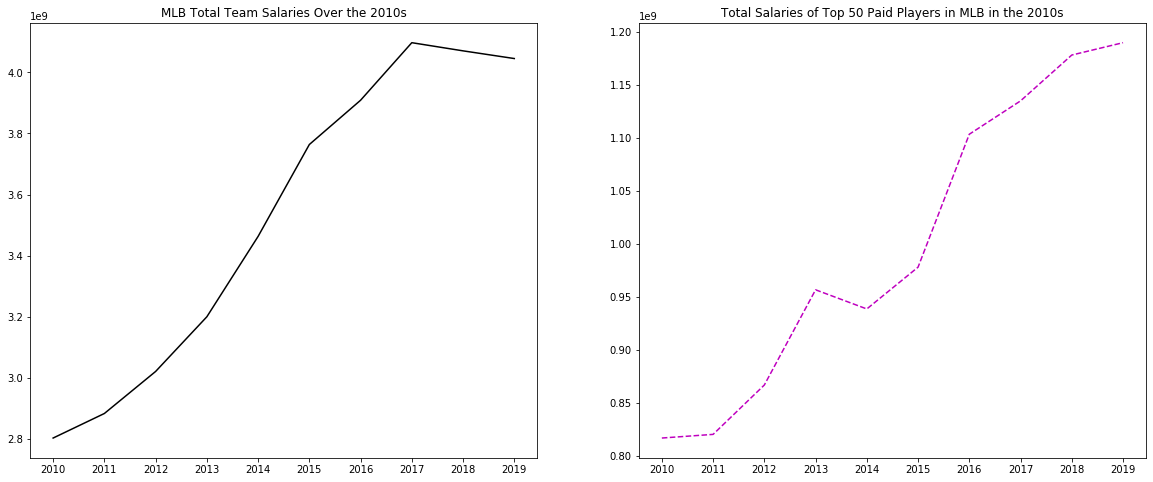

In [389]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharex=True)
ax1 = axes[0]
ax2 = axes[1]
ax1.plot(total_team_salaries["Year"], total_team_salaries["Payroll"], "k")
ax1.set_title("MLB Total Team Salaries Over the 2010s")
ax1.set_xticks(np.arange(2010, 2020, 1))
ax2.plot(highest_payed_players["In_The_Year"], highest_payed_players["SALARY"], "m--")
ax2.set_title("Total Salaries of Top 50 Paid Players in MLB in the 2010s")
ax2.set_xticks(np.arange(2010, 2020, 1))
plt.savfig("GrowthOfSalaries.png")

In [88]:
master_bats_clean_v2.columns

Index(['Age_reg', 'Tm_reg', 'G_reg', 'PA_reg', 'AB', 'R', 'H', 'HR', 'RBI',
       'SO', 'BA', 'OBP', 'SLG', 'OPS', 'Pos Summary_reg', 'Year_reg', 'Rbat',
       'RAA', 'WAA', 'RAR', 'WAR', 'waaWL%', '162WL%', 'Salary', 'Acquired',
       'Name'],
      dtype='object')

In [89]:
revised_precontract_range_stats_h.columns

Index(['Name', 'YearRANGE', 'Tm', 'G', 'PA', 'AB', 'R', 'H', 'HR', 'RBI', 'SO',
       'BA', 'OBP', 'SLG', 'OPS', 'Rbat', 'RAA', 'WAA', 'RAR', 'WAR', 'waaWL%',
       '162WL%', 'Salary(total)'],
      dtype='object')

In [90]:
revised_fifty_bats.columns

Index(['NAME', 'YearSigned', 'TEAM', 'POS', 'SALARY', 'YEARS', 'TOTAL VALUE',
       'AVG ANNUAL', 'Pitcher?', 'ContractLength', 'Year', 'Age', 'Tm', 'G',
       'PA', 'AB', 'R', 'H', 'HR', 'RBI', 'SO', 'BA', 'OBP', 'SLG', 'OPS',
       'Pos', 'Awards', 'Rbat', 'RAA', 'WAA', 'RAR', 'WAR', 'waaWL%', '162WL%',
       'Awards.1'],
      dtype='object')

In [91]:
revised_fifty_bats.iloc[:5, :12]

NAME  YearSigned TEAM POS    SALARY         YEARS  \
2          Mike Trout        2015  LAA  CF  34083333   6 (2015-20)   
6      Miguel Cabrera        2014  DET  DH  30000000  10 (2014-23)   
7     Yoenis Cespedes        2017  NYM  OF  29000000   4 (2017-20)   
9       Albert Pujols        2012  LAA  DH  28000000  10 (2012-21)   
12  Giancarlo Stanton        2015  NYY  RF  26000000  13 (2015-27)   

    TOTAL VALUE  AVG ANNUAL  Pitcher?  ContractLength  Year  Age  
2     144500000    24083333         0               6  2015   23  
6     292000000    29200000         0              10  2014   31  
7     110000000    27500000         0               4  2017   31  
9     240000000    24000000         0              10  2012   32  
12    325000000    25000000         0              13  2015   25

In [92]:
master_bats_clean_v2.iloc[-5:, 12:]

SLG    OPS  Pos Summary_reg  Year_reg  Rbat  RAA  WAA  RAR  WAR  \
5090  0.548  0.933              NaN    2017.0    28   36  3.6   53  5.1   
5091  0.362  0.658              NaN    2018.0    -6   -5 -0.4    4  0.5   
5092  0.425  0.732              NaN    2016.0    -8    7  0.6   23  2.2   
5095  0.300  0.568              NaN    2014.0   -24    3  0.2   21  1.9   
5096  0.399  0.687              NaN    2012.0   -13    9  1.0   27  2.8   

      waaWL%  162WL%      Salary       Acquired         Name  
5090   0.529   0.522   5325000.0  Amateur Draft  Zack Cozart  
5091   0.492   0.497  12666666.0    Free Agency  Zack Cozart  
5092   0.506   0.504   2925000.0  Amateur Draft  Zack Cozart  
5095   0.503   0.502    600000.0  Amateur Draft  Zack Cozart  
5096   0.507   0.506    480000.0  Amateur Draft  Zack Cozart

In [93]:
master_bats_clean_v3 = master_bats_clean_v2[(["Name"] + (list(master_bats_clean_v2.columns.values)[:-1]))]
master_bats_clean_v3 = master_bats_clean_v3.rename({"Age_reg": "Age", "Tm_reg": "Tm", "G_reg": "G", "PA_reg": "PA", "Year_reg": "Year"}, axis="columns").drop(["Pos Summary_reg"], axis=1)

In [94]:
master_bats_clean_v3.head()

Name   Age   Tm    G   PA   AB   R    H  HR  RBI  ...    Year  \
5        A.J. Ellis  31.0  LAD  133  505  423  44  114  13   52  ...  2012.0   
7        A.J. Ellis  33.0  LAD   93  347  283  21   54   3   25  ...  2014.0   
9        A.J. Ellis  32.0  LAD  115  448  390  43   93  10   52  ...  2013.0   
10  A.J. Pierzynski  37.0  TOT  102  362  338  25   85   5   37  ...  2014.0   
11  A.J. Pierzynski  36.0  TEX  134  529  503  48  137  17   70  ...  2013.0   

    Rbat  RAA  WAA  RAR  WAR  waaWL%  162WL%     Salary       Acquired  
5     11   17  1.8   33  3.4   0.514   0.511   490000.0  Amateur Draft  
7    -10   -7 -0.9    4  0.2   0.491   0.495  3550000.0  Amateur Draft  
9      2   10  1.1   25  2.5   0.510   0.507  2000000.0  Amateur Draft  
10   -12  -18 -1.9   -5 -0.7   0.481   0.493  8250000.0    Free Agency  
11    -4   -2  0.0   17  1.8   0.498   0.499  7500000.0    Free Agency  

[5 rows x 25 columns]

In [95]:
revised_fifty_bats_v2 = revised_fifty_bats.rename({"NAME": "Name", "TEAM": "Tm", "POS": "Position",
                                                  "SALARY": "Salary", "TOTAL VALUE": "Salary(total)",
                                                  "Pos": "Position/Hit Order"}, axis="columns")
revised_fifty_bats_v2 = revised_fifty_bats_v2.drop(["YEARS", "Awards.1"], axis=1)

In [96]:
revised_fifty_bats_v2.head()

Name  YearSigned   Tm Position    Salary  Salary(total)  \
2          Mike Trout        2015  LAA       CF  34083333      144500000   
6      Miguel Cabrera        2014  DET       DH  30000000      292000000   
7     Yoenis Cespedes        2017  NYM       OF  29000000      110000000   
9       Albert Pujols        2012  LAA       DH  28000000      240000000   
12  Giancarlo Stanton        2015  NYY       RF  26000000      325000000   

    AVG ANNUAL  Pitcher?  ContractLength  Year  ...    OPS Position/Hit Order  \
2     24083333         0               6  2015  ...  0.991               *8/D   
6     29200000         0              10  2014  ...  0.895             *3D5/H   
7     27500000         0               4  2017  ...  0.892               7/HD   
9     24000000         0              10  2012  ...  0.859              *3D/5   
12    25000000         0              13  2015  ...  0.952                9/D   

         Awards  Rbat  RAA  WAA  RAR  WAR  waaWL%  162WL%  
2   AS,MVP-2,SS    58   68  7.3   92  9.6   0.544   0.543  
6      AS,MVP-9    37   23  2.7   47  5.1   0.516   0.515  
7             0    12   10  1.0   21  2.0   0.513   0.506  
9        MVP-17    27   24  2.4   48  4.8   0.516   0.515  
12           AS    21   26  2.7   36  3.7   0.537   0.517  

[5 rows x 33 columns]

In [97]:
master_pitch_clean_v2.columns

Index(['Age_reg', 'Tm_reg', 'W', 'L', 'W-L%', 'ERA', 'G_reg', 'GS_reg', 'GF',
       'SV', 'IP_reg', 'H', 'R_reg', 'ER', 'HR', 'BB', 'SO', 'WHIP', 'H9',
       'HR9', 'SO9', 'Year_reg', 'RA9', 'RA9opp', 'RA9_avg', 'RAA', 'WAA',
       'WAR', 'RAR', 'waaWL%', '162WL%', 'Salary', 'Acquired', 'Name'],
      dtype='object')

In [98]:
revised_precontract_range_stats_p.columns

Index(['Name', 'YearRANGE', 'Tm', 'W', 'L', 'W-L%', 'ERA', 'G', 'GS', 'GF',
       'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'SO', 'WHIP', 'H9', 'HR9',
       'SO9', 'RA9', 'RA9opp', 'RA9avg', 'RAA', 'WAA', 'waaWL%', '162WL%',
       'Salary(total)'],
      dtype='object')

In [99]:
revised_fifty_pitch.columns

Index(['NAME', 'YearSigned', 'TEAM', 'POS', 'SALARY', 'YEARS', 'TOTAL VALUE',
       'AVG ANNUAL', 'Pitcher?', 'ContractLength', 'Year.2', 'Age.2', 'Tm.2',
       'W', 'L', 'W-L%', 'ERA', 'G.2', 'GS', 'GF', 'SV', 'IP', 'H.1', 'R.1',
       'ER', 'HR.1', 'BB.1', 'SO.1', 'WHIP', 'H9', 'HR9', 'SO9', 'RA9',
       'RA9opp', 'RA9avg', 'RAA.1', 'WAA.1', 'waaWL%', '162WL%', 'Awards.3',
       'bin_groups', 'In_The_Year'],
      dtype='object')

In [100]:
master_pitch_clean_v3 = master_pitch_clean_v2.rename({"Age_reg": "Age", "Tm_reg": "Tm","G_reg": "G", "GS_reg": "GS","IP_reg": "IP", "R_reg": "R",
                                                     "Year_reg": "Year"}, axis="columns")
master_pitch_clean_v3 = master_pitch_clean_v3[(["Name"] + (list(master_pitch_clean_v3.columns.values)[:-1]))]

In [101]:
master_pitch_clean_v3.head()

Name   Age   Tm   W   L   W-L%   ERA   G  GS  GF  ...  RA9opp  \
0   A.J. Achter  27.0  LAA   1   0  1.000  3.11  27   0  17  ...    4.57   
3  A.J. Burnett  34.0  NYY  11  11  0.500  5.15  33  32   0  ...    4.45   
4  A.J. Burnett  35.0  PIT  16  10  0.615  3.51  31  31   0  ...    4.19   
5  A.J. Burnett  38.0  PIT   9   7  0.563  3.18  26  26   0  ...    4.15   
6  A.J. Burnett  36.0  PIT  10  11  0.476  3.30  30  30   0  ...    4.17   

   RA9_avg  RAA  WAA  WAR  RAR  waaWL%  162WL%      Salary     Acquired  
0      NaN    3  0.3  0.5    6   0.510   0.502         NaN      Waivers  
3      NaN  -18 -1.8  0.0    2   0.445   0.489  16500000.0  Free Agency  
4      NaN    9  1.0  2.6   27   0.532   0.506  16500000.0       Traded  
5      NaN   12  1.3  2.6   25   0.551   0.508   8500000.0  Free Agency  
6      NaN    4  0.5  2.0   20   0.516   0.503  16500000.0       Traded  

[5 rows x 34 columns]

In [102]:
revised_fifty_pitch_v2 = revised_fifty_pitch.rename({"NAME": "Name", "TEAM": "Tm", "POS": "Position", "SALARY": "Salary",
                           "TOTAL VALUE": "Salary(total)", "Year.2": "Year", "Age.2": "Age", "G.2": "G",
                           "H.1": "H", "R.1": "R", "HR.1": "HR", "BB.1": "BB", "SO.1": "SO", "RAA.1": "RAA", "WAA.1": "WAA",
                           "Awards.3": "Awards"}, axis="columns")
revised_fifty_pitch_v2 = revised_fifty_pitch_v2.drop(["YEARS", "Tm.2"], axis=1)

In [103]:
revised_fifty_pitch_v2.columns.values

array(['Name', 'YearSigned', 'Tm', 'Position', 'Salary', 'Salary(total)',
       'AVG ANNUAL', 'Pitcher?', 'ContractLength', 'Year', 'Age', 'W',
       'L', 'W-L%', 'ERA', 'G', 'GS', 'GF', 'SV', 'IP', 'H', 'R', 'ER',
       'HR', 'BB', 'SO', 'WHIP', 'H9', 'HR9', 'SO9', 'RA9', 'RA9opp',
       'RA9avg', 'RAA', 'WAA', 'waaWL%', '162WL%', 'Awards', 'bin_groups',
       'In_The_Year'], dtype=object)

In [104]:
master_pitch_clean_v3.columns.values

array(['Name', 'Age', 'Tm', 'W', 'L', 'W-L%', 'ERA', 'G', 'GS', 'GF',
       'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'SO', 'WHIP', 'H9', 'HR9',
       'SO9', 'Year', 'RA9', 'RA9opp', 'RA9_avg', 'RAA', 'WAA', 'WAR',
       'RAR', 'waaWL%', '162WL%', 'Salary', 'Acquired'], dtype=object)

In [105]:
revised_precontract_range_stats_p.columns.values

array(['Name', 'YearRANGE', 'Tm', 'W', 'L', 'W-L%', 'ERA', 'G', 'GS',
       'GF', 'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'SO', 'WHIP', 'H9',
       'HR9', 'SO9', 'RA9', 'RA9opp', 'RA9avg', 'RAA', 'WAA', 'waaWL%',
       '162WL%', 'Salary(total)'], dtype=object)

In [106]:
master_pitch_clean_v3.rename({"RA9_avg": "RA9avg"}, axis="columns", inplace=True)

In [107]:
master_pitch_clean_v3.columns.values

array(['Name', 'Age', 'Tm', 'W', 'L', 'W-L%', 'ERA', 'G', 'GS', 'GF',
       'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'SO', 'WHIP', 'H9', 'HR9',
       'SO9', 'Year', 'RA9', 'RA9opp', 'RA9avg', 'RAA', 'WAA', 'WAR',
       'RAR', 'waaWL%', '162WL%', 'Salary', 'Acquired'], dtype=object)

In [108]:
master_bats_clean_v3.columns.values

array(['Name', 'Age', 'Tm', 'G', 'PA', 'AB', 'R', 'H', 'HR', 'RBI', 'SO',
       'BA', 'OBP', 'SLG', 'OPS', 'Year', 'Rbat', 'RAA', 'WAA', 'RAR',
       'WAR', 'waaWL%', '162WL%', 'Salary', 'Acquired'], dtype=object)

In [109]:
revised_fifty_bats_v2.columns.values

array(['Name', 'YearSigned', 'Tm', 'Position', 'Salary', 'Salary(total)',
       'AVG ANNUAL', 'Pitcher?', 'ContractLength', 'Year', 'Age', 'Tm',
       'G', 'PA', 'AB', 'R', 'H', 'HR', 'RBI', 'SO', 'BA', 'OBP', 'SLG',
       'OPS', 'Position/Hit Order', 'Awards', 'Rbat', 'RAA', 'WAA', 'RAR',
       'WAR', 'waaWL%', '162WL%'], dtype=object)

In [110]:
revised_precontract_range_stats_h.columns.values

array(['Name', 'YearRANGE', 'Tm', 'G', 'PA', 'AB', 'R', 'H', 'HR', 'RBI',
       'SO', 'BA', 'OBP', 'SLG', 'OPS', 'Rbat', 'RAA', 'WAA', 'RAR',
       'WAR', 'waaWL%', '162WL%', 'Salary(total)'], dtype=object)

In [111]:
master_bats_clean_v3.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3151 entries, 5 to 5096
Data columns (total 25 columns):
Name        3151 non-null object
Age         3148 non-null float64
Tm          3148 non-null object
G           3151 non-null int64
PA          3151 non-null int64
AB          3151 non-null int64
R           3151 non-null int64
H           3151 non-null int64
HR          3151 non-null int64
RBI         3151 non-null int64
SO          3151 non-null int64
BA          3151 non-null float64
OBP         3151 non-null float64
SLG         3151 non-null float64
OPS         3151 non-null float64
Year        3151 non-null float64
Rbat        3151 non-null int64
RAA         3151 non-null int64
WAA         3151 non-null float64
RAR         3151 non-null int64
WAR         3151 non-null float64
waaWL%      3151 non-null float64
162WL%      3151 non-null float64
Salary      2864 non-null float64
Acquired    3151 non-null object
dtypes: float64(11), int64(11), object(3)
memory usage: 640.0+ KB


In [112]:
revised_fifty_bats_v2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 2 to 511
Data columns (total 33 columns):
Name                  95 non-null object
YearSigned            95 non-null int64
Tm                    95 non-null object
Position              95 non-null object
Salary                95 non-null int64
Salary(total)         95 non-null int64
AVG ANNUAL            95 non-null int64
Pitcher?              95 non-null int64
ContractLength        95 non-null int64
Year                  95 non-null int64
Age                   95 non-null int64
Tm                    95 non-null object
G                     95 non-null int64
PA                    95 non-null int64
AB                    95 non-null int64
R                     95 non-null int64
H                     95 non-null int64
HR                    95 non-null int64
RBI                   95 non-null int64
SO                    95 non-null int64
BA                    95 non-null float64
OBP                   95 non-null float64
SLG     

In [113]:
revised_precontract_range_stats_h.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 23 columns):
Name             94 non-null object
YearRANGE        94 non-null object
Tm               94 non-null object
G                94 non-null int64
PA               94 non-null int64
AB               94 non-null int64
R                94 non-null int64
H                94 non-null int64
HR               94 non-null int64
RBI              94 non-null int64
SO               94 non-null int64
BA               94 non-null float64
OBP              94 non-null float64
SLG              94 non-null float64
OPS              94 non-null float64
Rbat             94 non-null int64
RAA              94 non-null int64
WAA              94 non-null float64
RAR              94 non-null int64
WAR              94 non-null float64
waaWL%           94 non-null float64
162WL%           94 non-null float64
Salary(total)    94 non-null int64
dtypes: float64(8), int64(12), object(3)
memory usage: 17.0+ KB


In [114]:
master_pitch_clean_v3.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4275 entries, 0 to 5674
Data columns (total 34 columns):
Name        4275 non-null object
Age         4275 non-null float64
Tm          4275 non-null object
W           4275 non-null int64
L           4275 non-null int64
W-L%        4237 non-null float64
ERA         4275 non-null float64
G           4275 non-null int64
GS          4275 non-null int64
GF          4275 non-null int64
SV          4275 non-null int64
IP          4275 non-null float64
H           4275 non-null int64
R           4275 non-null int64
ER          4275 non-null int64
HR          4275 non-null int64
BB          4275 non-null int64
SO          4275 non-null int64
WHIP        4275 non-null float64
H9          4275 non-null float64
HR9         4275 non-null float64
SO9         4275 non-null float64
Year        4275 non-null float64
RA9         4275 non-null float64
RA9opp      4275 non-null float64
RA9avg      0 non-null float64
RAA         4275 non-null int64
WAA   

In [115]:
revised_fifty_pitch_v2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 510
Data columns (total 40 columns):
Name              60 non-null object
YearSigned        60 non-null int64
Tm                60 non-null object
Position          60 non-null object
Salary            60 non-null int64
Salary(total)     60 non-null int64
AVG ANNUAL        60 non-null int64
Pitcher?          60 non-null int64
ContractLength    60 non-null int64
Year              59 non-null float64
Age               59 non-null float64
W                 59 non-null float64
L                 59 non-null float64
W-L%              59 non-null float64
ERA               59 non-null float64
G                 59 non-null float64
GS                59 non-null float64
GF                59 non-null float64
SV                59 non-null float64
IP                59 non-null float64
H                 59 non-null float64
R                 59 non-null float64
ER                59 non-null float64
HR                59 non-null float64

In [116]:
revised_precontract_range_stats_p.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 30 columns):
Name             61 non-null object
YearRANGE        61 non-null object
Tm               61 non-null object
W                61 non-null int64
L                61 non-null int64
W-L%             61 non-null float64
ERA              61 non-null float64
G                61 non-null int64
GS               61 non-null int64
GF               61 non-null int64
SV               61 non-null int64
IP               61 non-null float64
H                61 non-null int64
R                61 non-null int64
ER               61 non-null int64
HR               61 non-null int64
BB               61 non-null int64
SO               61 non-null int64
WHIP             61 non-null float64
H9               61 non-null float64
HR9              61 non-null float64
SO9              61 non-null float64
RA9              61 non-null float64
RA9opp           60 non-null float64
RA9avg           60 non-null float64

In [117]:
test = revised_precontract_range_stats_p.assign(dollar_per_WAA = lambda x: x["Salary(total)"] /  x["WAA"])

In [118]:
test.dollar_per_WAA.describe()

count    6.000000e+01
mean     5.518267e+05
std      2.038969e+07
min     -1.237500e+08
25%      1.703107e+06
50%      4.133204e+06
75%      6.511882e+06
max      2.812500e+07
Name: dollar_per_WAA, dtype: float64

In [119]:
test_2 = revised_fifty_pitch_v2.assign(dollar_per_WAA = lambda x: x["Salary"] /  x["WAA"])

In [120]:
ab = test_2["dollar_per_WAA"]

In [121]:
ab = ab.sort_values()[:-7]

In [122]:
ab.describe()

count    5.300000e+01
mean     8.417222e+06
std      2.834853e+07
min     -5.000000e+07
25%     -4.814815e+06
50%      8.125000e+06
75%      1.666667e+07
max      1.050000e+08
Name: dollar_per_WAA, dtype: float64

In [123]:
test_b = revised_precontract_range_stats_h.assign(dollar_per_WAR = lambda x: x["Salary(total)"] /  x["WAR"])
test_2_b = revised_fifty_bats_v2.assign(dollar_per_WAR = lambda x: x["Salary"] /  x["WAR"])

In [124]:
test_b["dollar_per_WAR"].describe()

count    9.400000e+01
mean     3.345092e+06
std      3.494175e+06
min      6.893939e+04
25%      1.299568e+06
50%      2.410881e+06
75%      3.789642e+06
max      1.640000e+07
Name: dollar_per_WAR, dtype: float64

In [125]:
test_2_ba = test_2_b["dollar_per_WAR"].sort_values()

In [126]:
test_2_ba

250   -7.500000e+07
457   -4.307410e+07
49    -3.720000e+07
453   -3.275000e+07
70    -3.250000e+07
74    -2.240000e+07
380   -1.812500e+07
447   -1.555556e+07
143   -1.000000e+07
247   -8.852941e+06
298   -5.172414e+06
344    1.686747e+06
507    2.272727e+06
248    2.586207e+06
296    2.703179e+06
197    2.881356e+06
36     2.898551e+06
47     2.937500e+06
243    3.200000e+06
90     3.225806e+06
45     3.392857e+06
201    3.402015e+06
378    3.425926e+06
2      3.550347e+06
343    3.571429e+06
43     3.611111e+06
18     3.653846e+06
97     3.730720e+06
17     3.809524e+06
20     3.833333e+06
           ...     
241    1.333333e+07
79     1.441667e+07
7      1.450000e+07
16     1.470588e+07
69     1.533333e+07
25     1.544643e+07
408    1.625000e+07
497    1.656250e+07
125    1.659341e+07
206    1.923077e+07
37     2.000000e+07
450    2.266667e+07
356    2.600000e+07
26     2.689583e+07
38     2.857143e+07
31     3.000000e+07
511    3.041666e+07
370    3.392857e+07
252    3.583333e+07


In [127]:
test_2_ba  = test_2_ba[:-11]

In [128]:
test_2_ba.describe()

count    8.400000e+01
mean     4.786903e+06
std      1.634222e+07
min     -7.500000e+07
25%      3.399726e+06
50%      4.875415e+06
75%      1.208716e+07
max      3.583333e+07
Name: dollar_per_WAR, dtype: float64

In [129]:
revised_precontract_range_stats_p1 = revised_precontract_range_stats_p.assign(dollar_per_WAA = lambda x: x["Salary(total)"] /  x["WAA"]).replace(np.inf, np.nan)
revised_precontract_range_stats_h1 = revised_precontract_range_stats_h.assign(dollar_per_WAR = lambda x: x["Salary(total)"] /  x["WAR"]).replace(np.inf, np.nan)
revised_fifty_bats_v3 = revised_fifty_bats_v2.assign(dollar_per_WAR = lambda x: x["Salary"] /  x["WAR"]).replace(np.inf, np.nan)
revised_fifty_pitch_v3 = revised_fifty_pitch_v2.assign(dollar_per_WAA = lambda x: x["Salary"] /  x["WAA"]).replace(np.inf, np.nan)

## Analysis

In [130]:
team_salary_df[team_salary_df["Team Name"] == "Miami Marlins"]     

Year      Team Name  # Players    Payroll  $ Per Player 1 Year Delta  \
10   2010  Miami Marlins         27   47429719       1756656     10387793   
41   2011  Miami Marlins         27   57695000       2136852     10265281   
76   2012  Miami Marlins         27  101628000       3764000          ---   
107  2013  Miami Marlins         32   38026900       1188341    -63601100   
138  2014  Miami Marlins         27   45825400       1697237      7798500   
169  2015  Miami Marlins         25   69031500       2761260     23206100   
200  2016  Miami Marlins         29   74364500       2564293      5333000   
231  2017  Miami Marlins         29  115406101       3979521     41041601   
262  2018  Miami Marlins         33   99510143       3015459    -15895958   
293  2019  Miami Marlins         28   71903319       2567976    -27606824   

    % Change  
10      0.28  
41     0.216  
76         —  
107   -0.626  
138    0.205  
169    0.506  
200    0.077  
231    0.552  
262   -0.138  
293   -0.277

In [131]:
salary_11 = team_salary_df.iloc[41, 3]

In [132]:
salary_12 = team_salary_df.iloc[76, 3]

In [133]:
team_salary_df.iloc[76, 5] = salary_12 - salary_11
team_salary_df.iloc[76, 6] = round(((salary_12 - salary_11) / salary_11), 3)

In [134]:
team_salary_df[team_salary_df["Team Name"] == "Miami Marlins"]

Year      Team Name  # Players    Payroll  $ Per Player  1 Year Delta  \
10   2010  Miami Marlins         27   47429719       1756656      10387793   
41   2011  Miami Marlins         27   57695000       2136852      10265281   
76   2012  Miami Marlins         27  101628000       3764000      43933000   
107  2013  Miami Marlins         32   38026900       1188341     -63601100   
138  2014  Miami Marlins         27   45825400       1697237       7798500   
169  2015  Miami Marlins         25   69031500       2761260      23206100   
200  2016  Miami Marlins         29   74364500       2564293       5333000   
231  2017  Miami Marlins         29  115406101       3979521      41041601   
262  2018  Miami Marlins         33   99510143       3015459     -15895958   
293  2019  Miami Marlins         28   71903319       2567976     -27606824   

    % Change  
10      0.28  
41     0.216  
76     0.761  
107   -0.626  
138    0.205  
169    0.506  
200    0.077  
231    0.552  
262   -0.138  
293   -0.277

In [135]:
team_salary_df["% Change"] = team_salary_df["% Change"].astype("float")

In [136]:
team_salary_df.groupby("Team Name").mean()

Year  # Players       Payroll  $ Per Player  \
Team Name                                                              
Arizona Diamondbacks   2014.5       29.8  9.416596e+07     3158746.1   
Atlanta Braves         2014.5       31.0  1.026187e+08     3320931.5   
Baltimore Orioles      2014.5       29.6  1.108965e+08     3753235.4   
Boston Red Sox         2014.5       31.4  1.873956e+08     5970803.5   
Chicago Cubs           2014.5       30.1  1.450327e+08     4883462.7   
Chicago White Sox      2014.5       27.7  1.029776e+08     3723189.8   
Cincinnati Reds        2014.5       30.7  9.975457e+07     3267294.3   
Cleveland Indians      2014.5       29.7  9.062271e+07     3060226.1   
Colorado Rockies       2014.5       29.4  1.035045e+08     3538018.1   
Detroit Tigers         2014.5       28.7  1.498188e+08     5229609.6   
Houston Astros         2014.5       28.7  9.222286e+07     3213280.9   
Kansas City Royals     2014.5       30.0  9.592620e+07     3226333.9   
Los Angeles Angels     2014.5       29.8  1.518492e+08     5121390.6   
Los Angeles Dodgers    2014.5       34.5  1.928171e+08     5512885.5   
Miami Marlins          2014.5       28.4  7.208206e+07     2543159.5   
Milwaukee Brewers      2014.5       28.8  9.034400e+07     3148779.1   
Minnesota Twins        2014.5       28.7  1.056776e+08     3704434.8   
New York Mets          2014.5       29.5  1.241621e+08     4191035.6   
New York Yankees       2014.5       30.4  2.072572e+08     6835388.9   
Oakland Athletics      2014.5       31.2  7.262347e+07     2326384.1   
Philadelphia Phillies  2014.5       29.8  1.401223e+08     4720852.0   
Pittsburgh Pirates     2014.5       29.3  7.210235e+07     2473092.1   
San Diego Padres       2014.5       31.4  7.716233e+07     2453716.6   
San Francisco Giants   2014.5       28.2  1.530324e+08     5459204.2   
Seattle Mariners       2014.5       29.9  1.169767e+08     3924570.5   
St. Louis Cardinals    2014.5       29.0  1.283024e+08     4399527.0   
TOTAL                  2014.5      898.7  3.525448e+09     3917968.9   
Tampa Bay Rays         2014.5       29.6  6.694976e+07     2259283.9   
Texas Rangers          2014.5       31.9  1.252808e+08     3926332.0   
Toronto Blue Jays      2014.5       31.1  1.200865e+08     3917465.1   
Washington Nationals   2014.5       30.4  1.336832e+08     4505543.9   

                       1 Year Delta  % Change  
Team Name                                      
Arizona Diamondbacks      5044076.6    0.0751  
Atlanta Braves            3080775.5    0.0407  
Baltimore Orioles         1244509.0    0.0396  
Boston Red Sox           11336778.8    0.0765  
Chicago Cubs              7910465.5    0.0616  
Chicago White Sox         -957150.0    0.0138  
Cincinnati Reds           5493471.4    0.0668  
Cleveland Indians         3760293.4    0.0558  
Colorado Rockies          6964296.7    0.0715  
Detroit Tigers             -37950.0    0.0175  
Houston Astros            5445300.0    0.1226  
Kansas City Royals        1849923.3    0.0640  
Los Angeles Angels        4600958.3    0.0395  
Los Angeles Dodgers       9239169.3    0.1159  
Miami Marlins             3486139.3    0.1556  
Milwaukee Brewers         4274790.0    0.0680  
Minnesota Twins           5262466.6    0.0740  
New York Mets              350163.5    0.0199  
New York Yankees            62225.7    0.0067  
Oakland Athletics         2670138.3    0.0542  
Philadelphia Phillies      952458.2    0.0281  
Pittsburgh Pirates        2294400.0    0.0514  
San Diego Padres          5863090.0    0.1117  
San Francisco Giants      8761320.3    0.0801  
Seattle Mariners          4691597.3    0.0475  
St. Louis Cardinals       6632176.7    0.0561  
TOTAL                   137018541.9    0.0425  
Tampa Bay Rays            -531723.5    0.0228  
Texas Rangers             4201905.5    0.0701  
Toronto Blue Jays         3570407.1    0.0560  
Washington Nationals     13732569.1    0.1323

In [137]:
team_salary_df_2 = team_salary_df[team_salary_df["Team Name"] != "TOTAL"]

In [138]:
team_salary_df_2.groupby("Team Name").mean().sort_values("Payroll", ascending=False)

Year  # Players      Payroll  $ Per Player  \
Team Name                                                             
New York Yankees       2014.5       30.4  207257232.9     6835388.9   
Los Angeles Dodgers    2014.5       34.5  192817143.5     5512885.5   
Boston Red Sox         2014.5       31.4  187395613.2     5970803.5   
San Francisco Giants   2014.5       28.2  153032414.5     5459204.2   
Los Angeles Angels     2014.5       29.8  151849195.9     5121390.6   
Detroit Tigers         2014.5       28.7  149818775.0     5229609.6   
Chicago Cubs           2014.5       30.1  145032731.9     4883462.7   
Philadelphia Phillies  2014.5       29.8  140122332.0     4720852.0   
Washington Nationals   2014.5       30.4  133683225.2     4505543.9   
St. Louis Cardinals    2014.5       29.0  128302386.7     4399527.0   
Texas Rangers          2014.5       31.9  125280836.3     3926332.0   
New York Mets          2014.5       29.5  124162104.3     4191035.6   
Toronto Blue Jays      2014.5       31.1  120086465.8     3917465.1   
Seattle Mariners       2014.5       29.9  116976660.5     3924570.5   
Baltimore Orioles      2014.5       29.6  110896545.4     3753235.4   
Minnesota Twins        2014.5       28.7  105677586.2     3704434.8   
Colorado Rockies       2014.5       29.4  103504472.2     3538018.1   
Chicago White Sox      2014.5       27.7  102977577.3     3723189.8   
Atlanta Braves         2014.5       31.0  102618726.5     3320931.5   
Cincinnati Reds        2014.5       30.7   99754573.9     3267294.3   
Kansas City Royals     2014.5       30.0   95926195.6     3226333.9   
Arizona Diamondbacks   2014.5       29.8   94165959.7     3158746.1   
Houston Astros         2014.5       28.7   92222860.0     3213280.9   
Cleveland Indians      2014.5       29.7   90622706.9     3060226.1   
Milwaukee Brewers      2014.5       28.8   90344003.7     3148779.1   
San Diego Padres       2014.5       31.4   77162330.6     2453716.6   
Oakland Athletics      2014.5       31.2   72623470.0     2326384.1   
Pittsburgh Pirates     2014.5       29.3   72102350.5     2473092.1   
Miami Marlins          2014.5       28.4   72082058.2     2543159.5   
Tampa Bay Rays         2014.5       29.6   66949760.3     2259283.9   

                       1 Year Delta  % Change  
Team Name                                      
New York Yankees            62225.7    0.0067  
Los Angeles Dodgers       9239169.3    0.1159  
Boston Red Sox           11336778.8    0.0765  
San Francisco Giants      8761320.3    0.0801  
Los Angeles Angels        4600958.3    0.0395  
Detroit Tigers             -37950.0    0.0175  
Chicago Cubs              7910465.5    0.0616  
Philadelphia Phillies      952458.2    0.0281  
Washington Nationals     13732569.1    0.1323  
St. Louis Cardinals       6632176.7    0.0561  
Texas Rangers             4201905.5    0.0701  
New York Mets              350163.5    0.0199  
Toronto Blue Jays         3570407.1    0.0560  
Seattle Mariners          4691597.3    0.0475  
Baltimore Orioles         1244509.0    0.0396  
Minnesota Twins           5262466.6    0.0740  
Colorado Rockies          6964296.7    0.0715  
Chicago White Sox         -957150.0    0.0138  
Atlanta Braves            3080775.5    0.0407  
Cincinnati Reds           5493471.4    0.0668  
Kansas City Royals        1849923.3    0.0640  
Arizona Diamondbacks      5044076.6    0.0751  
Houston Astros            5445300.0    0.1226  
Cleveland Indians         3760293.4    0.0558  
Milwaukee Brewers         4274790.0    0.0680  
San Diego Padres          5863090.0    0.1117  
Oakland Athletics         2670138.3    0.0542  
Pittsburgh Pirates        2294400.0    0.0514  
Miami Marlins             3486139.3    0.1556  
Tampa Bay Rays            -531723.5    0.0228

In [139]:
team_wins_df = pd.read_excel("teamWins.xlsx")

In [140]:
team_wins_df.head()

Team Name    W   L    PCT   RS   RA  DIFF  Year  DIVISON  \
0       Atlanta Braves   97  65  0.599  855  743   112  2019        1   
1       Houston Astros  107  55  0.660  920  640   280  2019        1   
2  Los Angeles Dodgers  106  56  0.654  886  613   273  2019        1   
3      Minnesota Twins  101  61  0.623  939  754   185  2019        1   
4     New York Yankees  103  59  0.636  943  739   204  2019        1   

   WILDCARD  WorldSeries  
0         0            0  
1         0            0  
2         0            0  
3         0            0  
4         0            0

In [141]:
master_team_df_2 = team_salary_df_2.merge(team_wins_df, "left", on=("Team Name", "Year"), suffixes=('_x', "_y"))

In [142]:
master_team_df_2.head()

Year             Team Name  # Players    Payroll  $ Per Player  \
0  2010  Arizona Diamondbacks         27   71984833       2666105   
1  2010        Atlanta Braves         27   84390334       3125568   
2  2010     Baltimore Orioles         26   75412500       2900481   
3  2010        Boston Red Sox         31  173759833       5605156   
4  2010          Chicago Cubs         28  143359000       5119964   

   1 Year Delta  % Change   W   L    PCT   RS   RA  DIFF  DIVISON  WILDCARD  \
0      -1390167    -0.019  65  97  0.401  713  836  -123        0         0   
1     -13049000    -0.134  91  71  0.562  738  629   109        0         1   
2       7042708     0.103  66  96  0.407  613  785  -172        0         0   
3      50956193     0.415  89  73  0.549  818  744    74        0         0   
4       8216667     0.061  75  87  0.463  685  767   -82        0         0   

   WorldSeries  
0            0  
1            0  
2            0  
3            0  
4            0

Text(1.05, 0.5, 'Club Regular Season Wins')

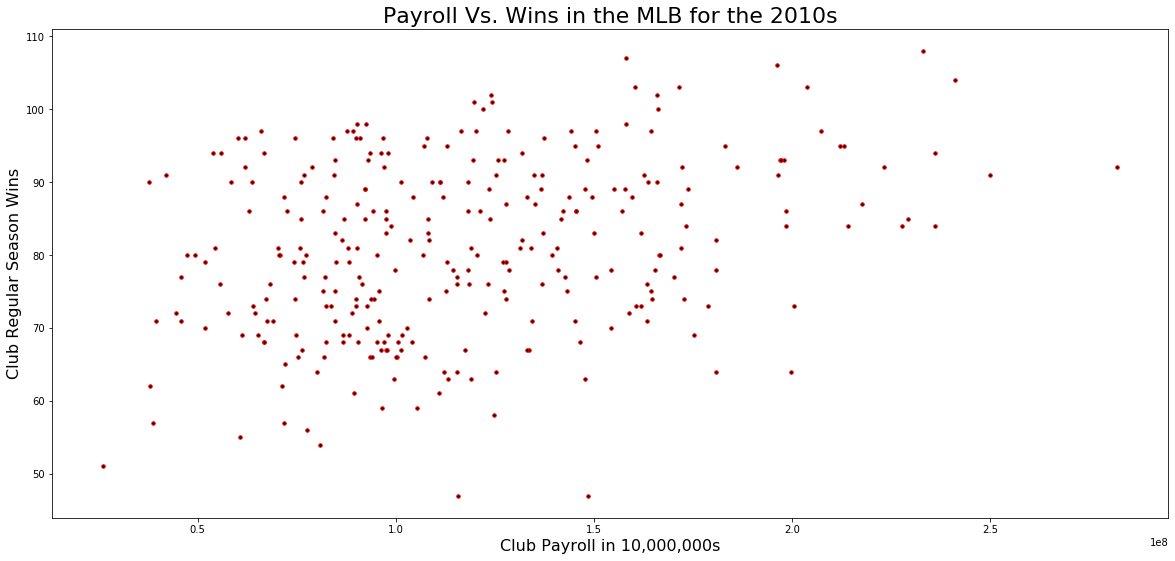

In [143]:
fig = plt.figure(figsize=(20,9))
plt.scatter(master_team_df_2["Payroll"], master_team_df_2["W"], s=12, c="black", edgecolor="red", figure=fig)
plt.title("Payroll Vs. Wins in the MLB for the 2010s", fontsize=22)
plt.xlabel("Club Payroll in 10,000,000s", fontsize=16, y=1.05)
plt.ylabel("Club Regular Season Wins", fontsize=16, x=1.05)

In [144]:
def regress_me(df, x, y, color="red", equations_position=[(0, 40), (-20, 40)], units=1000000):
    fig = plt.figure(figsize=(20,9))
    plt.scatter(df[x], df[y], c=color, marker="o", s=12, alpha=0.85, edgecolor = "black", figure=fig)
    (slope, intercept, rvalue, _, _) = linregress(df[x],df[y])
    predicted_values = df[x] * slope + intercept
    equation = f"y = {round(slope*units, 3)}x + {round(intercept, 3)}"
    plt.plot(df[x], predicted_values, "b-")
    plt.annotate(equation, equations_position[0], fontsize=20, color=color)
    plt.annotate(f"r = {round(rvalue, 3)}", equations_position[1], fontsize=16, color=color)
    plt.annotate(f"r = {round(rvalue, 3)}", equations_position[1], fontsize=16, color=color)

Text(1.05, 0.5, 'Club Regular Season Wins')

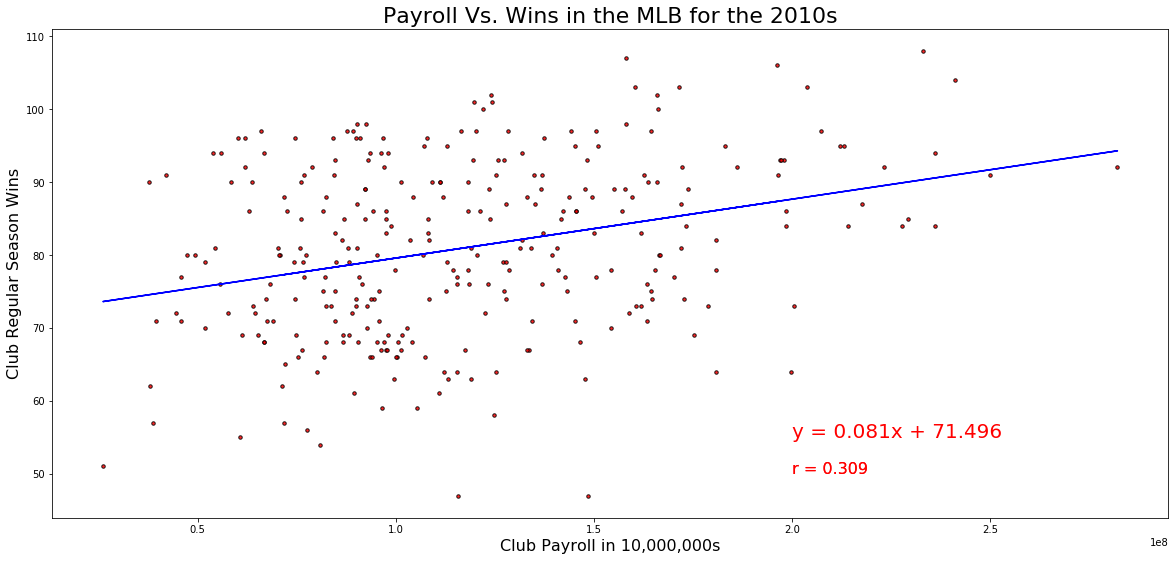

In [145]:
regress_me(master_team_df_2, "Payroll", "W",  equations_position=[(200000000, 55), (200000000, 50)])
plt.title("Payroll Vs. Wins in the MLB for the 2010s", fontsize=22)
plt.xlabel("Club Payroll in 10,000,000s", fontsize=16, y=1.05)
plt.ylabel("Club Regular Season Wins", fontsize=16, x=1.05)

In [146]:
master_bats_clean_v3.iloc[:5, 5:]

AB   R    H  HR  RBI   SO     BA    OBP    SLG    OPS    Year  Rbat  RAA  \
5   423  44  114  13   52  107  0.270  0.373  0.414  0.786  2012.0    11   17   
7   283  21   54   3   25   57  0.191  0.323  0.254  0.577  2014.0   -10   -7   
9   390  43   93  10   52   78  0.238  0.318  0.364  0.682  2013.0     2   10   
10  338  25   85   5   37   54  0.251  0.288  0.337  0.625  2014.0   -12  -18   
11  503  48  137  17   70   76  0.272  0.297  0.425  0.722  2013.0    -4   -2   

    WAA  RAR  WAR  waaWL%  162WL%     Salary       Acquired  
5   1.8   33  3.4   0.514   0.511   490000.0  Amateur Draft  
7  -0.9    4  0.2   0.491   0.495  3550000.0  Amateur Draft  
9   1.1   25  2.5   0.510   0.507  2000000.0  Amateur Draft  
10 -1.9   -5 -0.7   0.481   0.493  8250000.0    Free Agency  
11  0.0   17  1.8   0.498   0.499  7500000.0    Free Agency

In [147]:
revised_precontract_range_stats_p1["dollar_per_WAA"].describe()

count    6.000000e+01
mean     5.518267e+05
std      2.038969e+07
min     -1.237500e+08
25%      1.703107e+06
50%      4.133204e+06
75%      6.511882e+06
max      2.812500e+07
Name: dollar_per_WAA, dtype: float64

In [148]:
revised_fifty_pitch_v3["dollar_per_WAA"].describe()

count    5.300000e+01
mean     8.417222e+06
std      2.834853e+07
min     -5.000000e+07
25%     -4.814815e+06
50%      8.125000e+06
75%      1.666667e+07
max      1.050000e+08
Name: dollar_per_WAA, dtype: float64

In [149]:
revised_precontract_range_stats_h1["dollar_per_WAR"].describe()

count    9.400000e+01
mean     3.345092e+06
std      3.494175e+06
min      6.893939e+04
25%      1.299568e+06
50%      2.410881e+06
75%      3.789642e+06
max      1.640000e+07
Name: dollar_per_WAR, dtype: float64

In [150]:
revised_fifty_bats_v3["dollar_per_WAR"].describe()

count    8.400000e+01
mean     4.786903e+06
std      1.634222e+07
min     -7.500000e+07
25%      3.399726e+06
50%      4.875415e+06
75%      1.208716e+07
max      3.583333e+07
Name: dollar_per_WAR, dtype: float64

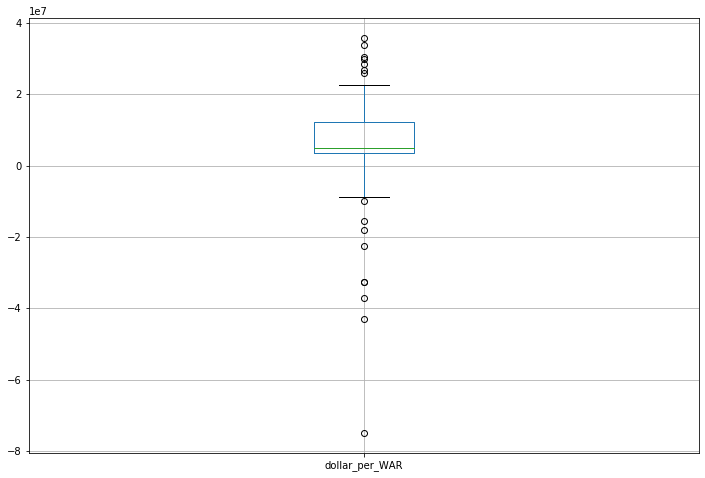

In [151]:
revised_fifty_bats_v3.boxplot(column=["dollar_per_WAR"], figsize=(12, 8))

In [152]:
master_bats_clean_v4 = master_bats_clean_v3.dropna()
master_pitch_clean_v4 = master_pitch_clean_v3.drop("RA9avg", axis=1).dropna()

In [153]:
master_bats_clean_v4 = master_bats_clean_v4.assign(dollar_per_WAR = lambda x: x["Salary"] /  x["WAR"]).replace(np.inf, np.nan).dropna()
master_pitch_clean_v4 = master_pitch_clean_v4.assign(dollar_per_WAA = lambda x: x["Salary"] /  x["WAA"]).replace(np.inf, np.nan).dropna()

In [154]:
master_bats_clean_v4.head()

Name   Age   Tm    G   PA   AB   R    H  HR  RBI  ...  Rbat  \
5        A.J. Ellis  31.0  LAD  133  505  423  44  114  13   52  ...    11   
7        A.J. Ellis  33.0  LAD   93  347  283  21   54   3   25  ...   -10   
9        A.J. Ellis  32.0  LAD  115  448  390  43   93  10   52  ...     2   
10  A.J. Pierzynski  37.0  TOT  102  362  338  25   85   5   37  ...   -12   
11  A.J. Pierzynski  36.0  TEX  134  529  503  48  137  17   70  ...    -4   

    RAA  WAA  RAR  WAR  waaWL%  162WL%     Salary       Acquired  \
5    17  1.8   33  3.4   0.514   0.511   490000.0  Amateur Draft   
7    -7 -0.9    4  0.2   0.491   0.495  3550000.0  Amateur Draft   
9    10  1.1   25  2.5   0.510   0.507  2000000.0  Amateur Draft   
10  -18 -1.9   -5 -0.7   0.481   0.493  8250000.0    Free Agency   
11   -2  0.0   17  1.8   0.498   0.499  7500000.0    Free Agency   

    dollar_per_WAR  
5     1.441176e+05  
7     1.775000e+07  
9     8.000000e+05  
10   -1.178571e+07  
11    4.166667e+06  

[5 rows x 26 columns]

In [155]:
master_bats_clean_v4["dollar_per_WAR"].describe()

count    2.821000e+03
mean     1.798926e+06
std      1.448824e+07
min     -3.000000e+08
25%      1.893103e+05
50%      1.054545e+06
75%      3.583333e+06
max      1.850000e+08
Name: dollar_per_WAR, dtype: float64

In [156]:
master_pitch_clean_v4["dollar_per_WAA"].describe()

count    3.168000e+03
mean     3.666120e+05
std      1.791865e+07
min     -2.685700e+08
25%     -1.875000e+06
50%      3.919396e+05
75%      3.281250e+06
max      2.500000e+08
Name: dollar_per_WAA, dtype: float64

In [157]:
fifty = pd.DataFrame(revised_fifty_pitch_v3["dollar_per_WAA"]).assign(indicator=2)
precontract = pd.DataFrame(revised_precontract_range_stats_p1["dollar_per_WAA"]).assign(indicator=1)
master = pd.DataFrame(master_pitch_clean_v4["dollar_per_WAA"]).assign(indicator=3)

fifty_bat = pd.DataFrame(revised_fifty_bats_v3["dollar_per_WAR"]).assign(indicator=1)
pre_bat = pd.DataFrame(revised_precontract_range_stats_h1["dollar_per_WAR"]).assign(indicator=2)
master_bat = pd.DataFrame(master_bats_clean_v4["dollar_per_WAR"]).assign(indicator=3)

pitch_worth = pd.concat([fifty, precontract, master])
batter_worth = pd.concat([fifty_bat, pre_bat, master_bat])

In [158]:
melt = pd.melt(pitch_worth, id_vars=["indicator"])

In [159]:
melt

indicator        variable         value
0             2  dollar_per_WAA  8.263305e+06
1             2  dollar_per_WAA  7.434402e+06
2             2  dollar_per_WAA  2.701824e+07
3             2  dollar_per_WAA  3.875000e+07
4             2  dollar_per_WAA  1.937500e+07
5             2  dollar_per_WAA  1.166667e+07
6             2  dollar_per_WAA  8.441558e+06
7             2  dollar_per_WAA  2.500000e+07
8             2  dollar_per_WAA  1.785714e+07
9             2  dollar_per_WAA -5.000000e+07
10            2  dollar_per_WAA  6.126126e+06
11            2  dollar_per_WAA  1.157895e+07
12            2  dollar_per_WAA  8.125000e+06
13            2  dollar_per_WAA -5.000000e+07
14            2  dollar_per_WAA  1.000000e+07
15            2  dollar_per_WAA  1.980000e+07
16            2  dollar_per_WAA -1.977352e+07
17            2  dollar_per_WAA           NaN
18            2  dollar_per_WAA  9.894737e+06
19            2  dollar_per_WAA  1.696970e+07
20            2  dollar_per_WAA  7.083333e+07
21            2  dollar_per_WAA  1.050000e+08
22            2  dollar_per_WAA  4.642857e+06
23            2  dollar_per_WAA  1.666667e+07
24            2  dollar_per_WAA           NaN
25            2  dollar_per_WAA  3.440000e+07
26            2  dollar_per_WAA  4.104478e+06
27            2  dollar_per_WAA -2.277778e+07
28            2  dollar_per_WAA  8.080000e+06
29            2  dollar_per_WAA  3.733333e+06
...         ...             ...           ...
3259          3  dollar_per_WAA  1.301000e+06
3260          3  dollar_per_WAA -2.227273e+06
3261          3  dollar_per_WAA  2.600000e+06
3262          3  dollar_per_WAA -1.241000e+06
3263          3  dollar_per_WAA  1.520833e+06
3264          3  dollar_per_WAA -1.750000e+06
3265          3  dollar_per_WAA -2.534211e+05
3266          3  dollar_per_WAA  2.500000e+06
3267          3  dollar_per_WAA -9.720000e+05
3268          3  dollar_per_WAA  2.285714e+06
3269          3  dollar_per_WAA  8.125000e+06
3270          3  dollar_per_WAA  3.725000e+05
3271          3  dollar_per_WAA  1.900000e+07
3272          3  dollar_per_WAA  4.000000e+07
3273          3  dollar_per_WAA -2.227692e+05
3274          3  dollar_per_WAA -3.584706e+05
3275          3  dollar_per_WAA  6.551724e+06
3276          3  dollar_per_WAA  8.965517e+06
3277          3  dollar_per_WAA  8.292683e+06
3278          3  dollar_per_WAA  7.500000e+06
3279          3  dollar_per_WAA  1.014706e+07
3280          3  dollar_per_WAA  3.521127e+06
3281          3  dollar_per_WAA  1.350000e+08
3282          3  dollar_per_WAA  2.833333e+07
3283          3  dollar_per_WAA  5.178571e+06
3284          3  dollar_per_WAA  1.789474e+07
3285          3  dollar_per_WAA  7.600000e+05
3286          3  dollar_per_WAA -1.600000e+06
3287          3  dollar_per_WAA -8.539583e+05
3288          3  dollar_per_WAA  2.845238e+06

[3289 rows x 3 columns]

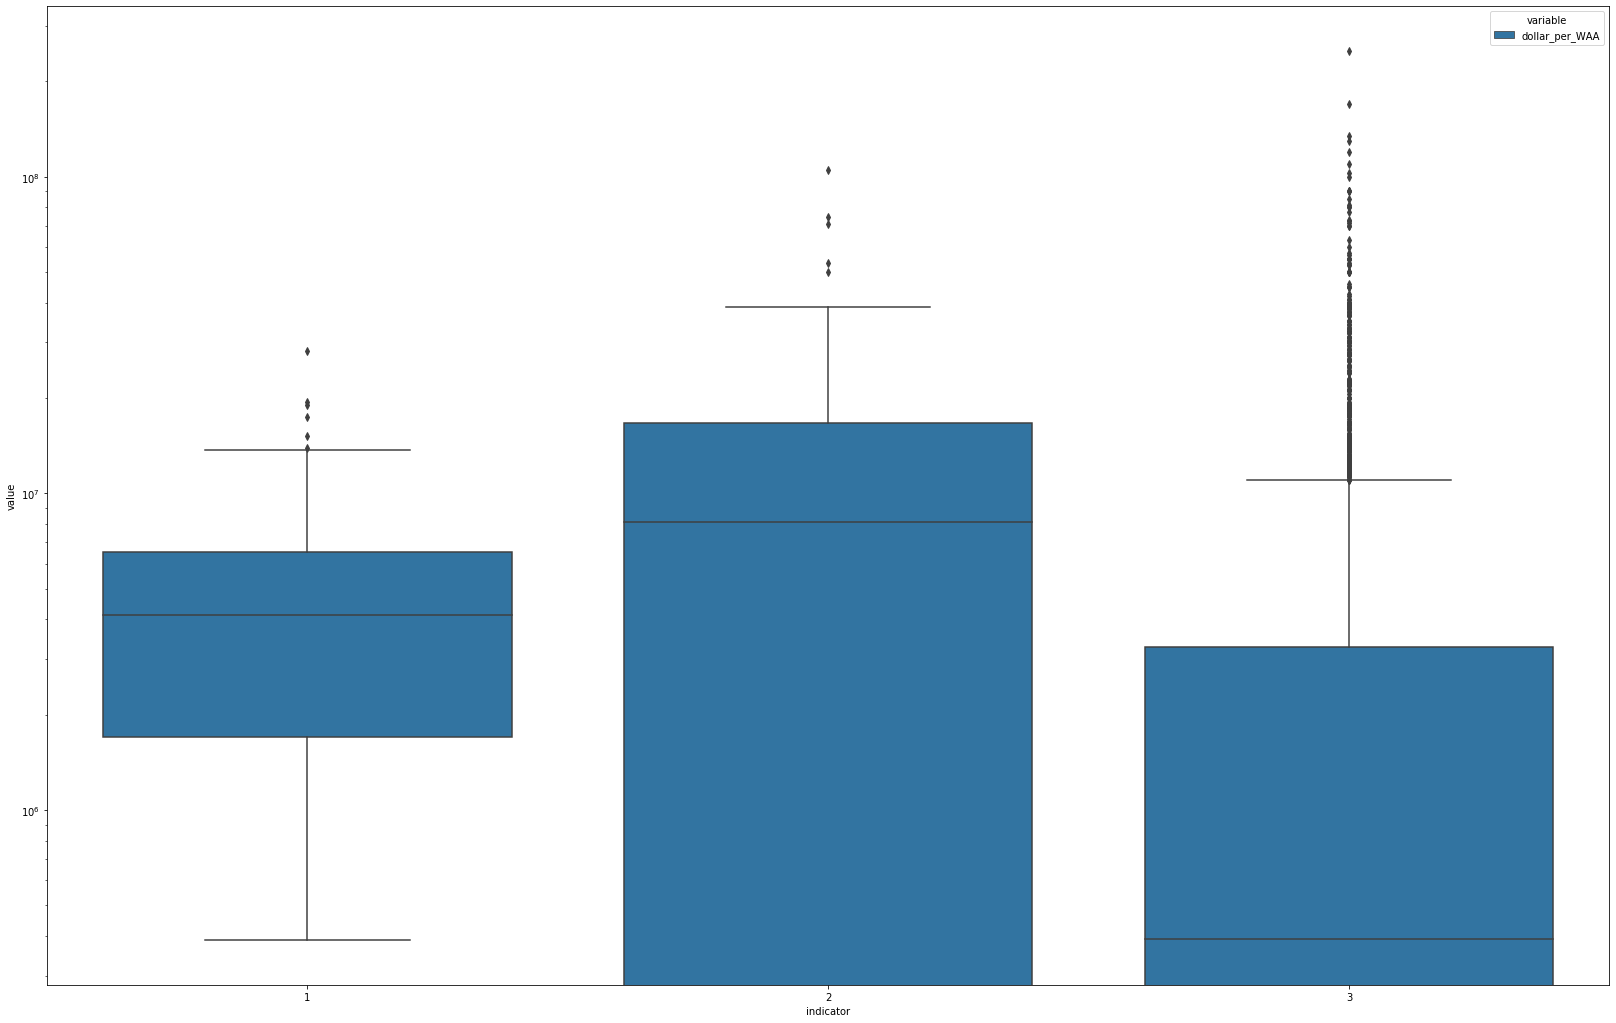

In [160]:
fig, ax  = plt.subplots(1, 1, figsize=(28, 18))
sns.boxplot(x="indicator", y="value", hue="variable", data=melt, ax=ax)
ax.set_yscale("log")
plt.show()

In [161]:
revised_fifty_bats_v3.head()

Name  YearSigned   Tm Position    Salary  Salary(total)  \
2          Mike Trout        2015  LAA       CF  34083333      144500000   
6      Miguel Cabrera        2014  DET       DH  30000000      292000000   
7     Yoenis Cespedes        2017  NYM       OF  29000000      110000000   
9       Albert Pujols        2012  LAA       DH  28000000      240000000   
12  Giancarlo Stanton        2015  NYY       RF  26000000      325000000   

    AVG ANNUAL  Pitcher?  ContractLength  Year  ...  Position/Hit Order  \
2     24083333         0               6  2015  ...                *8/D   
6     29200000         0              10  2014  ...              *3D5/H   
7     27500000         0               4  2017  ...                7/HD   
9     24000000         0              10  2012  ...               *3D/5   
12    25000000         0              13  2015  ...                 9/D   

         Awards  Rbat  RAA  WAA  RAR  WAR  waaWL%  162WL%  dollar_per_WAR  
2   AS,MVP-2,SS    58   68  7.3   92  9.6   0.544   0.543    3.550347e+06  
6      AS,MVP-9    37   23  2.7   47  5.1   0.516   0.515    5.882353e+06  
7             0    12   10  1.0   21  2.0   0.513   0.506    1.450000e+07  
9        MVP-17    27   24  2.4   48  4.8   0.516   0.515    5.833333e+06  
12           AS    21   26  2.7   36  3.7   0.537   0.517    7.027027e+06  

[5 rows x 34 columns]

In [162]:
master_bats_clean_v4[~(master_bats_clean_v4.Name.isin(list(revised_fifty_bats_v3.Name)))]

Name   Age   Tm    G   PA   AB    R    H  HR  RBI  ...  \
5              A.J. Ellis  31.0  LAD  133  505  423   44  114  13   52  ...   
7              A.J. Ellis  33.0  LAD   93  347  283   21   54   3   25  ...   
9              A.J. Ellis  32.0  LAD  115  448  390   43   93  10   52  ...   
10        A.J. Pierzynski  37.0  TOT  102  362  338   25   85   5   37  ...   
11        A.J. Pierzynski  36.0  TEX  134  529  503   48  137  17   70  ...   
12        A.J. Pierzynski  39.0  ATL   81  259  247   15   54   2   23  ...   
13        A.J. Pierzynski  38.0  ATL  113  436  407   38  122   9   49  ...   
14        A.J. Pierzynski  34.0  CHW  129  500  464   38  133   8   48  ...   
15        A.J. Pierzynski  33.0  CHW  128  503  474   43  128   9   56  ...   
16        A.J. Pierzynski  35.0  CHW  135  520  479   68  133  27   77  ...   
17           A.J. Pollock  25.0  ARI  137  482  443   64  119   8   38  ...   
18           A.J. Pollock  30.0  ARI  113  460  413   61  106  21   65  ...   
20           A.J. Pollock  29.0  ARI  112  466  425   73  113  14   49  ...   
21           A.J. Pollock  26.0  ARI   75  287  265   41   80   7   24  ...   
22           A.J. Pollock  31.0  LAD   86  342  308   49   82  15   47  ...   
23           A.J. Pollock  27.0  ARI  157  673  609  111  192  20   76  ...   
26          Aaron Altherr  27.0  PHI  105  285  243   28   44   8   38  ...   
27          Aaron Altherr  26.0  PHI  107  412  372   58  101  19   65  ...   
33            Aaron Hicks  23.0  MIN   81  313  281   37   54   8   27  ...   
35            Aaron Hicks  27.0  NYY   88  361  301   54   80  15   52  ...   
36            Aaron Hicks  26.0  NYY  123  361  327   32   71   8   31  ...   
37            Aaron Hicks  28.0  NYY  137  581  480   90  119  27   79  ...   
39            Aaron Hicks  29.0  NYY   59  255  221   41   52  12   36  ...   
40             Aaron Hill  30.0  ARI  156  668  609   93  184  26   85  ...   
41             Aaron Hill  31.0  ARI   87  362  327   45   95  11   41  ...   
44             Aaron Hill  29.0  TOT  137  571  520   61  128   8   61  ...   
45             Aaron Hill  34.0  TOT  125  429  378   48   99  10   38  ...   
46             Aaron Hill  32.0  ARI  133  541  501   52  122  10   60  ...   
47             Aaron Hill  28.0  TOR  138  580  528   70  108  26   68  ...   
49            Aaron Judge  27.0  NYY  102  447  378   75  103  27   55  ...   
...                   ...   ...  ...  ...  ...  ...  ...  ...  ..  ...  ...   
5049       Yolmer Sanchez  25.0  CHW  141  534  484   63  129  12   59  ...   
5052        Yonder Alonso  31.0  CLE  145  574  516   64  129  23   83  ...   
5053        Yonder Alonso  25.0  SDP  155  619  549   47  150   9   62  ...   
5054        Yonder Alonso  26.0  SDP   97  375  334   34   94   6   45  ...   
5055        Yonder Alonso  28.0  SDP  103  402  354   50  100   5   31  ...   
5057        Yonder Alonso  29.0  OAK  156  532  482   52  122   7   56  ...   
5059        Yonder Alonso  30.0  TOT  142  521  451   72  120  28   67  ...   
5060        Yonder Alonso  27.0  SDP   84  288  267   27   64   7   27  ...   
5062     Yorvit Torrealba  31.0  SDP   95  363  325   31   88   7   37  ...   
5064     Yorvit Torrealba  32.0  TEX  113  419  396   40  108   7   37  ...   
5069         Yuli Gurriel  33.0  HOU  139  564  529   69  158  18   75  ...   
5070         Yuli Gurriel  35.0  HOU  144  612  564   85  168  31  104  ...   
5071         Yuli Gurriel  34.0  HOU  136  573  537   70  156  13   85  ...   
5073        Yunel Escobar  29.0  TOR  145  608  558   58  141   9   51  ...   
5074        Yunel Escobar  33.0  LAA  132  567  517   68  157   5   39  ...   
5075        Yunel Escobar  30.0  TBR  153  578  508   61  130   9   56  ...   
5076        Yunel Escobar  34.0  LAA   89  381  350   43   96   7   31  ...   
5077        Yunel Escobar  27.0  TOT  135  567  497   60  127   4   35  ...   
5078        Yunel Escobar  32.0  WSN  139  591  535   75  168   9   56 

In [163]:
normalized_series = master_team_df_2.groupby("Team Name").max().assign(MAX_PAY = lambda x: x.Payroll).loc[:, ["Team Name","MAX_PAY"]]

C:\Users\Kyle\anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [164]:
#normalized_series.drop("Team Name", axis=1).reset_index()

In [165]:
new_data_frame = master_team_df_2.groupby.assign(lambda x: x.normalized_pay = )[master_team_df_2["Year"] == 2019]

regress_me(new_data_frame, "Payroll", "W",  equations_position=[(200000000, 55), (200000000, 50)])
plt.title("Payroll Vs. Wins in the MLB for the 2010s", fontsize=22)
plt.xlabel("Club Payroll in 10,000,000s", fontsize=16, y=1.05)
plt.ylabel("Club Regular Season Wins", fontsize=16, x=1.05)

SyntaxError: invalid syntax (<ipython-input-165-c1ea33ce92e6>, line 1)

In [166]:
test_df = master_team_df_2.merge(normalized_series.drop("Team Name", axis=1).reset_index(), on="Team Name")

In [167]:
test_df = test_df.assign(normalized = lambda x: x.Payroll / x.MAX_PAY)

In [168]:
test_df.head(20)

Year             Team Name  # Players    Payroll  $ Per Player  \
0   2010  Arizona Diamondbacks         27   71984833       2666105   
1   2011  Arizona Diamondbacks         29   55889833       1927236   
2   2012  Arizona Diamondbacks         30   75908166       2530272   
3   2013  Arizona Diamondbacks         30   90300500       3010017   
4   2014  Arizona Diamondbacks         31  112315500       3623081   
5   2015  Arizona Diamondbacks         34   88187000       2593735   
6   2016  Arizona Diamondbacks         29   98172683       3385265   
7   2017  Arizona Diamondbacks         28   93120200       3325721   
8   2018  Arizona Diamondbacks         30  131965116       4398837   
9   2019  Arizona Diamondbacks         30  123815766       4127192   
10  2010        Atlanta Braves         27   84390334       3125568   
11  2011        Atlanta Braves         28   92202417       3292943   
12  2012        Atlanta Braves         31   93529667       3017086   
13  2013        Atlanta Braves         29   90039583       3104813   
14  2014        Atlanta Braves         32  112865874       3527059   
15  2015        Atlanta Braves         33   97443604       2952836   
16  2016        Atlanta Braves         36   86580792       2405022   
17  2017        Atlanta Braves         32  122603054       3831345   
18  2018        Atlanta Braves         31  118284851       3815640   
19  2019        Atlanta Braves         31  128247089       4137003   

    1 Year Delta  % Change   W   L    PCT   RS   RA  DIFF  DIVISON  WILDCARD  \
0       -1390167    -0.019  65  97  0.401  713  836  -123        0         0   
1      -16095000    -0.224  94  68  0.580  731  662    69        1         0   
2       20018333     0.358  81  81  0.500  734  688    46        0         0   
3       14392334     0.190  81  81  0.500  685  695   -10        0         0   
4       22015000     0.244  64  98  0.395  615  742  -127        0         0   
5      -24128500    -0.215  79  83  0.488  720  713     7        0         0   
6        9985683     0.113  69  93  0.426  752  890  -138        0         0   
7       -5052483    -0.051  93  69  0.574  812  659   153        0         1   
8       38844916     0.417  82  80  0.506  693  644    49        0         0   
9       -8149350    -0.062  85  77  0.525  813  743    70        0         0   
10     -13049000    -0.134  91  71  0.562  738  629   109        0         1   
11       7812083     0.093  89  73  0.549  641  605    36        0         0   
12       1327250     0.014  94  68  0.580  700  600   100        0         1   
13      -3490084    -0.037  96  66  0.593  688  548   140        1         0   
14      22826291     0.254  79  83  0.488  573  597   -24        0         0   
15     -15422270    -0.137  67  95  0.414  573  760  -187        0         0   
16     -10862812    -0.111  68  93  0.422  649  779  -130        0         0   
17      36022262     0.416  72  90  0.444  732  821   -89        0         0   
18      -4318203    -0.035  90  72  0.556  759  657   102        1         0   
19       9962238     0.084  97  65  0.599  855  743   112        1         0   

    WorldSeries    MAX_PAY  normalized  
0             0  131965116    0.545484  
1             0  131965116    0.423520  
2             0  131965116    0.575214  
3             0  131965116    0.684276  
4             0  131965116    0.851100  
5             0  131965116    0.668260  
6             0  131965116    0.743929  
7             0  131965116    0.705643  
8             0  131965116    1.000000  
9             0  131965116    0.938246  
10            0  128247089    0.658029  
11            0  128247089    0.718944  
12            0  128247089    0.729293  
13            0  128247089    0.702079  
14            0  128247089    0.880066  
15            0  128247089    0.759811  
16            0  128247089    0.675109  
17            0  128247089    0.955991  
18            0  128247089    0.922320  
19            0  128247089    1.

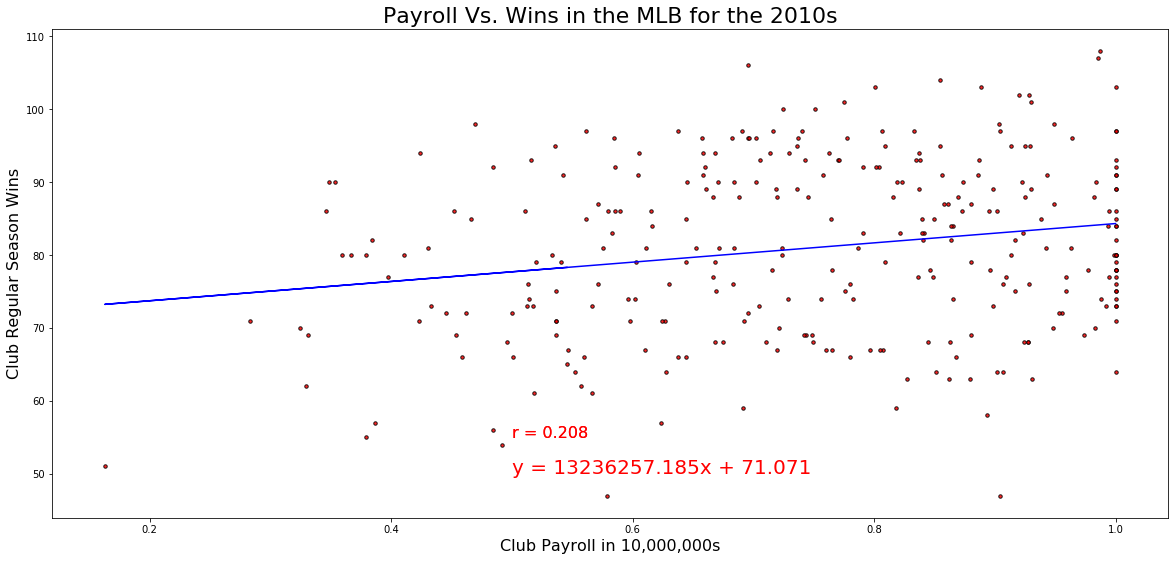

In [388]:
regress_me(test_df, "normalized", "W",  equations_position=[(0.5, 50), (0.5, 55)])
plt.title("Payroll Vs. Wins in the MLB for the 2010s", fontsize=22)
plt.xlabel("Club Payroll in 10,000,000s", fontsize=16, y=1.05)
plt.ylabel("Club Regular Season Wins", fontsize=16, x=1.05)
plt.savefig("UnstandardizedPayrollRegression.png")

In [170]:
def regression(df, x, y, color="red", equations_position=[(0, 40), (-20, 40)], figsize=(15, 8)):
    fig = plt.figure(figsize=figsize)
    plt.scatter(df[x], df[y], c=color, marker="o", s=12, alpha=0.85, edgecolor = "black", figure=fig)
    (slope, intercept, rvalue, _, _) = linregress(df[x],df[y])
    predicted_values = df[x] * slope + intercept
    equation = f"y = {round(slope, 3)}x + {round(intercept, 3)}"
    plt.plot(df[x], predicted_values, "b-")
    plt.annotate(equation, equations_position[0], fontsize=20, color=color)
    plt.annotate(f"r = {round(rvalue, 3)}", equations_position[1], fontsize=16, color=color)
    plt.ylabel(f"{y}")
    plt.xlabel(f"{x}")

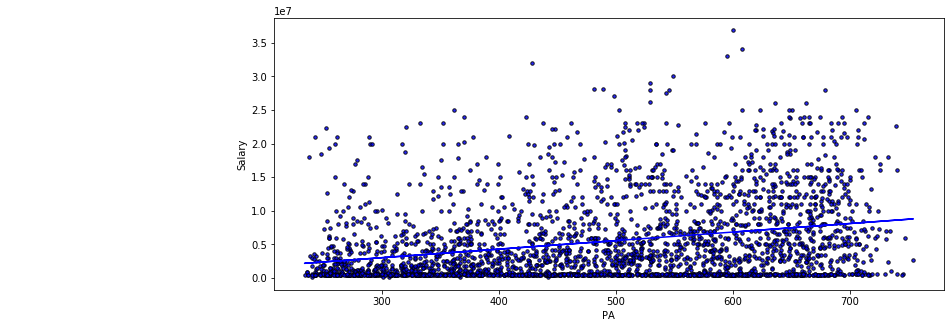

In [171]:
regression(master_bats_clean_v4, "PA", "Salary", "blue", figsize=(12, 5))

In [172]:
master_bats_clean_v4.iloc[:5, 10:]

SO     BA    OBP    SLG    OPS    Year  Rbat  RAA  WAA  RAR  WAR  waaWL%  \
5   107  0.270  0.373  0.414  0.786  2012.0    11   17  1.8   33  3.4   0.514   
7    57  0.191  0.323  0.254  0.577  2014.0   -10   -7 -0.9    4  0.2   0.491   
9    78  0.238  0.318  0.364  0.682  2013.0     2   10  1.1   25  2.5   0.510   
10   54  0.251  0.288  0.337  0.625  2014.0   -12  -18 -1.9   -5 -0.7   0.481   
11   76  0.272  0.297  0.425  0.722  2013.0    -4   -2  0.0   17  1.8   0.498   

    162WL%     Salary       Acquired  dollar_per_WAR  
5    0.511   490000.0  Amateur Draft    1.441176e+05  
7    0.495  3550000.0  Amateur Draft    1.775000e+07  
9    0.507  2000000.0  Amateur Draft    8.000000e+05  
10   0.493  8250000.0    Free Agency   -1.178571e+07  
11   0.499  7500000.0    Free Agency    4.166667e+06

In [173]:
revised_precontract_range_stats_h1.head()

Name  YearRANGE       Tm    G    PA    AB    R    H  HR  RBI  \
0    Jose Bautista  2008-2010  PIT,TOR  402  1511  1275  208  315  82  218   
1        Jason Bay  2009-2011  BOS,NYM  369  1548  1323  210  341  54  223   
2       Ryan Braun  2007-2008      MIL  264  1155  1062  183  320  71  203   
3  Troy Tulowitzki  2008-2010      COL  374  1578  1390  238  408  67  233   
4   Aramis Ramirez  2009-2011      CHC  355  1475  1336  187  382  66  241   

   ...    OPS  Rbat  RAA  WAA  RAR   WAR  waaWL%  162WL%  Salary(total)  \
0  ...  0.852    47   45  4.6   99   9.8   0.511   0.512        6600000   
1  ...  0.803    35   31  3.0   83   8.0   0.508   0.507       34550000   
2  ...  0.937    61   35  3.1   70   6.6   0.513   0.512         455000   
3  ...  0.883    40   93  9.3  142  14.0   0.526   0.522        5250000   
4  ...  0.835    37   -5 -0.8   41   3.8   0.498   0.499       48000000   

   dollar_per_WAR  
0    6.734694e+05  
1    4.318750e+06  
2    6.893939e+04  
3    3.750000e+05  
4    1.263158e+07  

[5 rows x 24 columns]

In [174]:
revised_fifty_bats_v3.head()

Name  YearSigned   Tm Position    Salary  Salary(total)  \
2          Mike Trout        2015  LAA       CF  34083333      144500000   
6      Miguel Cabrera        2014  DET       DH  30000000      292000000   
7     Yoenis Cespedes        2017  NYM       OF  29000000      110000000   
9       Albert Pujols        2012  LAA       DH  28000000      240000000   
12  Giancarlo Stanton        2015  NYY       RF  26000000      325000000   

    AVG ANNUAL  Pitcher?  ContractLength  Year  ...  Position/Hit Order  \
2     24083333         0               6  2015  ...                *8/D   
6     29200000         0              10  2014  ...              *3D5/H   
7     27500000         0               4  2017  ...                7/HD   
9     24000000         0              10  2012  ...               *3D/5   
12    25000000         0              13  2015  ...                 9/D   

         Awards  Rbat  RAA  WAA  RAR  WAR  waaWL%  162WL%  dollar_per_WAR  
2   AS,MVP-2,SS    58   68  7.3   92  9.6   0.544   0.543    3.550347e+06  
6      AS,MVP-9    37   23  2.7   47  5.1   0.516   0.515    5.882353e+06  
7             0    12   10  1.0   21  2.0   0.513   0.506    1.450000e+07  
9        MVP-17    27   24  2.4   48  4.8   0.516   0.515    5.833333e+06  
12           AS    21   26  2.7   36  3.7   0.537   0.517    7.027027e+06  

[5 rows x 34 columns]

In [175]:
revised_fifty_pitch_v3.head()

Name  YearSigned   Tm Position    Salary  Salary(total)  \
0       Max Scherzer        2015  WSH       SP  42142857      210000000   
1  Stephen Strasburg        2017  WSH       SP  36428571      175000000   
3       Zack Greinke        2016  ARI       SP  32421884      206500000   
4        David Price        2016  BOS       SP  31000000      217000000   
5    Clayton Kershaw        2019  LAD       SP  31000000       93000000   

   AVG ANNUAL  Pitcher?  ContractLength    Year  ...  RA9opp  RA9avg   RAA  \
0    30000000         1               7  2015.0  ...    4.20    4.59  42.0   
1    25000000         1               7  2017.0  ...    4.75    5.09  44.0   
3    34416667         1               6  2016.0  ...    4.49    5.07  12.0   
4    31000000         1               7  2016.0  ...    4.47    4.43   7.0   
5    31000000         1               3  2019.0  ...    4.65    3.84  15.0   

   WAA  waaWL%  162WL%    Awards  bin_groups  In_The_Year  dollar_per_WAA  
0  5.1     0.0     0.0  AS,CYA-5      top 10         2019    8.263305e+06  
1  4.9     0.0     0.0  AS,CYA-3      top 10         2019    7.434402e+06  
3  1.2     0.0     0.0        GG      top 10         2019    2.701824e+07  
4  0.8     0.0     0.0         0      top 10         2019    3.875000e+07  
5  1.6     0.0     0.0  AS,CYA-8      top 10         2019    1.937500e+07  

[5 rows x 41 columns]

In [176]:
master_pitch_clean_v4.head()

Name   Age   Tm   W   L   W-L%   ERA   G  GS  GF  ...  RA9opp  RAA  \
3  A.J. Burnett  34.0  NYY  11  11  0.500  5.15  33  32   0  ...    4.45  -18   
4  A.J. Burnett  35.0  PIT  16  10  0.615  3.51  31  31   0  ...    4.19    9   
5  A.J. Burnett  38.0  PIT   9   7  0.563  3.18  26  26   0  ...    4.15   12   
6  A.J. Burnett  36.0  PIT  10  11  0.476  3.30  30  30   0  ...    4.17    4   
7  A.J. Burnett  33.0  NYY  10  15  0.400  5.26  33  33   0  ...    4.43  -26   

   WAA  WAR  RAR  waaWL%  162WL%      Salary     Acquired  dollar_per_WAA  
3 -1.8  0.0    2   0.445   0.489  16500000.0  Free Agency   -9.166667e+06  
4  1.0  2.6   27   0.532   0.506  16500000.0       Traded    1.650000e+07  
5  1.3  2.6   25   0.551   0.508   8500000.0  Free Agency    6.538462e+06  
6  0.5  2.0   20   0.516   0.503  16500000.0       Traded    3.300000e+07  
7 -2.5 -0.7   -6   0.423   0.484  16500000.0  Free Agency   -6.600000e+06  

[5 rows x 34 columns]

In [177]:
revised_precontract_range_stats_p1.head()

Name  YearRANGE               Tm   W   L   W-L%   ERA   G  GS  \
0       Cliff Lee  2008-2010  CLE,PHI,SEA,TEX  48  25  0.658  2.98  93  93   
1    Zack Greinke  2013-2015              LAD  51  15  0.773  2.30  92  92   
2      Yu Darvish  2014-2017          TEX,LAD  27  24  0.529  3.48  70  70   
3  Anibal Sanchez  2010-2012      FLA,MIA,DET  30  34  0.469  3.70  95  95   
4    Tim Lincecum  2013-2015              SFG  29  27  0.518  4.46  80  73   

   GF  ...   SO9   RA9  RA9opp  RA9avg    RAA   WAA  waaWL%  162WL%  \
0   0  ...   7.2  3.24    4.62    4.66  100.0  11.1   0.619   0.517   
1   0  ...   8.3  2.48    4.10    4.04  105.0  12.8   0.639   0.527   
2   0  ...  10.9  3.76    4.52    4.96   56.0   6.2   0.589   0.511   
3   0  ...   8.1  4.12    4.34    4.84   45.0   5.0   0.553   0.509   
4   3  ...   8.1  4.71    4.03    3.77  -45.0  -4.8   0.440   0.488   

   Salary(total)  dollar_per_WAA  
0     19000000.0    1.711712e+06  
1     70000000.0    5.468750e+06  
2     31000000.0    5.000000e+06  
3     12950000.0    2.590000e+06  
4     57000000.0   -1.187500e+07  

[5 rows x 31 columns]

In [178]:
master_team_df_2

Year              Team Name  # Players    Payroll  $ Per Player  \
0    2010   Arizona Diamondbacks         27   71984833       2666105   
1    2010         Atlanta Braves         27   84390334       3125568   
2    2010      Baltimore Orioles         26   75412500       2900481   
3    2010         Boston Red Sox         31  173759833       5605156   
4    2010           Chicago Cubs         28  143359000       5119964   
5    2010      Chicago White Sox         28  104280000       3724286   
6    2010        Cincinnati Reds         29   76876500       2650914   
7    2010      Cleveland Indians         29   61203967       2110482   
8    2010       Colorado Rockies         31   84618333       2729624   
9    2010         Detroit Tigers         29  134062066       4622830   
10   2010          Miami Marlins         27   47429719       1756656   
11   2010         Houston Astros         29   91605500       3158810   
12   2010     Kansas City Royals         33   76260210       2310915   
13   2010     Los Angeles Angels         31  120613867       3890770   
14   2010    Los Angeles Dodgers         30  107000283       3566676   
15   2010      Milwaukee Brewers         30   82258000       2741933   
16   2010        Minnesota Twins         30   98159167       3271972   
17   2010          New York Mets         30  127098096       4236603   
18   2010       New York Yankees         28  212105889       7575210   
19   2010      Oakland Athletics         31   54457400       1756690   
20   2010  Philadelphia Phillies         30  144178379       4805946   
21   2010     Pittsburgh Pirates         28   38668000       1381000   
22   2010       San Diego Padres         26   37799300       1453819   
23   2010   San Francisco Giants         28   97023833       3465137   
24   2010       Seattle Mariners         28   89443333       3194405   
25   2010    St. Louis Cardinals         25   94220500       3768820   
26   2010         Tampa Bay Rays         32   74487608       2327738   
27   2010          Texas Rangers         30   58490000       1949667   
28   2010      Toronto Blue Jays         33   76189000       2308758   
29   2010   Washington Nationals         32   65275000       2039844   
..    ...                    ...        ...        ...           ...   
270  2019   Arizona Diamondbacks         30  123815766       4127192   
271  2019         Atlanta Braves         31  128247089       4137003   
272  2019      Baltimore Orioles         29   80814882       2786720   
273  2019         Boston Red Sox         31  236171428       7618433   
274  2019           Chicago Cubs         32  214246988       6695218   
275  2019      Chicago White Sox         28   88902000       3175071   
276  2019        Cincinnati Reds         29  127218214       4386835   
277  2019      Cleveland Indians         29  119575034       4123277   
278  2019       Colorado Rockies         27  145248500       5379574   
279  2019         Detroit Tigers         30  115673500       3855783   
280  2019         Houston Astros         27  158043000       5853444   
281  2019     Kansas City Royals         30   96470066       3215669   
282  2019     Los Angeles Angels         33  158878583       4814503   
283  2019    Los Angeles Dodgers         35  196279677       5607991   
284  2019          Miami Marlins         28   71903319       2567976   
285  2019      Milwaukee Brewers         31  123430400       3981626   
286  2019        Minnesota Twins         30  119651933       3988398   
287  2019          New York Mets         30  157052231       5235074   
288  2019       New York Yankees         32  203897446       6371795   
289  2019      Oakland Athletics         33   89135833       2701086   
290  2019  Philadelphia Phillies         27  140611962       5207850   
291  2019     Pittsburgh Pirates         33   74808000       2266909   
292  2019       San Diego Padres         39  102804100       2636003   
293  2019   San Francisco Giants         26  

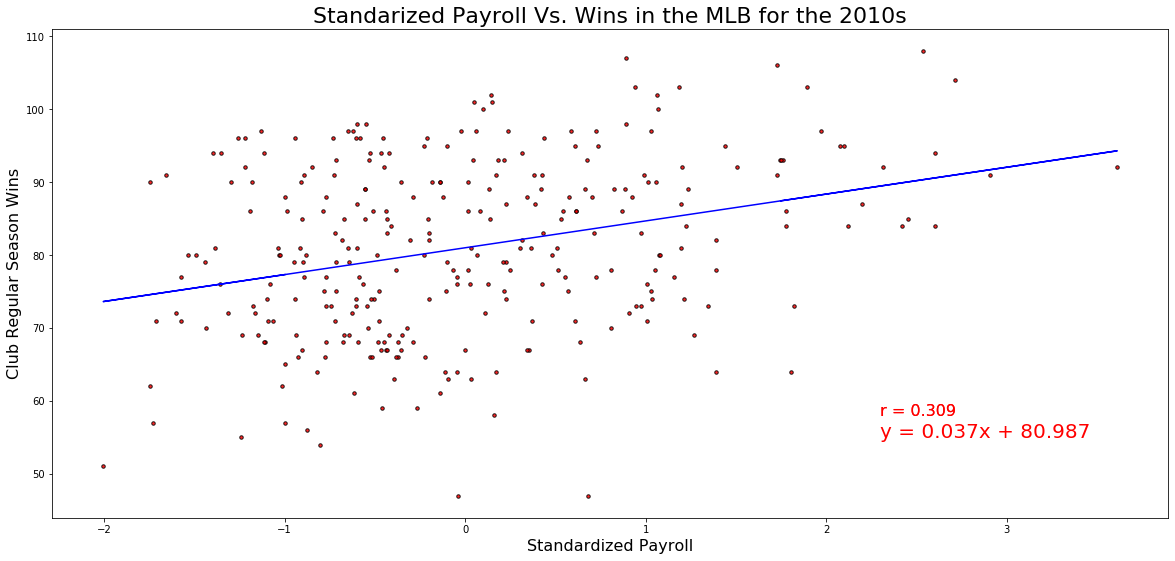

In [387]:
mu = test_df.Payroll.mean()
sigma = test_df.Payroll.std()
## ["Team Name"] == "Oakland Athletics"]
test_df_24 = test_df.assign(standardized = lambda x: (x.Payroll - mu) / sigma)
regress_me(test_df_24, "standardized", "W",  equations_position=[(2.3, 55), (2.3, 58)], units=.01)
plt.title("Standarized Payroll Vs. Wins in the MLB for the 2010s", fontsize=22)
plt.xlabel("Standardized Payroll", fontsize=16, y=1.05)
plt.ylabel("Club Regular Season Wins", fontsize=16, x=1.05)
plt.savefig("StandardizedPayrollRegression.png")

In [180]:
test_df.Payroll.mean() / test_df.Payroll.std()

2.577699189357876

Text(1.05, 0.5, 'Club Regular Season Wins')

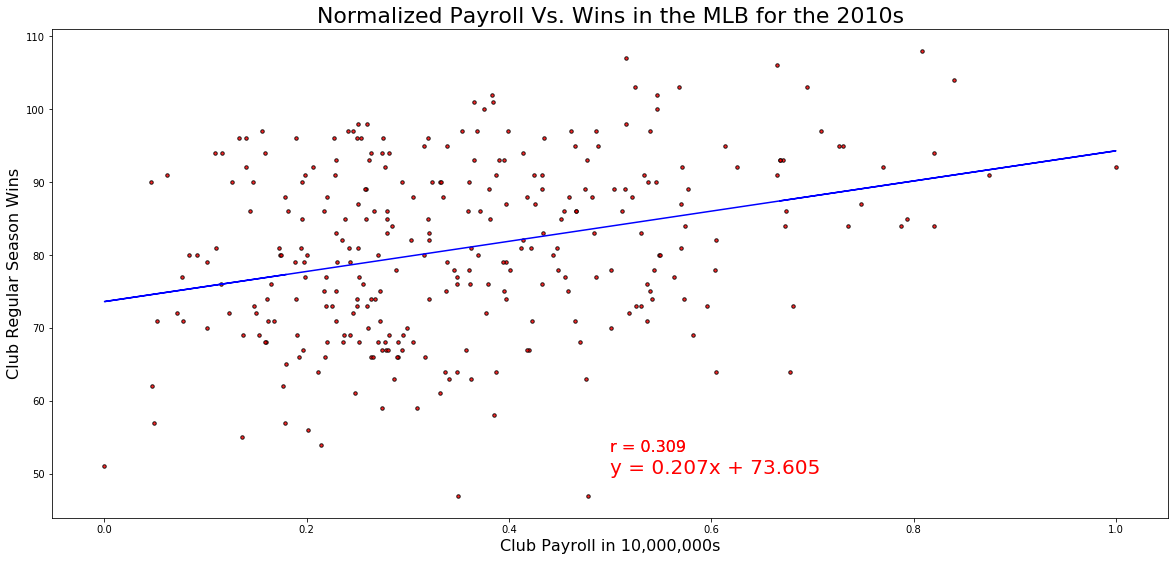

In [181]:
mini = test_df.Payroll.min()
maxi = test_df.Payroll.max()

test_df_24 = test_df.assign(normalized_B = lambda x: (x.Payroll - mini) / (maxi - mini))
regress_me(test_df_24, "normalized_B", "W",  equations_position=[(0.5, 50), (0.5, 53)], units=.01)
plt.title("Normalized Payroll Vs. Wins in the MLB for the 2010s", fontsize=22)
plt.xlabel("Club Payroll in 10,000,000s", fontsize=16, y=1.05)
plt.ylabel("Club Regular Season Wins", fontsize=16, x=1.05)

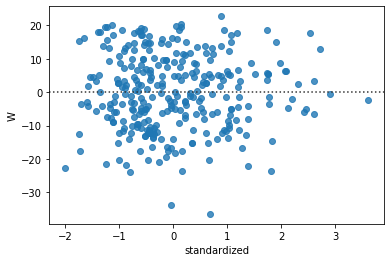

In [182]:
test_df_24 = test_df.assign(standardized = lambda x: (x.Payroll - mu) / sigma)
sns.residplot("standardized", "W", data=test_df_24)

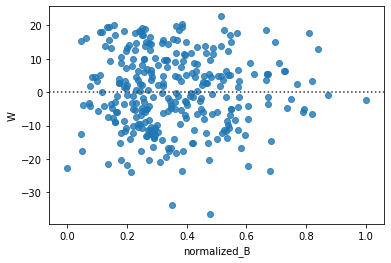

In [183]:
test_df_24 = test_df.assign(normalized_B = lambda x: (x.Payroll - mini) / (maxi - mini))
sns.residplot("normalized_B", "W", data=test_df_24)

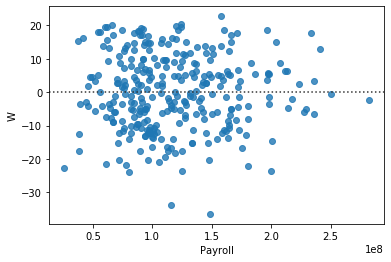

In [184]:
sns.residplot("Payroll", "W", data=test_df_24)

In [185]:
test_df.head()

Year             Team Name  # Players    Payroll  $ Per Player  \
0  2010  Arizona Diamondbacks         27   71984833       2666105   
1  2011  Arizona Diamondbacks         29   55889833       1927236   
2  2012  Arizona Diamondbacks         30   75908166       2530272   
3  2013  Arizona Diamondbacks         30   90300500       3010017   
4  2014  Arizona Diamondbacks         31  112315500       3623081   

   1 Year Delta  % Change   W   L    PCT   RS   RA  DIFF  DIVISON  WILDCARD  \
0      -1390167    -0.019  65  97  0.401  713  836  -123        0         0   
1     -16095000    -0.224  94  68  0.580  731  662    69        1         0   
2      20018333     0.358  81  81  0.500  734  688    46        0         0   
3      14392334     0.190  81  81  0.500  685  695   -10        0         0   
4      22015000     0.244  64  98  0.395  615  742  -127        0         0   

   WorldSeries    MAX_PAY  normalized  
0            0  131965116    0.545484  
1            0  131965116    0.423520  
2            0  131965116    0.575214  
3            0  131965116    0.684276  
4            0  131965116    0.851100

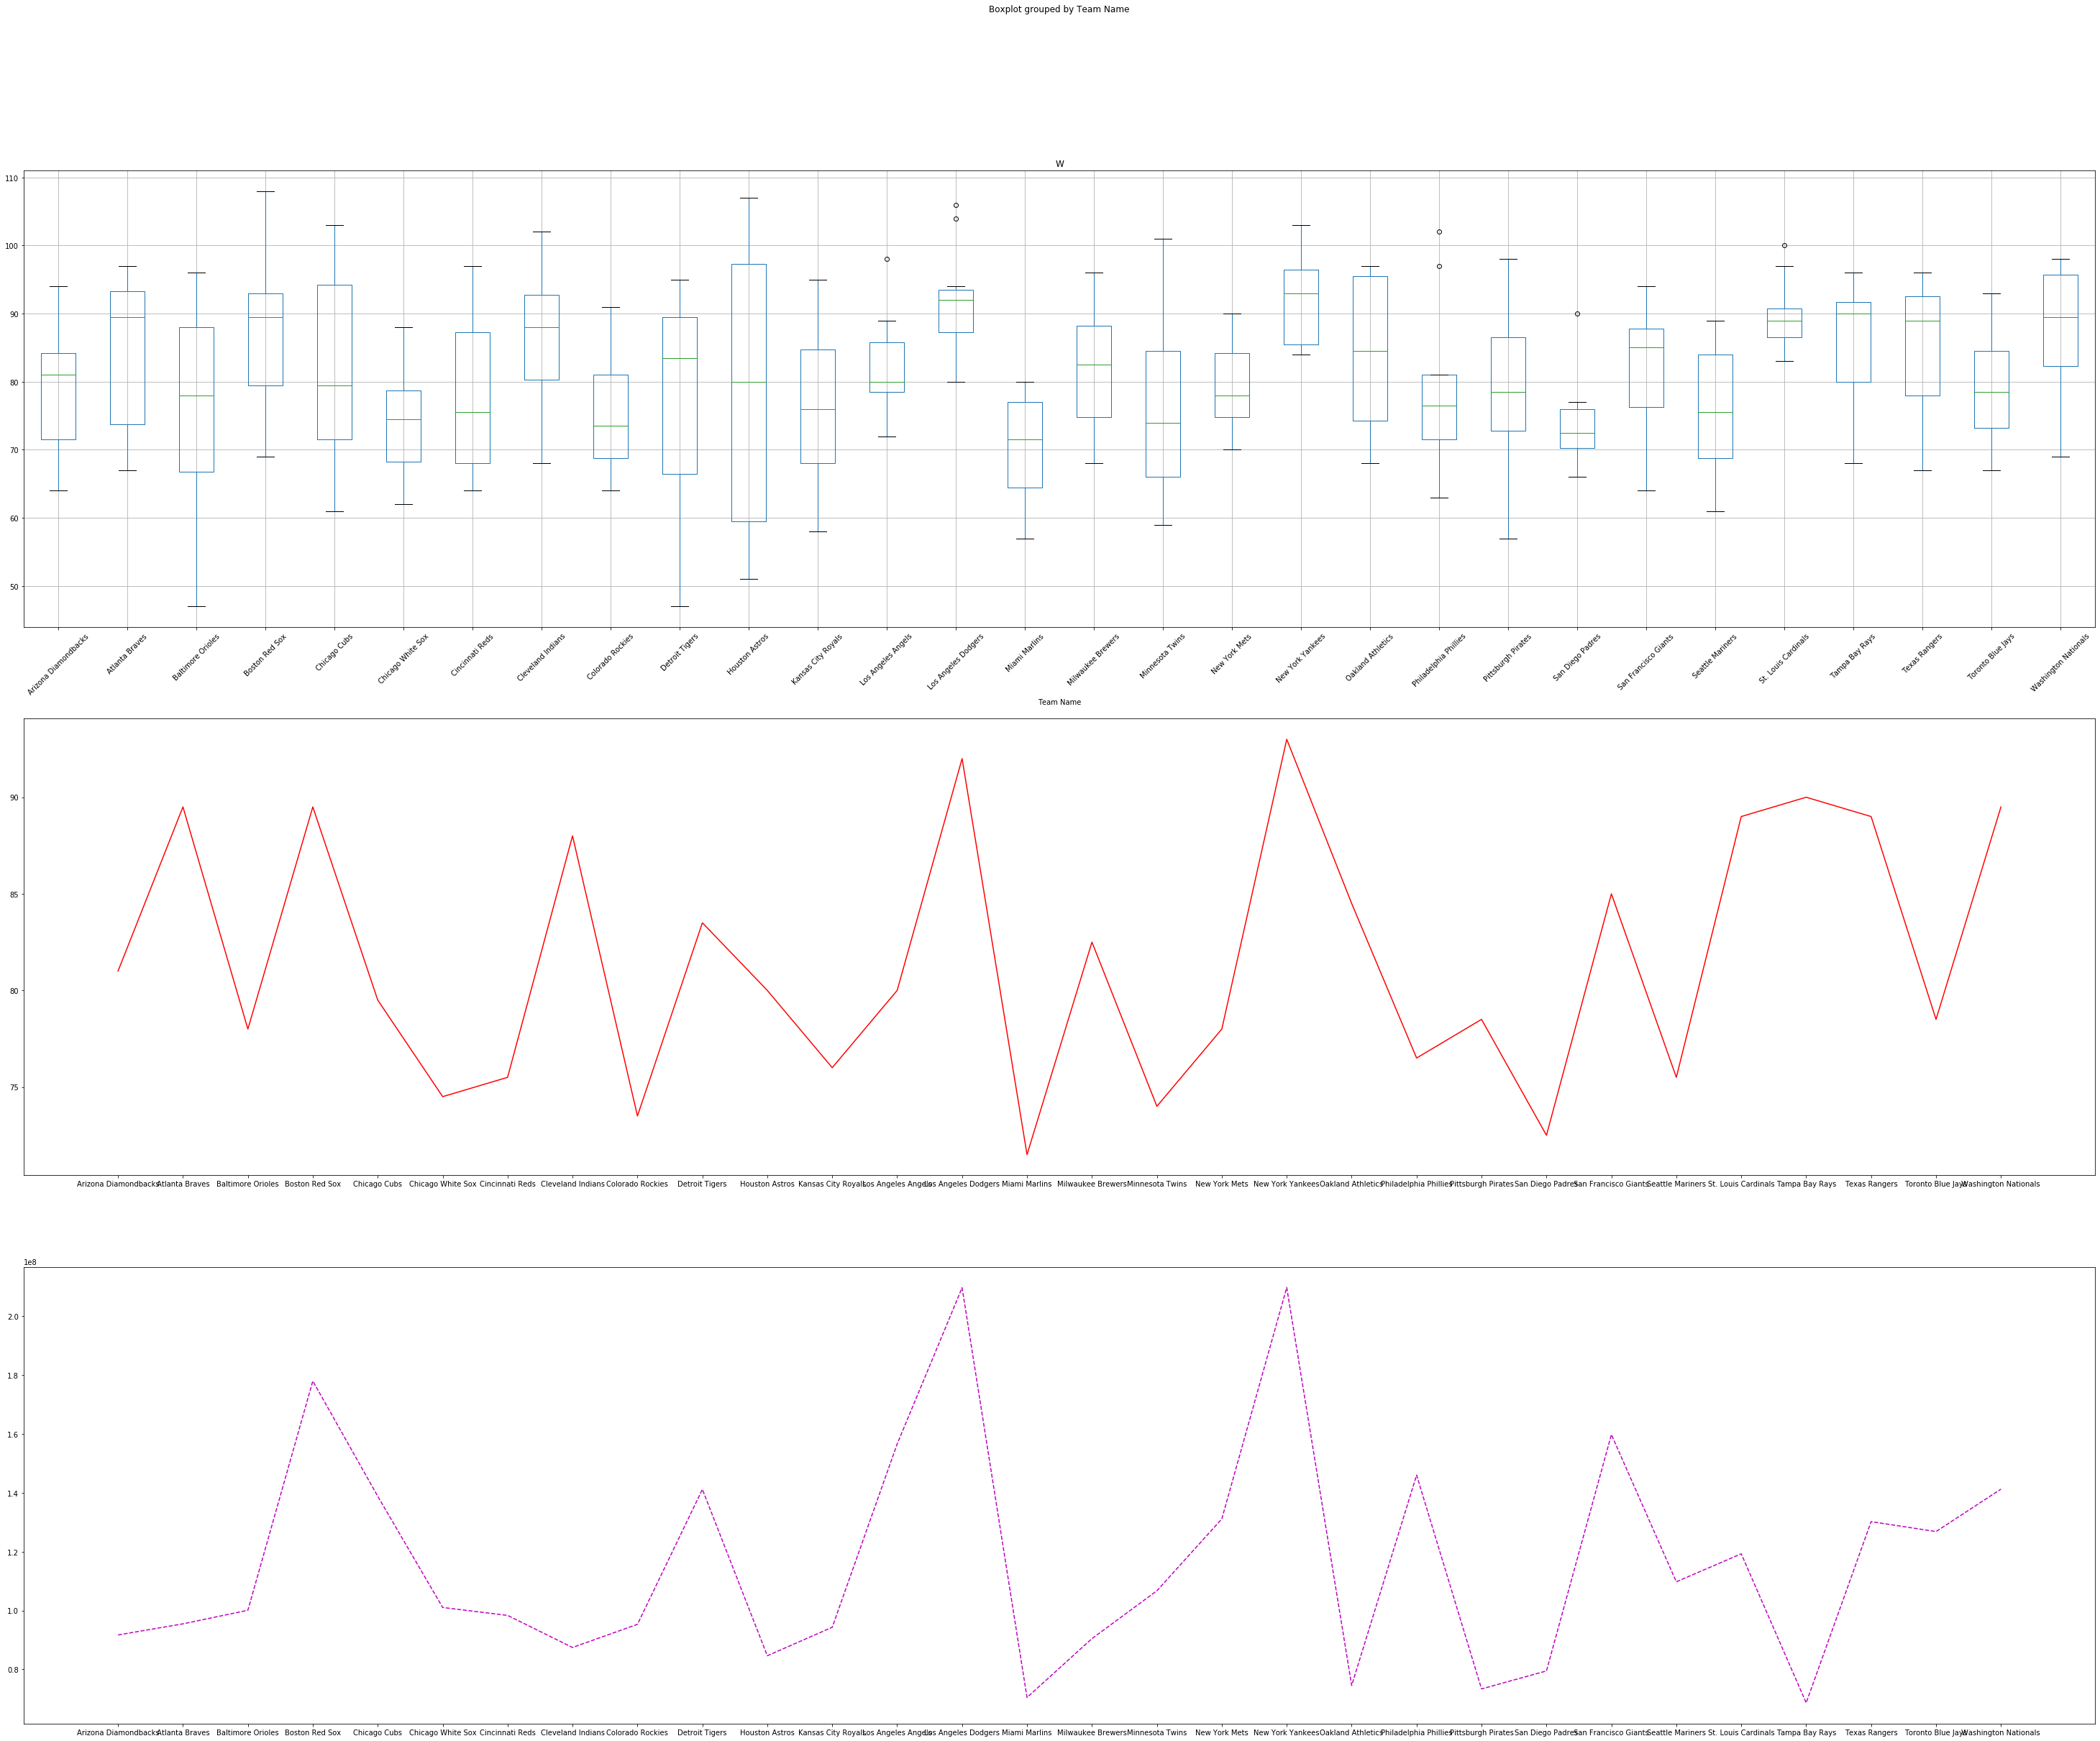

In [186]:
fig, axes = plt.subplots(3, 1, figsize=(50, 40))
test_df.boxplot("W", by="Team Name", ax=axes[0], rot=45)
ax1 = axes[1]
ax1.plot(test_df.groupby("Team Name").median()["W"], "r-")
ax2 = axes[2]
ax2.plot(test_df.groupby("Team Name").median()["Payroll"], "m--")

Text(1.05, 0.5, 'Club Regular Season Wins')

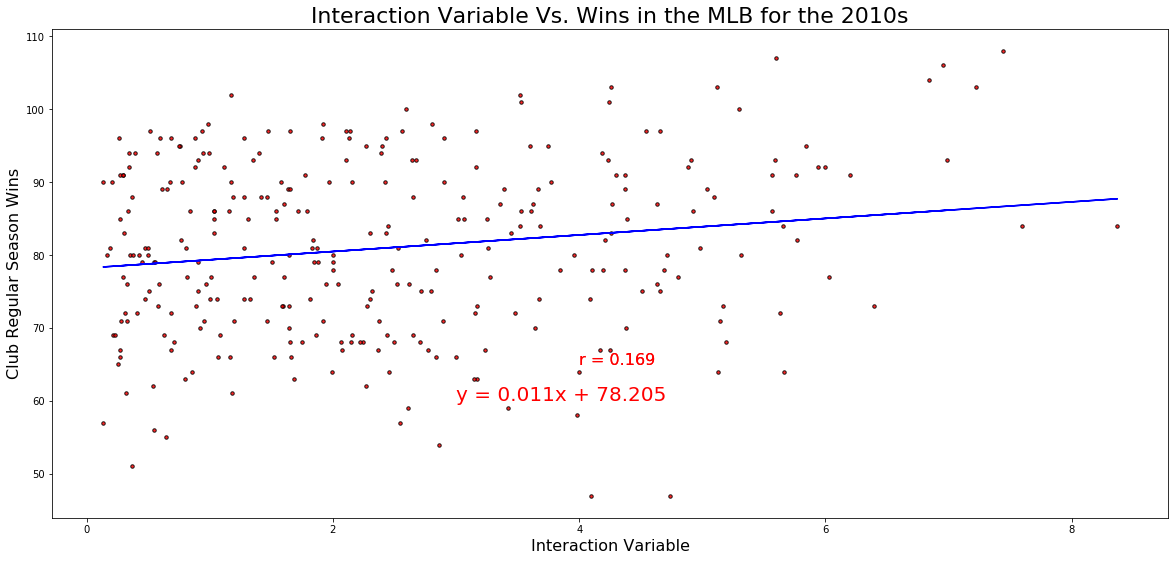

In [187]:
mini = test_df.Payroll.min()
maxi = test_df.Payroll.max()

test_df_24 = test_df.assign(YearxPayroll = lambda x: (x.Payroll * (x.Year - 2009)) / maxi)
regress_me(test_df_24, "YearxPayroll", "W",  equations_position=[(3,60), (4,65)], units=.01)
plt.title("Interaction Variable Vs. Wins in the MLB for the 2010s", fontsize=22)
plt.xlabel("Interaction Variable", fontsize=16, y=1.05)
plt.ylabel("Club Regular Season Wins", fontsize=16, x=1.05)

Text(1.05, 0.5, 'Club Regular Season Wins')

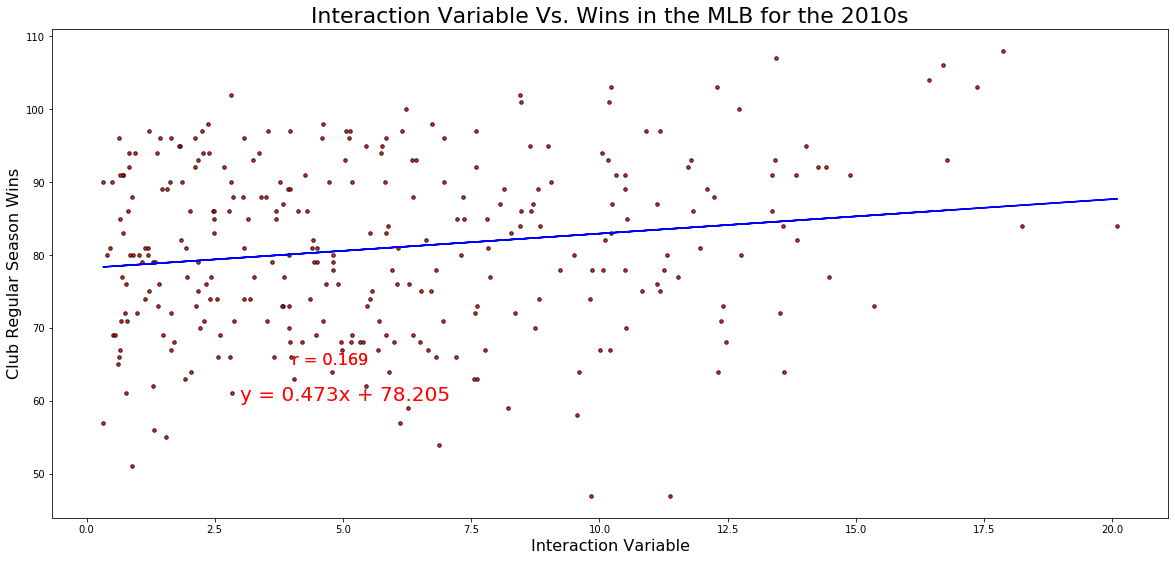

In [188]:
mini = test_df.Payroll.min()
maxi = test_df.Payroll.max()

test_df_24 = test_df.assign(YearxPayroll = lambda x: (x.Payroll * (x.Year - 2009)) / mu)
#test_df_24.head()
regress_me(test_df_24, "YearxPayroll", "W",  equations_position=[(3, 60), (4, 65)], units=1)
plt.title("Interaction Variable Vs. Wins in the MLB for the 2010s", fontsize=22)
plt.xlabel("Interaction Variable", fontsize=16, y=1.05)
plt.ylabel("Club Regular Season Wins", fontsize=16, x=1.05)

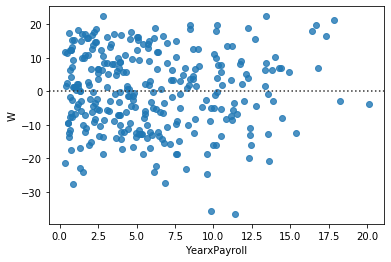

In [189]:
test_df_24 = test_df.assign(YearxPayroll = lambda x: (x.Payroll * (x.Year - 2009)) / mu)
sns.residplot("YearxPayroll", "W" ,data=test_df_24)

In [190]:
test_df_24.head()

Year             Team Name  # Players    Payroll  $ Per Player  \
0  2010  Arizona Diamondbacks         27   71984833       2666105   
1  2011  Arizona Diamondbacks         29   55889833       1927236   
2  2012  Arizona Diamondbacks         30   75908166       2530272   
3  2013  Arizona Diamondbacks         30   90300500       3010017   
4  2014  Arizona Diamondbacks         31  112315500       3623081   

   1 Year Delta  % Change   W   L    PCT   RS   RA  DIFF  DIVISON  WILDCARD  \
0      -1390167    -0.019  65  97  0.401  713  836  -123        0         0   
1     -16095000    -0.224  94  68  0.580  731  662    69        1         0   
2      20018333     0.358  81  81  0.500  734  688    46        0         0   
3      14392334     0.190  81  81  0.500  685  695   -10        0         0   
4      22015000     0.244  64  98  0.395  615  742  -127        0         0   

   WorldSeries    MAX_PAY  normalized  YearxPayroll  
0            0  131965116    0.545484      0.612559  
1            0  131965116    0.423520      0.951195  
2            0  131965116    0.575214      1.937834  
3            0  131965116    0.684276      3.073669  
4            0  131965116    0.851100      4.778775

In [191]:
test_df_24 = test_df_24.assign(normalized_B = lambda x: (x.Payroll - mini) / (maxi - mini))
test_df_24 = test_df_24.assign(standardized = lambda x: (x.Payroll - mu) / sigma)
test_df_24 = test_df_24.assign(YearxPayroll = lambda x: (x.Payroll * (x.Year - 2009)) / mu)
test_df_24.head()

Year             Team Name  # Players    Payroll  $ Per Player  \
0  2010  Arizona Diamondbacks         27   71984833       2666105   
1  2011  Arizona Diamondbacks         29   55889833       1927236   
2  2012  Arizona Diamondbacks         30   75908166       2530272   
3  2013  Arizona Diamondbacks         30   90300500       3010017   
4  2014  Arizona Diamondbacks         31  112315500       3623081   

   1 Year Delta  % Change   W   L    PCT  ...   RA  DIFF  DIVISON  WILDCARD  \
0      -1390167    -0.019  65  97  0.401  ...  836  -123        0         0   
1     -16095000    -0.224  94  68  0.580  ...  662    69        1         0   
2      20018333     0.358  81  81  0.500  ...  688    46        0         0   
3      14392334     0.190  81  81  0.500  ...  695   -10        0         0   
4      22015000     0.244  64  98  0.395  ...  742  -127        0         0   

   WorldSeries    MAX_PAY  normalized  YearxPayroll  normalized_B  \
0            0  131965116    0.545484      0.612559      0.179167   
1            0  131965116    0.423520      0.951195      0.116313   
2            0  131965116    0.575214      1.937834      0.194488   
3            0  131965116    0.684276      3.073669      0.250693   
4            0  131965116    0.851100      4.778775      0.336666   

   standardized  
0     -0.998706  
1     -1.351751  
2     -0.912648  
3     -0.596951  
4     -0.114050  

[5 rows x 21 columns]

In [192]:
_2010_salary = test_df_24["Payroll"]

test_df_24 = test_df_24.assign(standardized = lambda x: (x.Payroll - mu) / sigma)

In [193]:
temp_df = test_df_24.groupby("Team Name").first()["Payroll"].reset_index()
test_df_24 = test_df_24.merge(temp_df, on="Team Name")

In [194]:
test_df_24 = test_df_24.assign(InteractionTeamly = lambda x: (x.Payroll_x * (x.Year - 2009)) / x.Payroll_y)

Text(1.05, 0.5, 'Club Regular Season Wins')

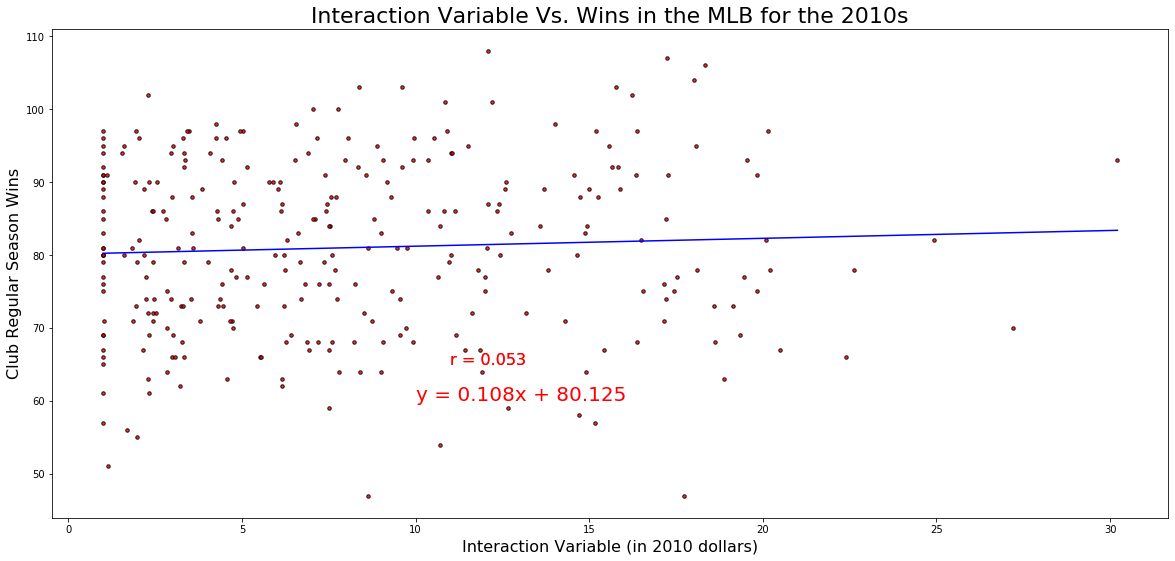

In [195]:
regress_me(test_df_24, "InteractionTeamly", "W",  equations_position=[(10, 60), (11, 65)], units=1)
plt.title("Interaction Variable Vs. Wins in the MLB for the 2010s", fontsize=22)
plt.xlabel("Interaction Variable (in 2010 dollars)", fontsize=16, y=1.05)
plt.ylabel("Club Regular Season Wins", fontsize=16, x=1.05)

In [196]:
#test_df.groupby("Team Name").median().reset_index()

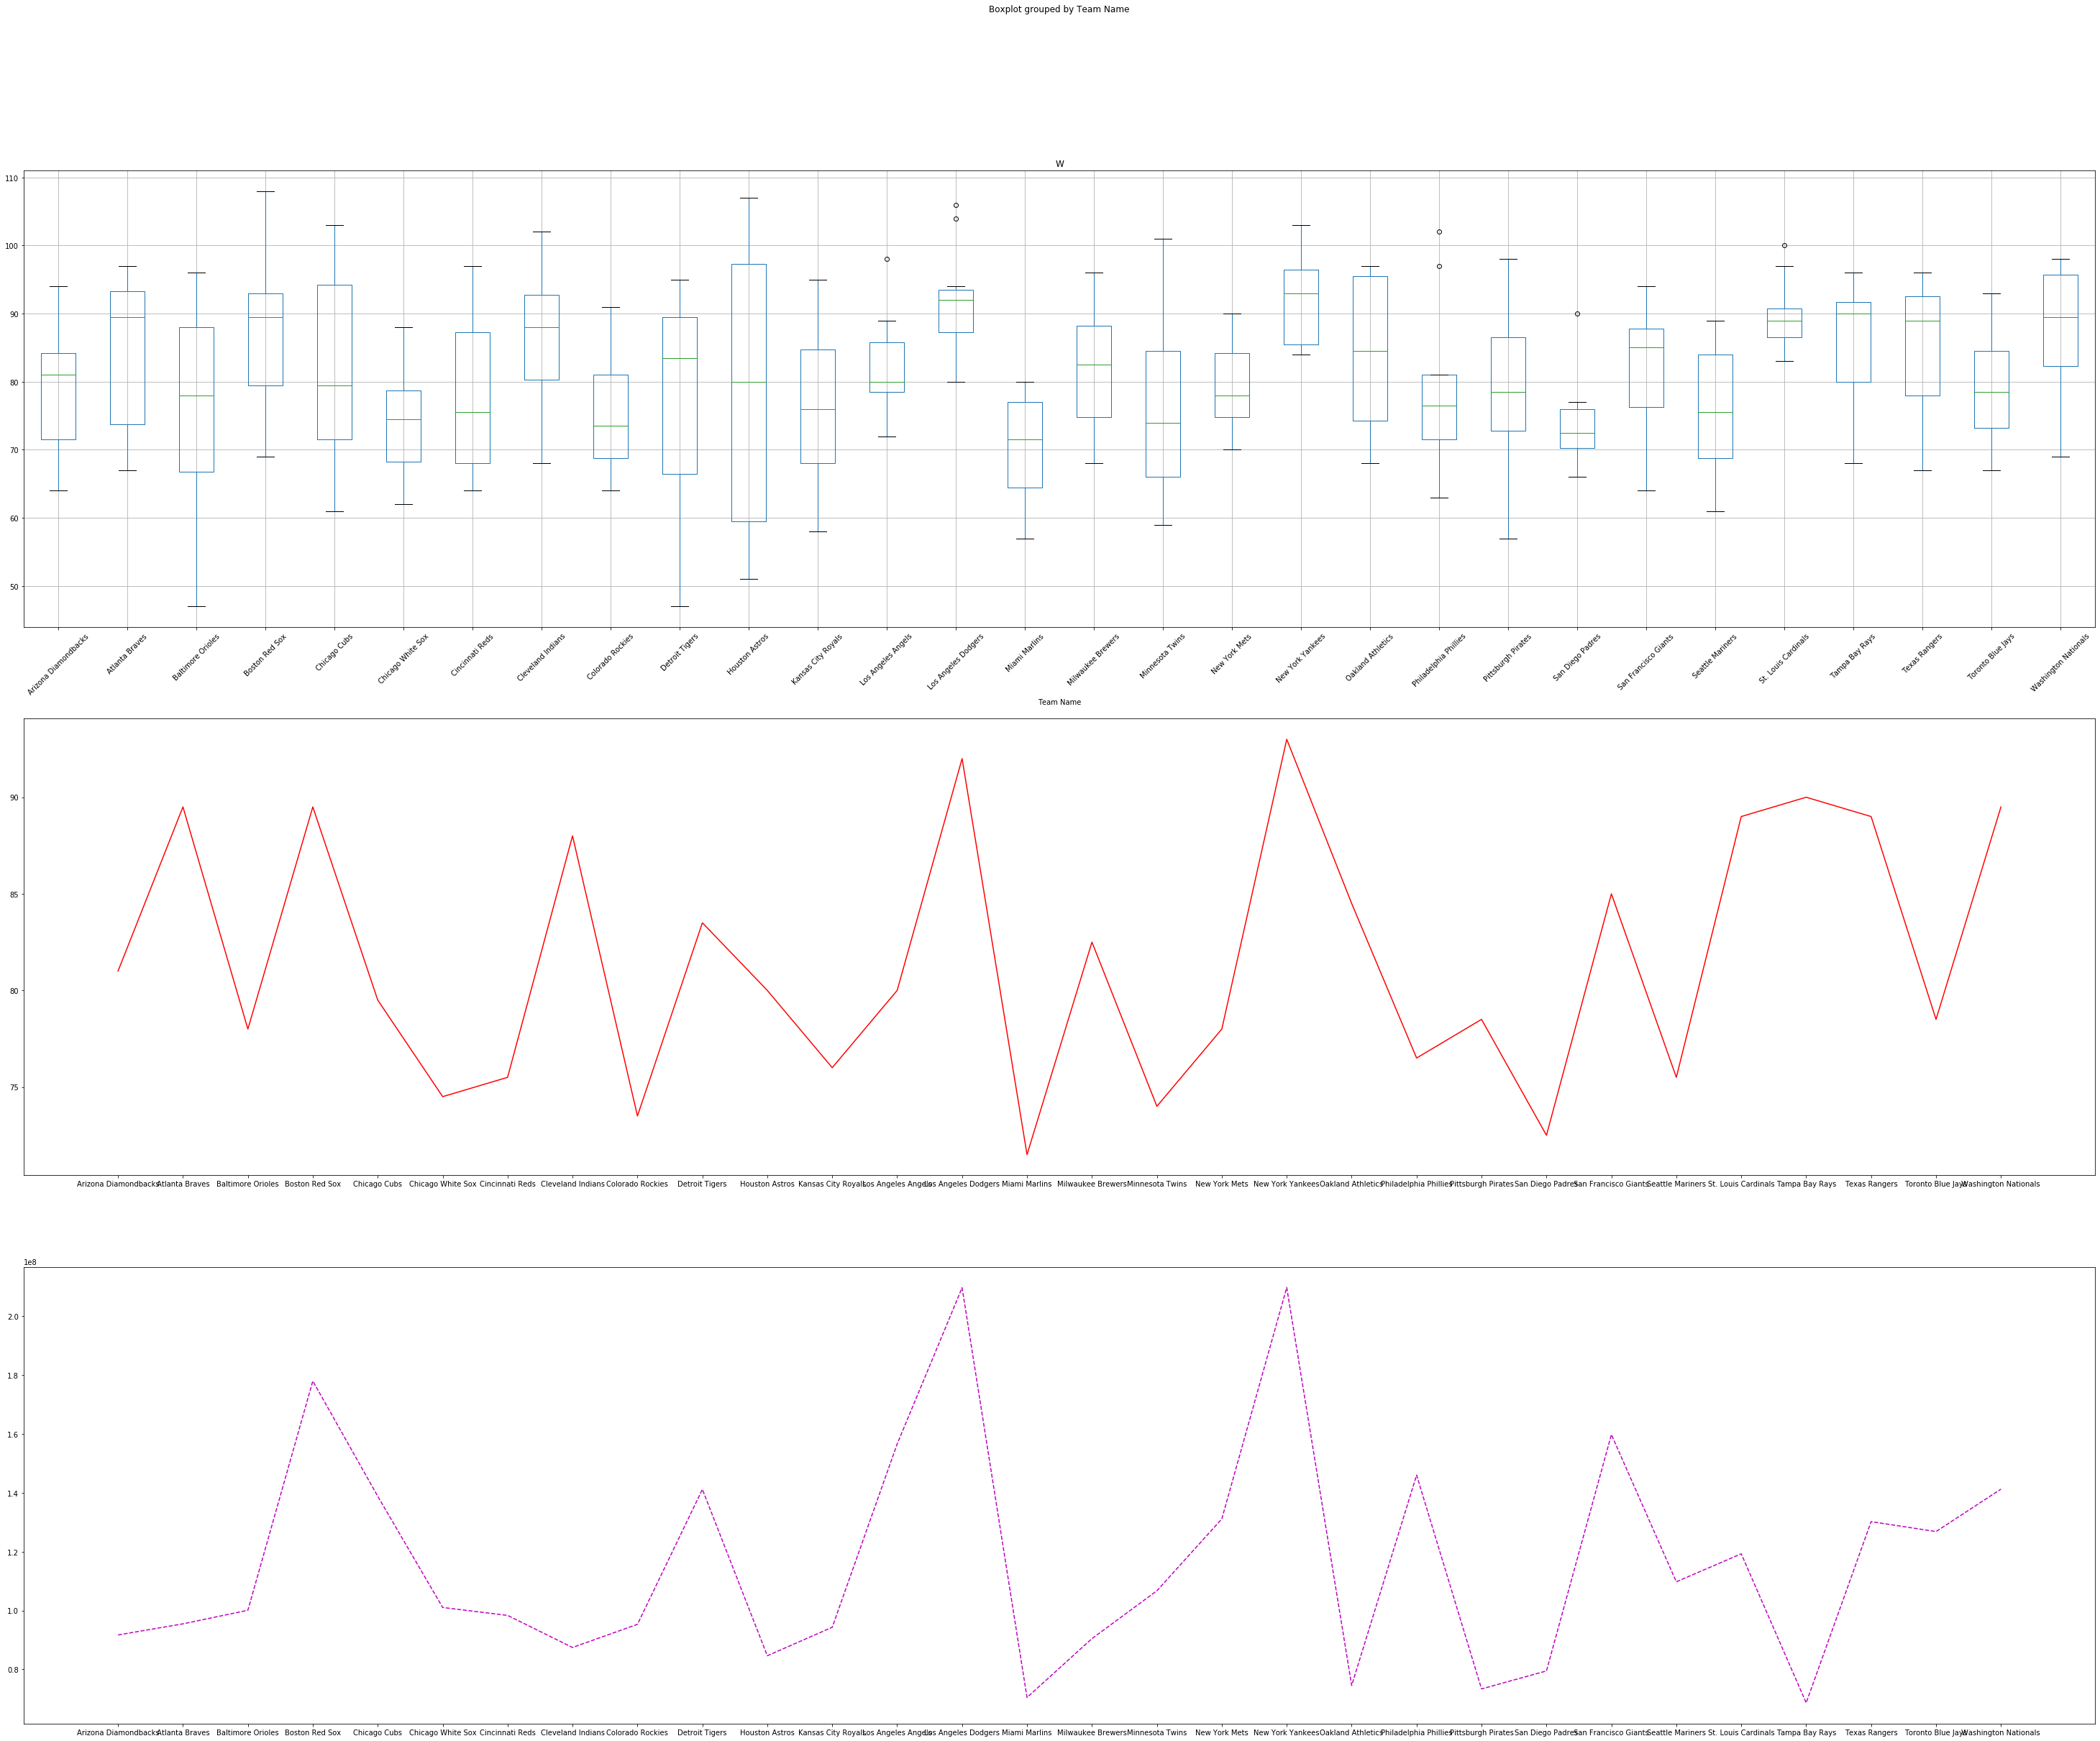

In [197]:
fig, axes = plt.subplots(3, 1, figsize=(50, 40))
test_df.boxplot("W", by="Team Name", ax=axes[0], rot=45)
ax1 = axes[1]
ax1.plot(test_df.groupby("Team Name").median().reset_index()["Team Name"],test_df.groupby("Team Name").median().reset_index()["W"], "r-")
ax2 = axes[2]
ax2.plot(test_df.groupby("Team Name").median().reset_index()["Team Name"],test_df.groupby("Team Name").median().reset_index()["Payroll"], "m--")

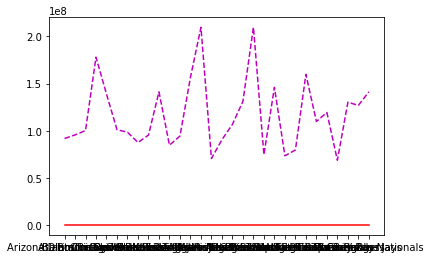

In [198]:
test_df.boxplot("W", by="Team Name", ax=axes[0], rot=45)
plt.plot(test_df.groupby("Team Name").median().reset_index()["Team Name"],test_df.groupby("Team Name").median().reset_index()["W"], "r-")
plt.plot(test_df.groupby("Team Name").median().reset_index()["Team Name"],test_df.groupby("Team Name").median().reset_index()["Payroll"], "m--")

In [199]:
test_df = test_df.assign(payroll_millions = lambda x: x.Payroll / 1000000)
test_df.head()

Year             Team Name  # Players    Payroll  $ Per Player  \
0  2010  Arizona Diamondbacks         27   71984833       2666105   
1  2011  Arizona Diamondbacks         29   55889833       1927236   
2  2012  Arizona Diamondbacks         30   75908166       2530272   
3  2013  Arizona Diamondbacks         30   90300500       3010017   
4  2014  Arizona Diamondbacks         31  112315500       3623081   

   1 Year Delta  % Change   W   L    PCT   RS   RA  DIFF  DIVISON  WILDCARD  \
0      -1390167    -0.019  65  97  0.401  713  836  -123        0         0   
1     -16095000    -0.224  94  68  0.580  731  662    69        1         0   
2      20018333     0.358  81  81  0.500  734  688    46        0         0   
3      14392334     0.190  81  81  0.500  685  695   -10        0         0   
4      22015000     0.244  64  98  0.395  615  742  -127        0         0   

   WorldSeries    MAX_PAY  normalized  payroll_millions  
0            0  131965116    0.545484         71.984833  
1            0  131965116    0.423520         55.889833  
2            0  131965116    0.575214         75.908166  
3            0  131965116    0.684276         90.300500  
4            0  131965116    0.851100        112.315500

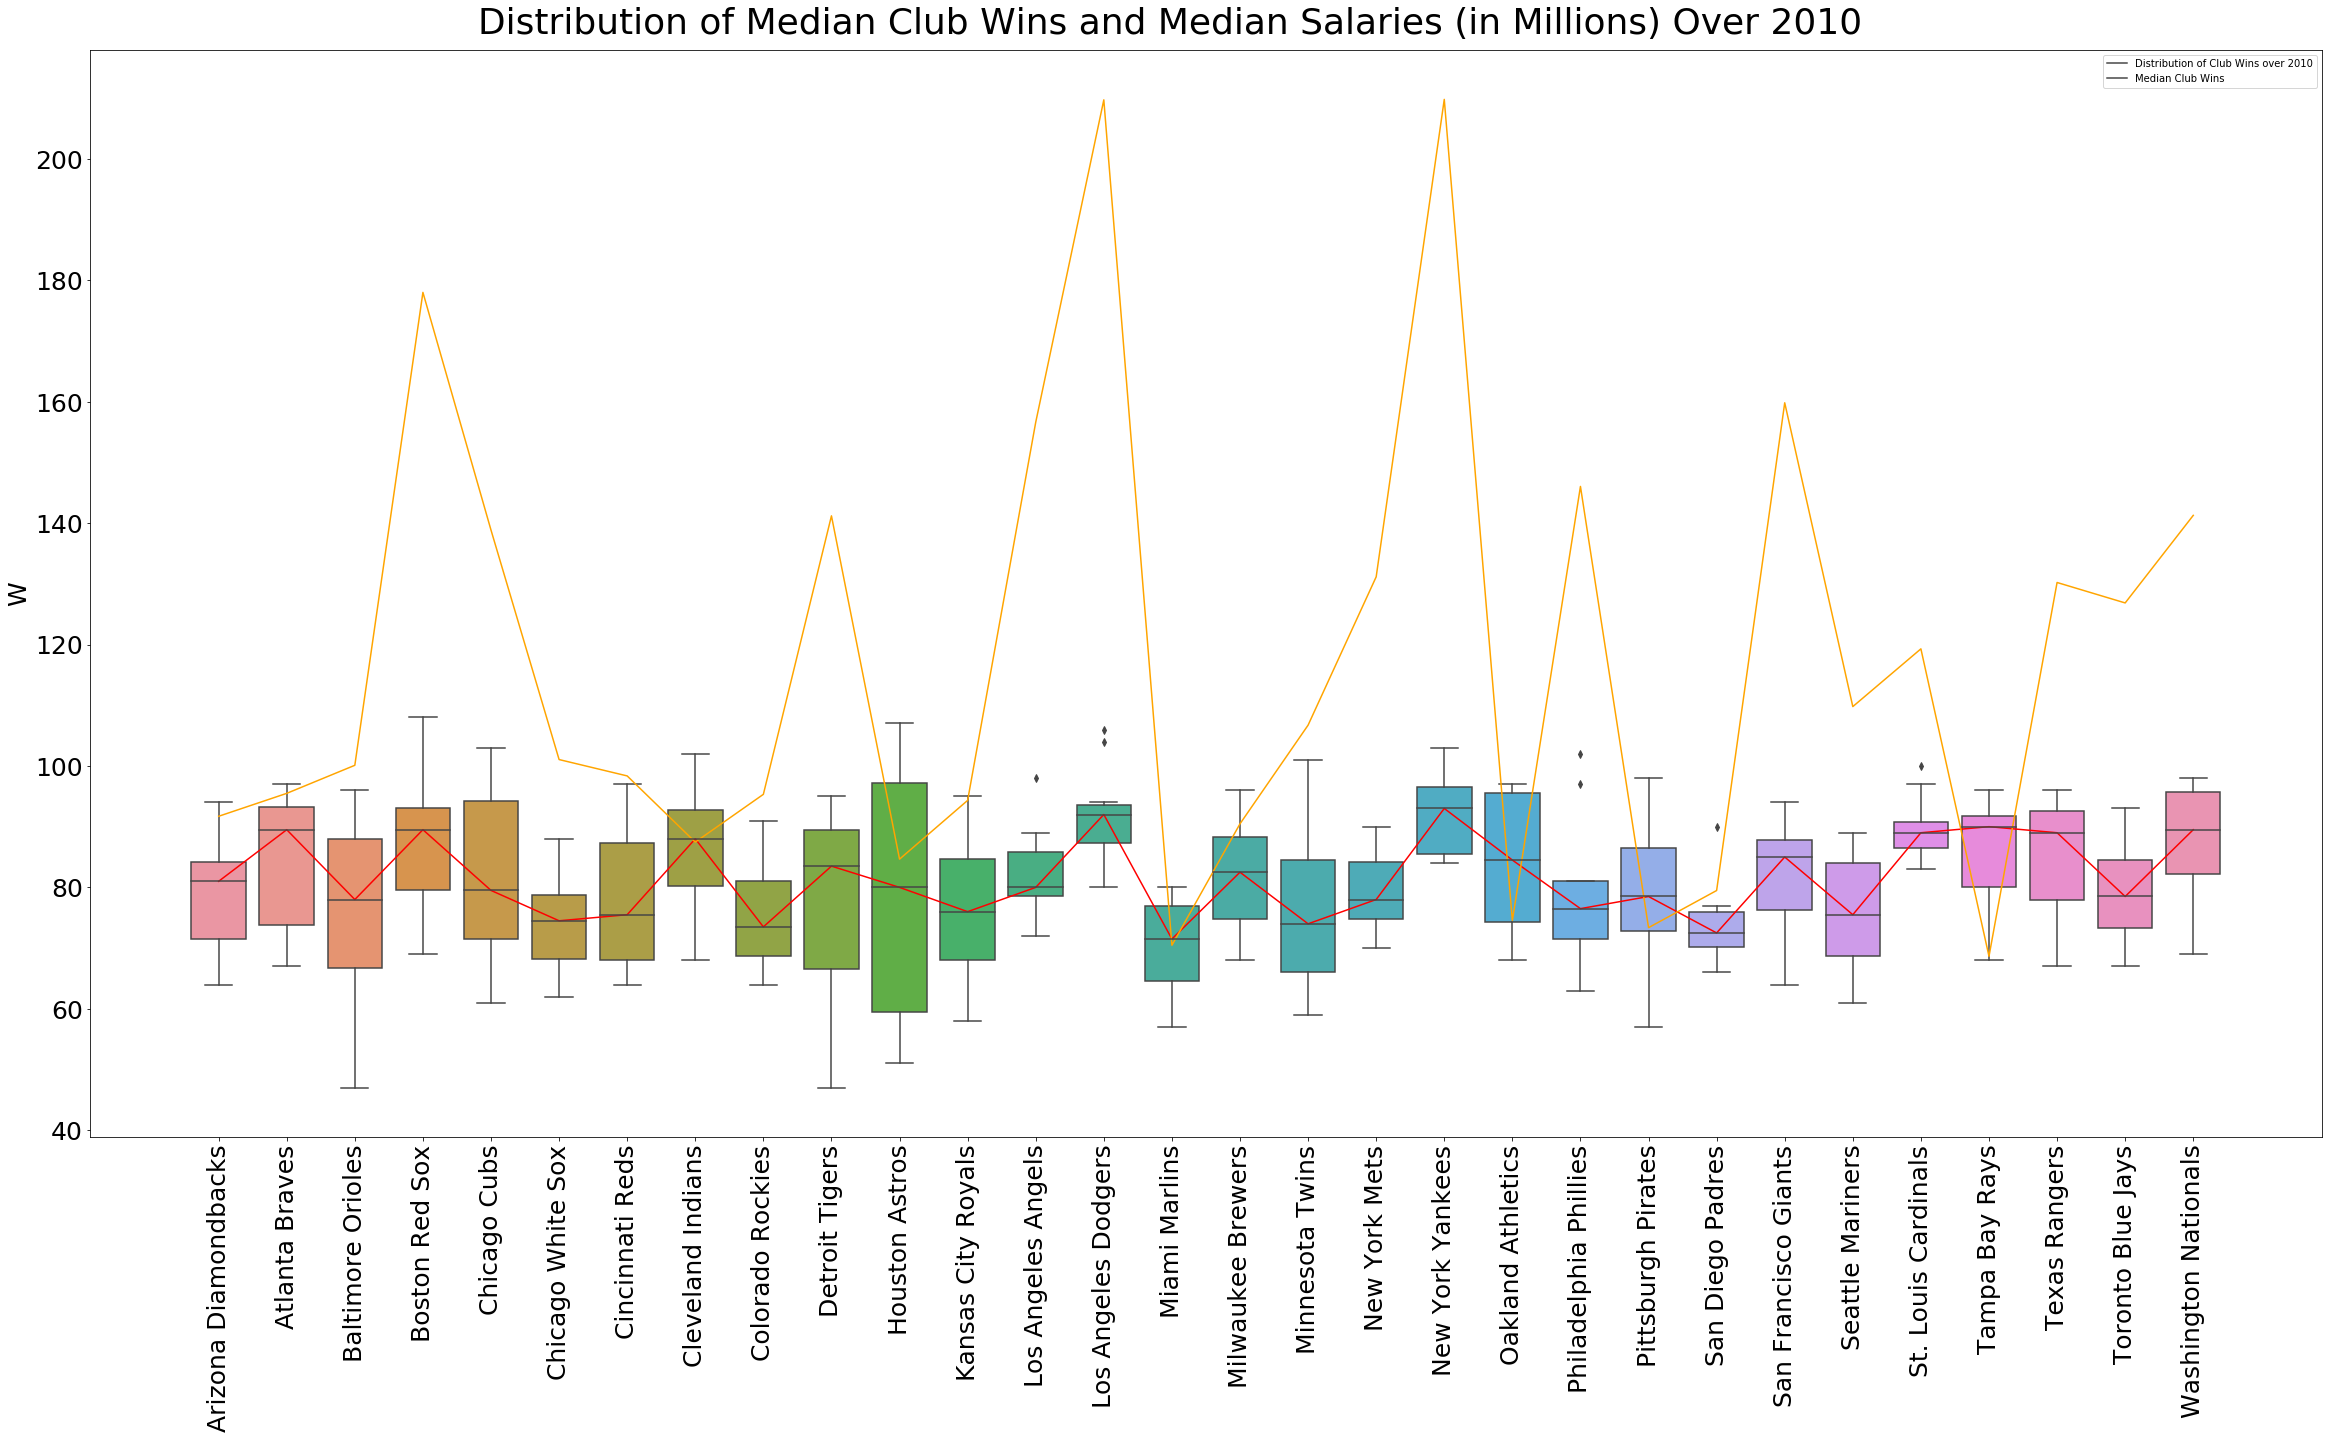

In [411]:
fig,ax=plt.subplots(figsize=(40,20))
mx=(test_df.groupby("Team Name").median().reset_index().sort_values("Team Name")["W"])
mx2=(test_df.groupby("Team Name").median()["payroll_millions"])
sns.boxplot(y='W',x='Team Name',data=test_df.sort_values("Team Name"),ax=ax)
sns.lineplot(y=mx.values,x=mx.index,ax=ax, markers=True, dashes=True, color="red")
sns.lineplot(y=mx2.values,x=mx2.index,ax=ax, markers=True, dashes=True, color="orange")
plt.xticks(rotation=90, fontsize=25)
plt.yticks(fontsize=25)
plt.legend(["Distribution of Club Wins over 2010", "Median Club Wins"])
plt.suptitle("Distribution of Median Club Wins and Median Salaries (in Millions) Over 2010", y=0.91, fontsize=36)
plt.ylabel("W", fontsize=25)
plt.xlabel("")
plt.savefig("MedianWinsAndSalaries3.png")
plt.show()

In [201]:
g.rename({"team": "TEAM"}, axis="columns", inplace=True)

NameError: name 'g' is not defined

In [202]:
g.TEAM.values

NameError: name 'g' is not defined

In [203]:
test_df["W"].median()

81.0

In [204]:
master_top50.head()

NAME  YearSigned TEAM POS    SALARY        YEARS  \
RANK                                                                  
1          Max Scherzer        2015  WSH  SP  42142857  7 (2015-21)   
2     Stephen Strasburg        2017  WSH  SP  36428571  7 (2017-23)   
3            Mike Trout        2015  LAA  CF  34083333  6 (2015-20)   
4          Zack Greinke        2016  ARI  SP  32421884  6 (2016-21)   
5           David Price        2016  BOS  SP  31000000  7 (2016-22)   

      TOTAL VALUE  AVG ANNUAL  Pitcher?  YearSigned.1  ...  gmLI  WAAadj  \
RANK                                                   ...                 
1       210000000    30000000         1          2015  ...   0.0    -0.2   
2       175000000    25000000         1          2017  ...   0.0    -0.1   
3       144500000    24083333         0          2015  ...   0.0     0.0   
4       206500000    34416667         1          2016  ...   0.0    -0.1   
5       217000000    31000000         1          2016  ...   0.0    -0.1   

      WAR.1 RAR.1 waaWL%.1  162WL%.1    Salary.1  Awards.3  bin_groups  \
RANK                                                                     
1       6.9  62.0    0.654     0.531  17142000.0  AS,CYA-5      top 10   
2       6.4  60.0    0.676     0.530  18333334.0  AS,CYA-3      top 10   
3       0.0   0.0    0.000     0.000         0.0         0      top 10   
4       2.5  24.0    0.548     0.508  34000000.0        GG      top 10   
5       2.9  30.0    0.522     0.505  30000000.0         0      top 10   

      In_The_Year  
RANK               
1            2019  
2            2019  
3            2019  
4            2019  
5            2019  

[5 rows x 126 columns]

In [205]:
master_top50.groupby("In_The_Year").sum()["SALARY"]

In_The_Year
2010     816963076
2011     820410054
2012     866994746
2013     956803966
2014     938737381
2015     978167185
2016    1103571467
2017    1135031612
2018    1178277431
2019    1189934785
Name: SALARY, dtype: int64

In [206]:
test_df_24.groupby("Year").sum()["Payroll_x"]

Year
2010    2802710450
2011    2883061022
2012    3020685005
2013    3199751632
2014    3462860102
2015    3763754588
2016    3908727327
2017    4097190028
2018    4070456019
2019    4045286774
Name: Payroll_x, dtype: int64

In [207]:
master_top_50_and_overall = master_top50.groupby("In_The_Year").sum()["SALARY"].reset_index()
master_top_50_and_overall.rename({"In_The_Year": "Year"}, axis="columns", inplace=True)
master_top_50_and_overall = master_top_50_and_overall.merge(test_df_24.groupby("Year").sum()["Payroll_x"].reset_index())

In [208]:
master_top_50_and_overall

Year      SALARY   Payroll_x
0  2010   816963076  2802710450
1  2011   820410054  2883061022
2  2012   866994746  3020685005
3  2013   956803966  3199751632
4  2014   938737381  3462860102
5  2015   978167185  3763754588
6  2016  1103571467  3908727327
7  2017  1135031612  4097190028
8  2018  1178277431  4070456019
9  2019  1189934785  4045286774

In [209]:
master_top_50_and_overall = master_top_50_and_overall.assign(top_50_percentage = lambda x: x.SALARY / x.Payroll_x)
percentage_change_df = (master_top_50_and_overall.pct_change().drop(["Year", "top_50_percentage"], axis=1)*100).assign(diff = lambda x: x.SALARY - x.Payroll_x)

In [210]:
percentage_change_df

SALARY  Payroll_x       diff
0        NaN        NaN        NaN
1   0.421926   2.866888  -2.444962
2   5.678221   4.773537   0.904684
3  10.358681   5.928014   4.430667
4  -1.888222   8.222778 -10.111000
5   4.200302   8.689190  -4.488888
6  12.820332   3.851812   8.968520
7   2.850757   4.821587  -1.970830
8   3.810098  -0.652496   4.462594
9   0.989356  -0.618340   1.607695

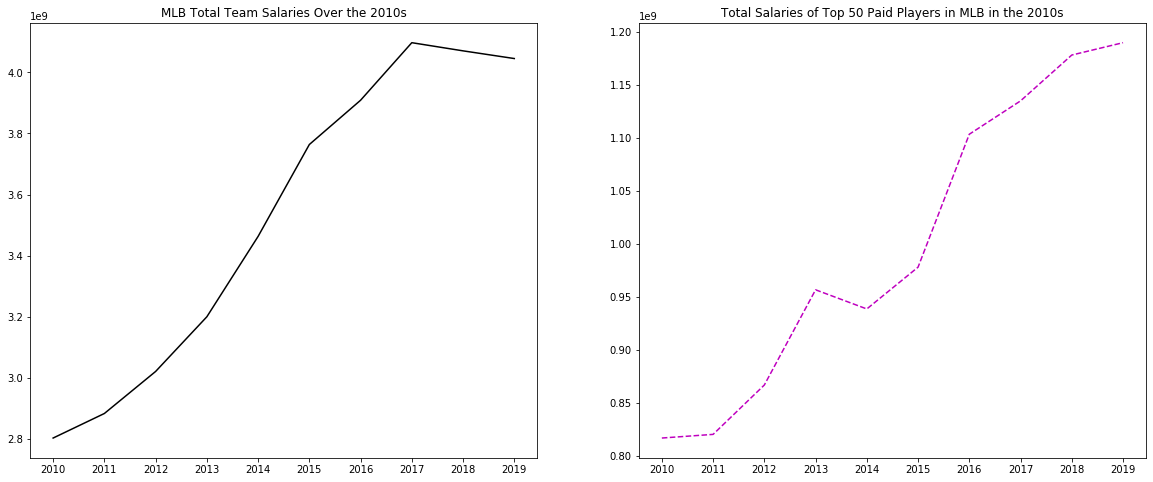

In [211]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharex=True)
ax1 = axes[0]
ax2 = axes[1]
ax1.plot(master_top_50_and_overall["Year"], master_top_50_and_overall["Payroll_x"], "k")
ax1.set_title("MLB Total Team Salaries Over the 2010s")
ax1.set_xticks(np.arange(2010, 2020, 1))
ax2.plot(master_top_50_and_overall["Year"], master_top_50_and_overall["SALARY"], "m--")
ax2.set_title("Total Salaries of Top 50 Paid Players in MLB in the 2010s")
ax2.set_xticks(np.arange(2010, 2020, 1))

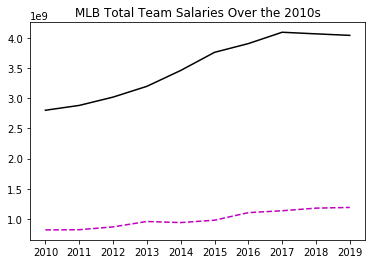

In [212]:
plt.plot(master_top_50_and_overall["Year"], master_top_50_and_overall["Payroll_x"], "k")
plt.title("MLB Total Team Salaries Over the 2010s")
plt.xticks(np.arange(2010, 2020, 1))
plt.plot(master_top_50_and_overall["Year"], master_top_50_and_overall["SALARY"], "m--")

In [213]:
fifty_groups_groupby = master_top50.groupby(["In_The_Year", "bin_groups"]).sum()["SALARY"].unstack()

In [214]:
(fifty_groups_groupby.pct_change()*100).mean()

bin_groups
top 10    5.351166
11-25     4.265899
26-50     4.588599
dtype: float64

In [215]:
master_top50.groupby(["Pitcher?","bin_groups"]).count()["NAME"].unstack()

bin_groups  top 10  11-25  26-50
Pitcher?                        
0               46     91    162
1               54     59     88

In [216]:
master_top50.head()

NAME  YearSigned TEAM POS    SALARY        YEARS  \
RANK                                                                  
1          Max Scherzer        2015  WSH  SP  42142857  7 (2015-21)   
2     Stephen Strasburg        2017  WSH  SP  36428571  7 (2017-23)   
3            Mike Trout        2015  LAA  CF  34083333  6 (2015-20)   
4          Zack Greinke        2016  ARI  SP  32421884  6 (2016-21)   
5           David Price        2016  BOS  SP  31000000  7 (2016-22)   

      TOTAL VALUE  AVG ANNUAL  Pitcher?  YearSigned.1  ...  gmLI  WAAadj  \
RANK                                                   ...                 
1       210000000    30000000         1          2015  ...   0.0    -0.2   
2       175000000    25000000         1          2017  ...   0.0    -0.1   
3       144500000    24083333         0          2015  ...   0.0     0.0   
4       206500000    34416667         1          2016  ...   0.0    -0.1   
5       217000000    31000000         1          2016  ...   0.0    -0.1   

      WAR.1 RAR.1 waaWL%.1  162WL%.1    Salary.1  Awards.3  bin_groups  \
RANK                                                                     
1       6.9  62.0    0.654     0.531  17142000.0  AS,CYA-5      top 10   
2       6.4  60.0    0.676     0.530  18333334.0  AS,CYA-3      top 10   
3       0.0   0.0    0.000     0.000         0.0         0      top 10   
4       2.5  24.0    0.548     0.508  34000000.0        GG      top 10   
5       2.9  30.0    0.522     0.505  30000000.0         0      top 10   

      In_The_Year  
RANK               
1            2019  
2            2019  
3            2019  
4            2019  
5            2019  

[5 rows x 126 columns]

In [217]:
master_pitch_clean_v4[(~master_pitch_clean_v4["Name"].isin(top_payed_pitchers_list))].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2782 entries, 11 to 5671
Data columns (total 34 columns):
Name              2782 non-null object
Age               2782 non-null float64
Tm                2782 non-null object
W                 2782 non-null int64
L                 2782 non-null int64
W-L%              2782 non-null float64
ERA               2782 non-null float64
G                 2782 non-null int64
GS                2782 non-null int64
GF                2782 non-null int64
SV                2782 non-null int64
IP                2782 non-null float64
H                 2782 non-null int64
R                 2782 non-null int64
ER                2782 non-null int64
HR                2782 non-null int64
BB                2782 non-null int64
SO                2782 non-null int64
WHIP              2782 non-null float64
H9                2782 non-null float64
HR9               2782 non-null float64
SO9               2782 non-null float64
Year              2782 non-null float6

In [218]:
master_pitch_clean_v4[(master_pitch_clean_v4["Name"].isin(top_payed_pitchers_list))].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 3 to 5664
Data columns (total 34 columns):
Name              386 non-null object
Age               386 non-null float64
Tm                386 non-null object
W                 386 non-null int64
L                 386 non-null int64
W-L%              386 non-null float64
ERA               386 non-null float64
G                 386 non-null int64
GS                386 non-null int64
GF                386 non-null int64
SV                386 non-null int64
IP                386 non-null float64
H                 386 non-null int64
R                 386 non-null int64
ER                386 non-null int64
HR                386 non-null int64
BB                386 non-null int64
SO                386 non-null int64
WHIP              386 non-null float64
H9                386 non-null float64
HR9               386 non-null float64
SO9               386 non-null float64
Year              386 non-null float64
RA9               386 n

In [228]:
pitchers_not_in_50 = master_pitch_clean_v5[(~master_pitch_clean_v5["Name"].isin(top_payed_pitchers_list))]
batters_not_in_50 = master_bats_clean_v4[(~master_bats_clean_v4["Name"].isin(top_payed_batters_list))]

In [229]:
pitchers_not_in_50.groupby("Year").mean()

Age         W         L      W-L%       ERA          G  \
Year                                                                   
2010.0  29.071698  5.309434  5.452830  0.479226  4.122302  43.992453   
2011.0  28.720930  5.484496  5.748062  0.478484  3.920853  43.282946   
2012.0  28.805447  5.284047  5.089494  0.514004  3.852062  44.875486   
2013.0  28.692308  5.523810  5.271062  0.501725  3.790293  44.131868   
2014.0  28.671533  5.503650  5.594891  0.480876  3.637737  44.361314   
2015.0  29.003759  5.458647  5.281955  0.503447  3.888383  43.620301   
2016.0  28.625000  5.441176  5.470588  0.511511  3.996507  43.941176   
2017.0  28.804196  5.541958  5.409091  0.500049  4.124441  44.283217   
2018.0  28.880282  5.334507  5.140845  0.496116  4.072289  43.419014   
2019.0  28.665399  6.015209  5.596958  0.520354  4.308973  43.984791   

               GS         GF        SV         IP  ...    RA9opp       RAA  \
Year                                               ...                       
2010.0  10.362264  11.800000  3.664151  94.409434  ...  4.478868 -0.184906   
2011.0  11.015504  11.449612  3.740310  98.718605  ...  4.351357  0.050388   
2012.0   9.466926  12.050584  3.972763  90.862257  ...  4.403074  0.863813   
2013.0  10.483516  10.787546  3.296703  96.195604  ...  4.229853  1.007326   
2014.0  10.781022  11.018248  3.419708  97.547810  ...  4.115912  0.886861   
2015.0  10.518797  10.421053  3.481203  93.322180  ...  4.308910  0.981203   
2016.0  10.621324  10.275735  3.397059  94.040441  ...  4.536176  1.808824   
2017.0  10.699301  10.510490  3.447552  93.516084  ...  4.750455  2.220280   
2018.0  10.411972   9.852113  3.052817  91.365493  ...  4.502289  2.320423   
2019.0  11.783270   9.547529  3.186312  97.205703  ...  4.882966  3.209125   

             WAA       WAR        RAR    waaWL%    162WL%        Salary  \
Year                                                                      
2010.0  0.024528  0.866792   8.841509  0.493472  0.500260  2.429925e+06   
2011.0  0.048062  0.922093   9.193798  0.493539  0.500329  2.219799e+06   
2012.0  0.131128  0.941634   9.451362  0.499665  0.500938  2.308907e+06   
2013.0  0.157875  0.989011  10.304029  0.499011  0.501029  2.409532e+06   
2014.0  0.140511  0.985401   9.514599  0.502219  0.501011  2.773432e+06   
2015.0  0.143985  0.963534  10.086466  0.499895  0.500985  3.180623e+06   
2016.0  0.227941  1.052941  10.066176  0.502971  0.501456  3.053966e+06   
2017.0  0.273077  1.081469  11.506993  0.504066  0.501678  3.195716e+06   
2018.0  0.288380  1.086268  10.278169  0.505426  0.501796  3.345851e+06   
2019.0  0.358935  1.205703  12.460076  0.509479  0.502300  3.333773e+06   

        dollar_per_WAA  dollar_per_WAr  
Year                                    
2010.0   -8.143387e+05    9.563951e+05  
2011.0    2.751917e+05    1.040034e+06  
2012.0    2.617358e+06    7.740482e+05  
2013.0    8.244162e+05    8.099228e+04  
2014.0   -1.530397e+06    4.987587e+05  
2015.0    9.412241e+05    9.261828e+05  
2016.0    1.622684e+06    5.642131e+05  
2017.0    6.505213e+05   -2.251376e+05  
2018.0    6.310220e+05    1.341140e+06  
2019.0    2.030204e+05    2.389699e+06  

[10 rows x 31 columns]

In [230]:
pitchers_in_50 = master_pitch_clean_v5[(master_pitch_clean_v5["Name"].isin(top_payed_pitchers_list))]
batters_in_50 = master_bats_clean_v4[(master_bats_clean_v4["Name"].isin(top_payed_batters_list))]

In [231]:
pitchers_in_50.groupby("Year").mean()

Age          W         L      W-L%       ERA          G  \
Year                                                                    
2010.0  28.720000  11.400000  9.260000  0.537460  3.716600  31.980000   
2011.0  28.978723  11.531915  8.255319  0.589553  3.444681  34.787234   
2012.0  29.346939  10.938776  8.938776  0.531102  3.782041  33.061224   
2013.0  30.173913   9.478261  8.391304  0.519761  3.733043  33.021739   
2014.0  30.261905  11.119048  8.095238  0.544119  3.348095  33.190476   
2015.0  31.222222   9.944444  7.611111  0.557000  3.407222  33.277778   
2016.0  31.272727  10.787879  7.181818  0.584667  3.791212  32.727273   
2017.0  31.925926  10.629630  7.888889  0.581407  4.074074  29.740741   
2018.0  32.720000   8.840000  7.200000  0.537760  3.776400  28.280000   
2019.0  33.600000  10.250000  6.650000  0.595700  3.852000  30.950000   

               GS        GF        SV          IP  ...    RA9opp        RAA  \
Year                                               ...                        
2010.0  26.780000  3.640000  1.900000  176.838000  ...  4.419000  11.580000   
2011.0  25.042553  5.106383  2.638298  172.585106  ...  4.318298  12.808511   
2012.0  25.877551  3.979592  2.142857  170.224490  ...  4.368163   8.020408   
2013.0  23.978261  5.413043  3.391304  158.780435  ...  4.200217   6.956522   
2014.0  25.119048  6.452381  4.690476  168.245238  ...  4.073333   9.261905   
2015.0  23.138889  8.111111  5.083333  157.255556  ...  4.255833  11.444444   
2016.0  23.818182  7.484848  5.272727  155.115152  ...  4.486364  10.545455   
2017.0  24.740741  3.925926  2.333333  151.107407  ...  4.703704   8.629630   
2018.0  23.160000  4.120000  2.800000  138.396000  ...  4.477600   8.960000   
2019.0  24.450000  4.400000  2.450000  145.900000  ...  4.810500  13.450000   

             WAA       WAR        RAR    waaWL%    162WL%        Salary  \
Year                                                                      
2010.0  1.360000  2.928000  28.480000  0.540620  0.507600  9.329485e+06   
2011.0  1.525532  3.036170  28.872340  0.548574  0.509191  8.915590e+06   
2012.0  0.975510  2.473469  24.265306  0.527939  0.505510  9.949024e+06   
2013.0  0.893478  2.271739  22.543478  0.521652  0.505522  1.100509e+07   
2014.0  1.185714  2.659524  24.214286  0.535524  0.506952  1.260156e+07   
2015.0  1.369444  2.744444  26.222222  0.541222  0.507667  1.384972e+07   
2016.0  1.242424  2.636364  24.030303  0.536576  0.507364  1.682916e+07   
2017.0  0.996296  2.325926  23.481481  0.531333  0.505667  2.075805e+07   
2018.0  1.056000  2.252000  20.880000  0.532720  0.506320  2.015852e+07   
2019.0  1.445000  2.700000  26.850000  0.544750  0.508500  1.977653e+07   

        dollar_per_WAA  dollar_per_WAr  
Year                                    
2010.0    2.107419e+06    3.113021e+06  
2011.0    6.480548e+06    2.474322e+06  
2012.0    6.421186e+05    9.058040e+06  
2013.0    1.877393e+05   -3.437277e+06  
2014.0    7.941170e+06   -1.657871e+06  
2015.0    4.140246e+05    1.273407e+07  
2016.0   -5.165125e+06   -9.045362e+05  
2017.0   -9.735836e+06    1.372653e+07  
2018.0    1.096507e+06    8.809400e+06  
2019.0    7.953528e+06    9.552700e+06  

[10 rows x 31 columns]

In [232]:
batters_not_in_50.groupby("Year").mean()

Age           G          PA          AB          R           H  \
Year                                                                           
2010.0  29.160000  124.735000  477.945000  427.480000  55.480000  112.220000   
2011.0  29.113208  120.735849  452.886792  406.712264  50.693396  105.353774   
2012.0  28.562500  124.197115  463.966346  417.889423  54.014423  108.860577   
2013.0  28.343750  122.540179  458.370536  413.473214  50.763393  106.370536   
2014.0  28.178899  123.495413  464.146789  419.192661  50.706422  107.793578   
2015.0  28.253521  125.629108  471.370892  427.187793  53.356808  111.619718   
2016.0  28.162281  124.131579  468.587719  421.776316  56.390351  110.824561   
2017.0  28.025641  125.410256  479.076923  429.111111  60.264957  113.303419   
2018.0  27.870690  126.120690  484.883621  433.530172  58.978448  110.995690   
2019.0  27.767068  123.277108  472.522088  422.546185  62.036145  110.473896   

               HR        RBI          SO        BA  ...       OPS      Rbat  \
Year                                                ...                       
2010.0  11.610000  52.630000   83.245000  0.259890  ...  0.727870 -0.310000   
2011.0  10.476415  47.830189   79.344340  0.255958  ...  0.711689 -0.896226   
2012.0  12.413462  50.384615   87.173077  0.257678  ...  0.729087  0.812500   
2013.0  11.272321  47.946429   86.031250  0.253714  ...  0.710018 -0.441964   
2014.0  10.550459  47.568807   90.197248  0.253257  ...  0.705161  0.674312   
2015.0  12.215962  50.192488   90.657277  0.257718  ...  0.723484  0.126761   
2016.0  14.500000  53.526316   94.434211  0.258202  ...  0.742474  1.442982   
2017.0  16.529915  57.149573   98.940171  0.261564  ...  0.766419  2.474359   
2018.0  15.603448  55.987069  101.754310  0.253017  ...  0.743974  2.211207   
2019.0  18.702811  59.859438  102.469880  0.257237  ...  0.776349  3.365462   

             RAA       WAA        RAR       WAR    waaWL%    162WL%  \
Year                                                                  
2010.0  0.375000  0.036000  16.680000  1.619000  0.499865  0.500495   
2011.0 -0.202830 -0.038208  15.089623  1.456132  0.498962  0.500042   
2012.0  1.149038  0.110096  16.903846  1.650481  0.500216  0.500918   
2013.0 -0.169643  0.022768  15.415179  1.540179  0.499013  0.500112   
2014.0  1.348624  0.156422  17.169725  1.698165  0.500661  0.500991   
2015.0  0.657277  0.104695  16.694836  1.669014  0.499906  0.500615   
2016.0  2.214912  0.221491  18.131579  1.758333  0.500575  0.501478   
2017.0  3.363248  0.331197  19.653846  1.901709  0.502321  0.502197   
2018.0  3.405172  0.343534  19.780172  1.927155  0.501815  0.502185   
2019.0  4.349398  0.406024  20.341365  1.951004  0.502582  0.502703   

              Salary  dollar_per_WAR  
Year                                  
2010.0  3.051998e+06    1.053661e+06  
2011.0  2.950919e+06    7.084774e+05  
2012.0  2.950922e+06    1.224294e+06  
2013.0  3.075644e+06    1.411866e+06  
2014.0  3.342881e+06    8.761374e+05  
2015.0  3.914256e+06    1.799543e+06  
2016.0  3.798924e+06    2.107044e+06  
2017.0  3.894241e+06    9.906435e+05  
2018.0  4.319884e+06    2.909707e+06  
2019.0  4.059281e+06    2.079144e+06  

[10 rows x 22 columns]

In [233]:
batters_in_50.median()

Age               3.100000e+01
G                 1.440000e+02
PA                6.000000e+02
AB                5.260000e+02
R                 7.300000e+01
H                 1.430000e+02
HR                2.000000e+01
RBI               7.300000e+01
SO                9.700000e+01
BA                2.730000e-01
OBP               3.440000e-01
SLG               4.530000e-01
OPS               7.960000e-01
Year              2.014000e+03
Rbat              1.000000e+01
RAA               8.000000e+00
WAA               8.000000e-01
RAR               2.700000e+01
WAR               2.700000e+00
waaWL%            5.060000e-01
162WL%            5.050000e-01
Salary            1.300000e+07
dollar_per_WAR    3.125000e+06
dtype: float64

In [234]:
batters_not_in_50.median()

Age               2.800000e+01
G                 1.280000e+02
PA                4.685000e+02
AB                4.220000e+02
R                 5.300000e+01
H                 1.075000e+02
HR                1.200000e+01
RBI               5.000000e+01
SO                8.700000e+01
BA                2.560000e-01
OBP               3.220000e-01
SLG               4.090000e-01
OPS               7.310000e-01
Year              2.015000e+03
Rbat             -1.000000e+00
RAA               0.000000e+00
WAA               0.000000e+00
RAR               1.500000e+01
WAR               1.500000e+00
waaWL%            5.000000e-01
162WL%            5.000000e-01
Salary            2.000000e+06
dollar_per_WAR    7.407407e+05
dtype: float64

In [235]:
master_pitch_clean_v5 = master_pitch_clean_v4.assign(dollar_per_WAr = lambda x: x["Salary"] /  x["WAR"]).replace(np.inf, np.nan).dropna()

In [236]:
master_team_df_2.groupby("Team Name").mean()["Payroll"]

Team Name
Arizona Diamondbacks      94165959.7
Atlanta Braves           102618726.5
Baltimore Orioles        110896545.4
Boston Red Sox           187395613.2
Chicago Cubs             145032731.9
Chicago White Sox        102977577.3
Cincinnati Reds           99754573.9
Cleveland Indians         90622706.9
Colorado Rockies         103504472.2
Detroit Tigers           149818775.0
Houston Astros            92222860.0
Kansas City Royals        95926195.6
Los Angeles Angels       151849195.9
Los Angeles Dodgers      192817143.5
Miami Marlins             72082058.2
Milwaukee Brewers         90344003.7
Minnesota Twins          105677586.2
New York Mets            124162104.3
New York Yankees         207257232.9
Oakland Athletics         72623470.0
Philadelphia Phillies    140122332.0
Pittsburgh Pirates        72102350.5
San Diego Padres          77162330.6
San Francisco Giants     153032414.5
Seattle Mariners         116976660.5
St. Louis Cardinals      128302386.7
Tampa Bay Rays            66

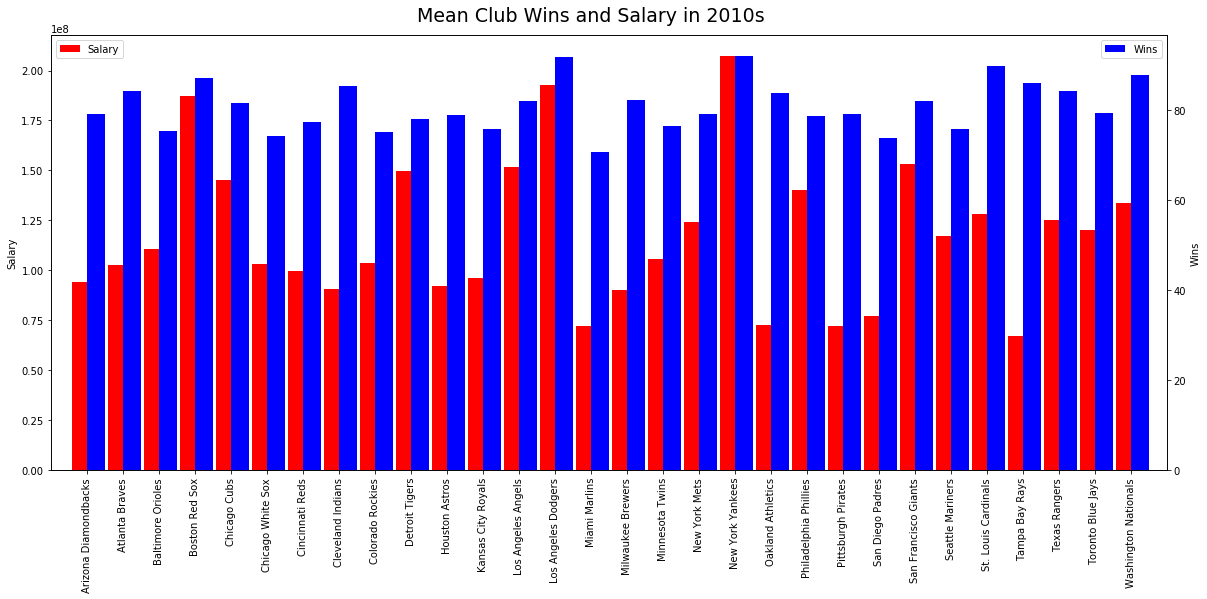

In [408]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.4

group = master_team_df_2.groupby("Team Name").mean().reset_index()

group.Payroll.plot(kind="bar", color="red", ax=ax, width=0.4, position=1, label="Salary")
group.W.plot(kind="bar", color="blue", ax=ax2, position=0, label="Wins")

ax.set_ylabel("Salary")
ax2.set_ylabel("Wins")

plt.xticks(ticks=np.arange(0,30,1), labels=[x for x in group["Team Name"]])
plt.xlim(-1, 30)
ax.legend(loc="upper left")
ax2.legend()
plt.suptitle("Mean Club Wins and Salary in 2010s", y=0.93, fontsize=19)
plt.savefig("ClubWinsAndSalaries2.png", pad_inches=2)
plt.show()

In [238]:
master_team_df_2.groupby("Team Name").mean().reset_index()["Team Name"].values

array(['Arizona Diamondbacks', 'Atlanta Braves', 'Baltimore Orioles',
       'Boston Red Sox', 'Chicago Cubs', 'Chicago White Sox',
       'Cincinnati Reds', 'Cleveland Indians', 'Colorado Rockies',
       'Detroit Tigers', 'Houston Astros', 'Kansas City Royals',
       'Los Angeles Angels', 'Los Angeles Dodgers', 'Miami Marlins',
       'Milwaukee Brewers', 'Minnesota Twins', 'New York Mets',
       'New York Yankees', 'Oakland Athletics', 'Philadelphia Phillies',
       'Pittsburgh Pirates', 'San Diego Padres', 'San Francisco Giants',
       'Seattle Mariners', 'St. Louis Cardinals', 'Tampa Bay Rays',
       'Texas Rangers', 'Toronto Blue Jays', 'Washington Nationals'],
      dtype=object)

In [239]:
revised_precontract_range_stats_p1["dollar_per_WAA"].mean()

551826.7326155792

In [240]:
pitchers_not_in_50.groupby("Year").mean()["dollar_per_WAA"].mean()

542070.1788041791

In [241]:
revised_fifty_pitch_v3["dollar_per_WAA"].mean()

8417222.428746415

In [242]:
revised_precontract_range_stats_h1["dollar_per_WAR"].mean()

3345091.586849554

In [243]:
batters_not_in_50.groupby("Year").mean()["dollar_per_WAR"].mean()

1516051.8030557237

In [244]:
revised_fifty_bats_v3["dollar_per_WAR"].mean()

4786902.709820117

In [245]:
cdf = pd.concat([revised_fifty_bats_v3["dollar_per_WAR"], batters_not_in_50.groupby("Year").mean()["dollar_per_WAR"], revised_precontract_range_stats_h1["dollar_per_WAR"]])

In [246]:
batters_not_in_50["BA"].mean()

0.2568088367899012

In [247]:
df_1 = revised_fifty_bats_v3[["Name", "dollar_per_WAR"]]

In [248]:
df_1 = df_1.assign(indicator="after contract").drop("Name", axis=1).dropna()

In [249]:
df_2 = batters_not_in_50[["Name", "dollar_per_WAR"]]
df_2 = df_2.assign(indicator="no top contract").drop("Name", axis=1).dropna()

In [250]:
df_3 = revised_precontract_range_stats_h1[["Name", "dollar_per_WAR"]]
df_3 = df_3.assign(indicator="precontract").drop("Name", axis=1).dropna()

In [251]:
cdf_2=pd.concat([df_2, df_3, df_1])
cdf_2

dollar_per_WAR        indicator
5      1.441176e+05  no top contract
7      1.775000e+07  no top contract
9      8.000000e+05  no top contract
10    -1.178571e+07  no top contract
11     4.166667e+06  no top contract
12    -2.142857e+06  no top contract
13     1.428571e+06  no top contract
14     3.333333e+06  no top contract
15     6.750000e+06  no top contract
16     1.818182e+06  no top contract
17     1.583871e+05  no top contract
18     3.229167e+06  no top contract
20     2.327586e+06  no top contract
21     1.491176e+05  no top contract
22     2.000000e+07  no top contract
23     7.528986e+04  no top contract
26    -6.233333e+05  no top contract
27     2.991667e+05  no top contract
33     7.000000e+05  no top contract
35     3.461538e+05  no top contract
36    -2.870000e+06  no top contract
37     6.726190e+05  no top contract
39     4.835165e+06  no top contract
40     1.078431e+06  no top contract
41     5.000000e+06  no top contract
44     7.142857e+06  no top contract
45     1.000000e+07  no top contract
46    -1.222222e+07  no top contract
47     4.000000e+06  no top contract
49     1.244182e+05  no top contract
..              ...              ...
250   -7.500000e+07   after contract
252    3.583333e+07   after contract
273    4.418605e+06   after contract
294    5.293103e+06   after contract
296    2.703179e+06   after contract
298   -5.172414e+06   after contract
299    4.054054e+06   after contract
314    1.050000e+07   after contract
325    1.194955e+07   after contract
343    3.571429e+06   after contract
344    1.686747e+06   after contract
349    8.216839e+06   after contract
356    2.600000e+07   after contract
358    4.642857e+06   after contract
370    3.392857e+07   after contract
378    3.425926e+06   after contract
380   -1.812500e+07   after contract
399    5.000000e+06   after contract
408    1.625000e+07   after contract
415    9.215909e+06   after contract
447   -1.555556e+07   after contract
450    2.266667e+07   after contract
453   -3.275000e+07   after contract
457   -4.307410e+07   after contract
474    1.114124e+07   after contract
490    4.531250e+06   after contract
497    1.656250e+07   after contract
507    2.272727e+06   after contract
508    5.208333e+06   after contract
511    3.041666e+07   after contract

[2396 rows x 2 columns]

In [252]:
mdf_2 = pd.melt(cdf_2, id_vars=["indicator"], var_name="contract status")
mdf_2

indicator contract status         value
0     no top contract  dollar_per_WAR  1.441176e+05
1     no top contract  dollar_per_WAR  1.775000e+07
2     no top contract  dollar_per_WAR  8.000000e+05
3     no top contract  dollar_per_WAR -1.178571e+07
4     no top contract  dollar_per_WAR  4.166667e+06
5     no top contract  dollar_per_WAR -2.142857e+06
6     no top contract  dollar_per_WAR  1.428571e+06
7     no top contract  dollar_per_WAR  3.333333e+06
8     no top contract  dollar_per_WAR  6.750000e+06
9     no top contract  dollar_per_WAR  1.818182e+06
10    no top contract  dollar_per_WAR  1.583871e+05
11    no top contract  dollar_per_WAR  3.229167e+06
12    no top contract  dollar_per_WAR  2.327586e+06
13    no top contract  dollar_per_WAR  1.491176e+05
14    no top contract  dollar_per_WAR  2.000000e+07
15    no top contract  dollar_per_WAR  7.528986e+04
16    no top contract  dollar_per_WAR -6.233333e+05
17    no top contract  dollar_per_WAR  2.991667e+05
18    no top contract  dollar_per_WAR  7.000000e+05
19    no top contract  dollar_per_WAR  3.461538e+05
20    no top contract  dollar_per_WAR -2.870000e+06
21    no top contract  dollar_per_WAR  6.726190e+05
22    no top contract  dollar_per_WAR  4.835165e+06
23    no top contract  dollar_per_WAR  1.078431e+06
24    no top contract  dollar_per_WAR  5.000000e+06
25    no top contract  dollar_per_WAR  7.142857e+06
26    no top contract  dollar_per_WAR  1.000000e+07
27    no top contract  dollar_per_WAR -1.222222e+07
28    no top contract  dollar_per_WAR  4.000000e+06
29    no top contract  dollar_per_WAR  1.244182e+05
...               ...             ...           ...
2366   after contract  dollar_per_WAR -7.500000e+07
2367   after contract  dollar_per_WAR  3.583333e+07
2368   after contract  dollar_per_WAR  4.418605e+06
2369   after contract  dollar_per_WAR  5.293103e+06
2370   after contract  dollar_per_WAR  2.703179e+06
2371   after contract  dollar_per_WAR -5.172414e+06
2372   after contract  dollar_per_WAR  4.054054e+06
2373   after contract  dollar_per_WAR  1.050000e+07
2374   after contract  dollar_per_WAR  1.194955e+07
2375   after contract  dollar_per_WAR  3.571429e+06
2376   after contract  dollar_per_WAR  1.686747e+06
2377   after contract  dollar_per_WAR  8.216839e+06
2378   after contract  dollar_per_WAR  2.600000e+07
2379   after contract  dollar_per_WAR  4.642857e+06
2380   after contract  dollar_per_WAR  3.392857e+07
2381   after contract  dollar_per_WAR  3.425926e+06
2382   after contract  dollar_per_WAR -1.812500e+07
2383   after contract  dollar_per_WAR  5.000000e+06
2384   after contract  dollar_per_WAR  1.625000e+07
2385   after contract  dollar_per_WAR  9.215909e+06
2386   after contract  dollar_per_WAR -1.555556e+07
2387   after contract  dollar_per_WAR  2.266667e+07
2388   after contract  dollar_per_WAR -3.275000e+07
2389   after contract  dollar_per_WAR -4.307410e+07
2390   after contract  dollar_per_WAR  1.114124e+07
2391   after contract  dollar_per_WAR  4.531250e+06
2392   after contract  dollar_per_WAR  1.656250e+07
2393   after contract  dollar_per_WAR  2.272727e+06
2394   after contract  dollar_per_WAR  5.208333e+06
2395   after contract  dollar_per_WAR  3.041666e+07

[2396 rows x 3 columns]

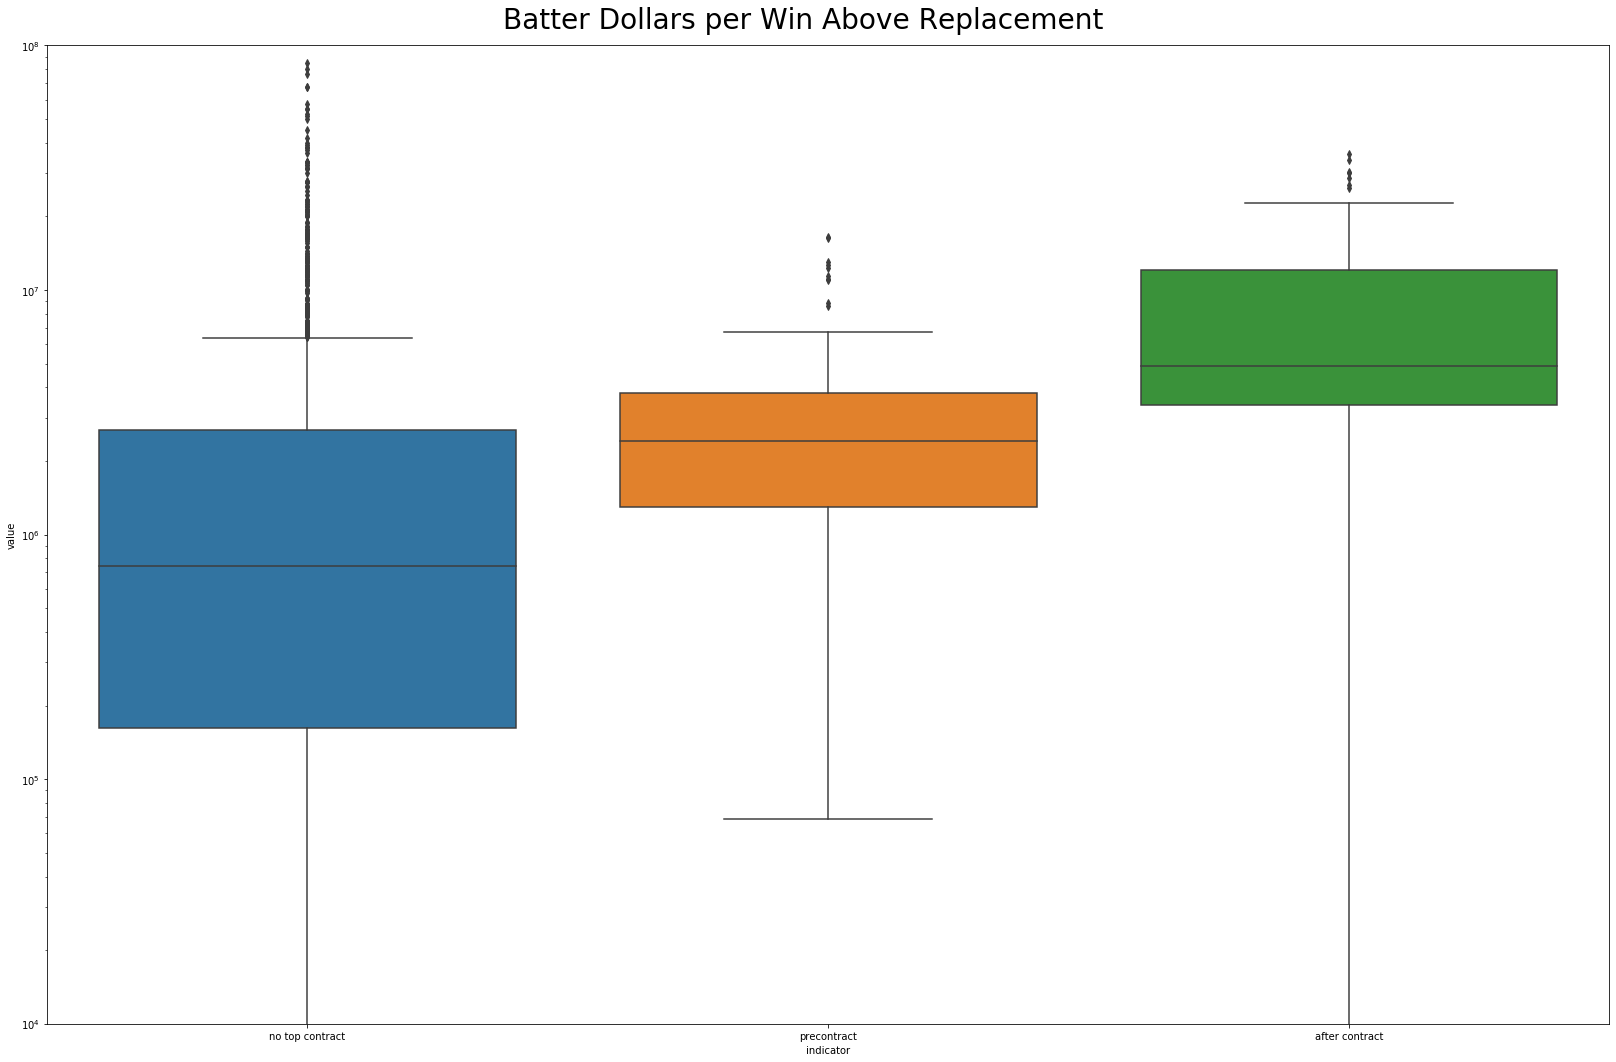

In [253]:
fig, ax  = plt.subplots(1, 1, figsize=(28, 18))
ax.set_yscale("log")
ax.set_ylim(10000, 100000000)
ax = sns.boxplot(x="indicator", y="value", data=mdf_2)
fig.suptitle("Batter Dollars per Win Above Replacement", y=0.91, fontsize=28)
plt.show()

In [254]:
df_4 = revised_fifty_pitch_v3[["Name", "dollar_per_WAA"]]
df_4 = df_4.assign(indicator="after contract").drop("Name", axis=1).dropna()

In [255]:
df_5 = pitchers_not_in_50[["Name", "dollar_per_WAA"]]
df_5 = df_5.assign(indicator="no top contract").drop("Name", axis=1).dropna()

In [256]:
df_6 = revised_precontract_range_stats_p1[["Name", "dollar_per_WAA"]]
df_6 = df_6.assign(indicator="precontract").drop("Name", axis=1).dropna()

In [257]:
cdf = pd.concat([df_5, df_6, df_4])
cdf

dollar_per_WAA        indicator
11    -3.966429e+05  no top contract
15     5.472222e+05  no top contract
19     1.850000e+06  no top contract
24     3.923077e+05  no top contract
25     4.857143e+06  no top contract
26     4.818182e+05  no top contract
29     1.633333e+06  no top contract
33    -7.000000e+05  no top contract
35    -1.830000e+06  no top contract
38    -7.596154e+06  no top contract
39    -1.375000e+07  no top contract
41    -1.843750e+06  no top contract
42     2.500000e+06  no top contract
44     1.555556e+06  no top contract
51    -1.333333e+06  no top contract
52    -4.300000e+06  no top contract
54    -2.109500e+06  no top contract
58     2.812500e+06  no top contract
59     4.942000e+05  no top contract
62     1.024800e+06  no top contract
63    -1.055000e+06  no top contract
64     6.741176e+04  no top contract
65     2.045455e+06  no top contract
68     1.754839e+05  no top contract
72    -2.600000e+06  no top contract
73     1.021600e+06  no top contract
74     1.569091e+05  no top contract
77    -1.300000e+06  no top contract
81     1.816667e+06  no top contract
83    -7.500000e+05  no top contract
..              ...              ...
147    3.440000e+07   after contract
157    4.104478e+06   after contract
179   -2.277778e+07   after contract
180    8.080000e+06   after contract
199    3.733333e+06   after contract
223    7.692308e+06   after contract
232   -9.473684e+06   after contract
245   -1.968750e+07   after contract
274    4.250000e+06   after contract
286    5.333333e+07   after contract
289   -3.987500e+07   after contract
301   -8.170976e+06   after contract
305    4.649945e+06   after contract
319    5.000000e+07   after contract
320    2.898551e+06   after contract
347    2.455357e+06   after contract
348   -7.361111e+06   after contract
350   -4.814815e+06   after contract
351   -9.285714e+06   after contract
352    1.444444e+07   after contract
354    1.000000e+07   after contract
377   -4.750000e+07   after contract
396    7.470012e+07   after contract
430    1.600000e+07   after contract
443    8.912127e+06   after contract
503    1.275000e+07   after contract
504   -6.944444e+06   after contract
505   -4.464286e+06   after contract
509   -2.066667e+07   after contract
510    1.106061e+07   after contract

[2811 rows x 2 columns]

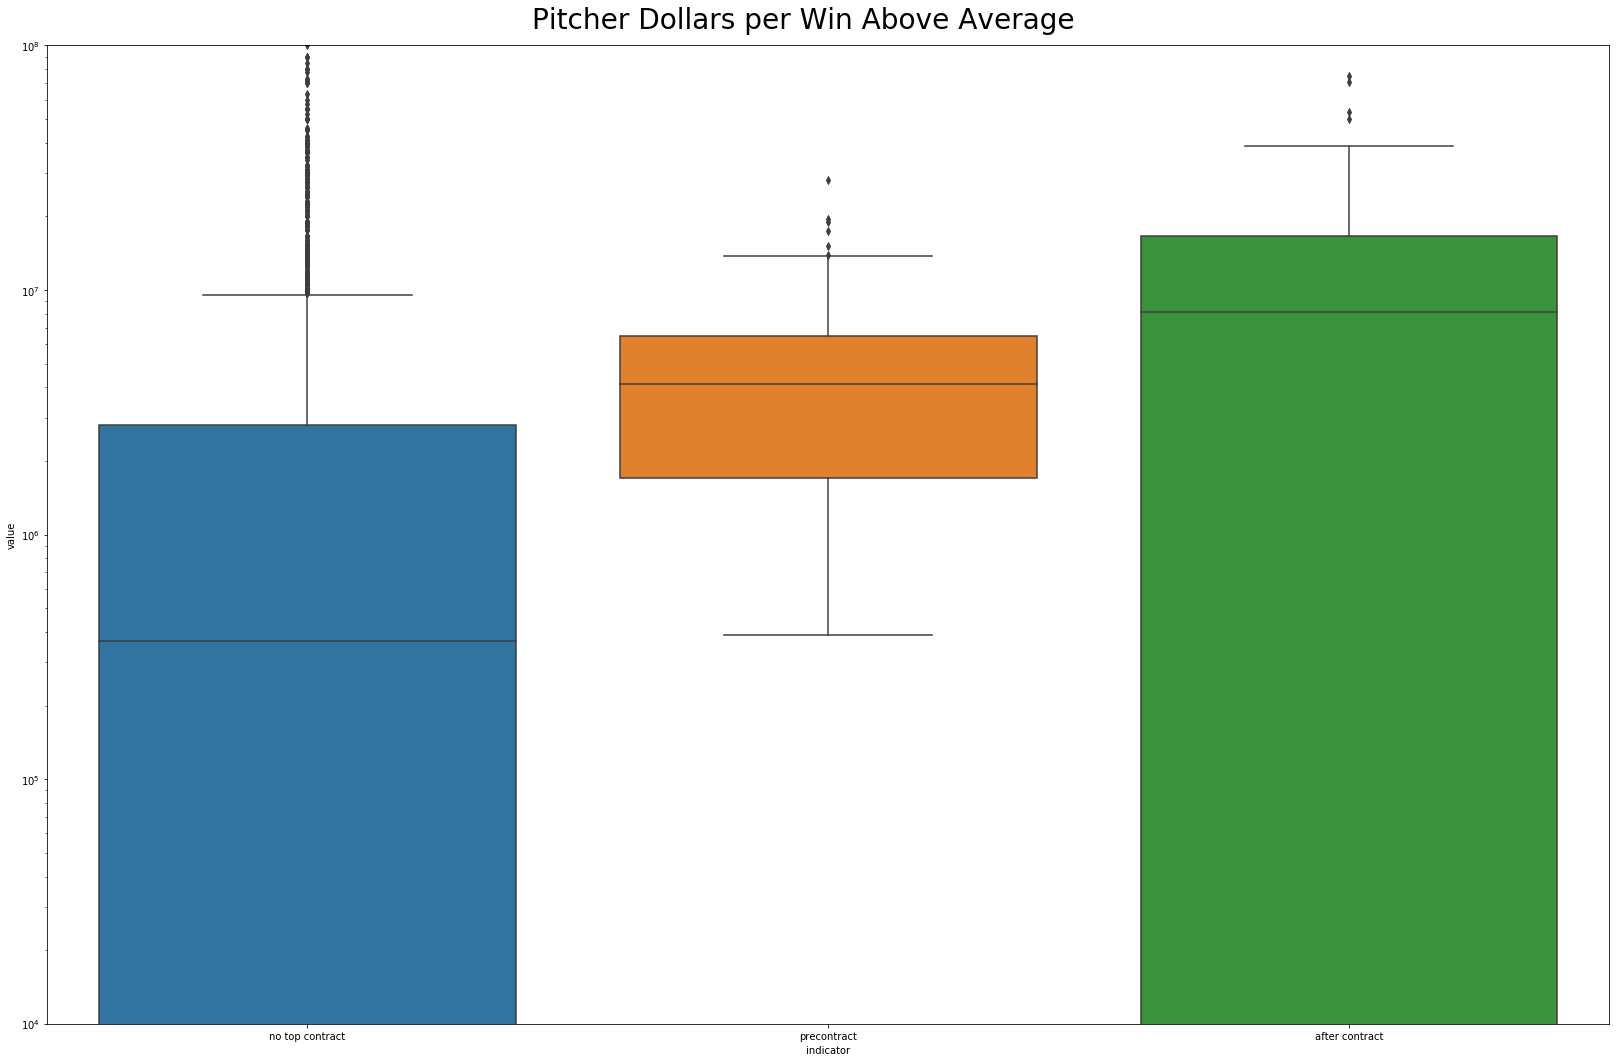

In [258]:
mdf = pd.melt(cdf, id_vars=["indicator"], var_name="contract status")
fig, ax  = plt.subplots(1, 1, figsize=(28, 18))
ax.set_yscale("log")
ax.set_ylim(10000, 100000000)
ax = sns.boxplot(x="indicator", y="value", data=mdf)
fig.suptitle("Pitcher Dollars per Win Above Average", y=0.91, fontsize=28)
plt.show()

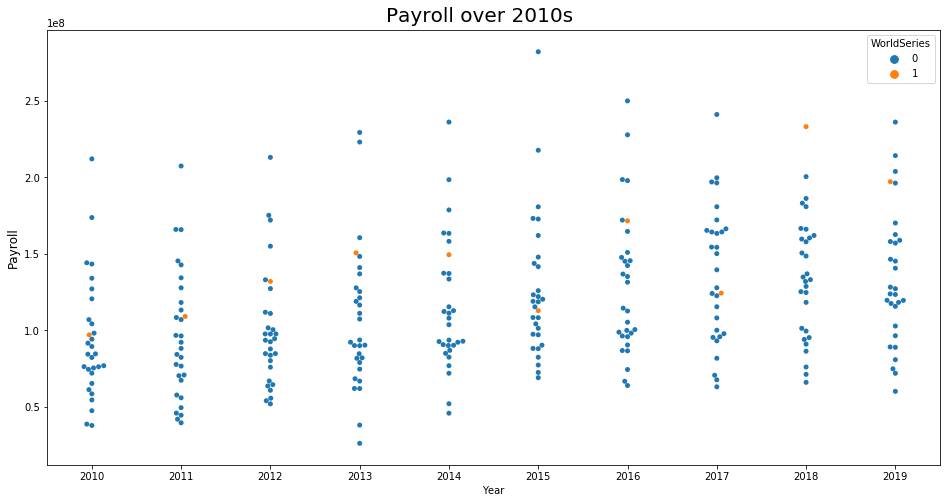

In [384]:
fig, ax  = plt.subplots(1, 1, figsize=(16, 8))
sns.swarmplot(x="Year", y="Payroll", hue="WorldSeries", data=master_team_df_2, ax=ax)
fig.suptitle("Payroll over 2010s", y=.92, fontsize=20)
plt.ylabel("Payroll", fontsize=12)
plt.savefig("PayRollAndWorldSeries.png")

In [260]:
fifty_over_decade = batters_in_50.groupby("Year").mean()[["Age", "H", "R","AB", "RBI", "SO", "HR", "BA", "OPS", "WAR", "Salary"]].reset_index()
fifty_over_decade_not = batters_not_in_50.groupby("Year").mean()[["Age", "H", "R","AB", "RBI", "SO", "HR", "BA", "OPS", "WAR", "Salary"]].reset_index()

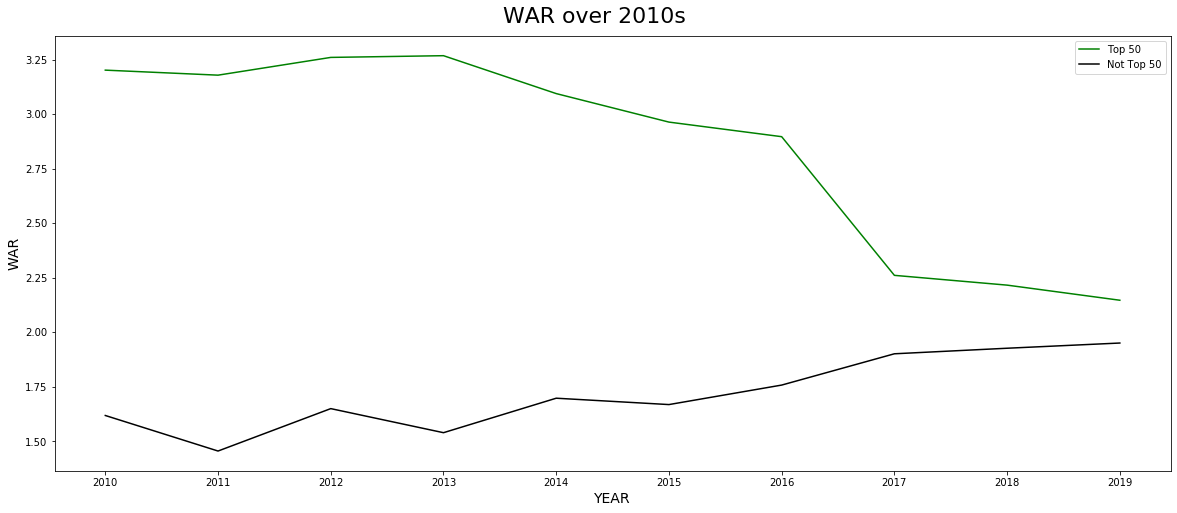

In [385]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.plot("Year", "WAR", color="green", data=fifty_over_decade, label="Top 50")
ax.plot("Year", "WAR", color="black", data=fifty_over_decade_not, label="Not Top 50")
ax.set_ylabel("WAR", fontsize=14)
ax.set_xlabel("YEAR", fontsize=14)
ax.set_xticks(np.arange(2010, 2020, 1))
ax.legend()
plt.suptitle("WAR over 2010s", fontsize=22, y=0.93)
plt.savefig("batterWAROverTime.png")

In [262]:
fifty_over_decade_p = pitchers_in_50.groupby("Year").mean()[["Age","IP", "SO", "ERA", "W", "L", "RA9", "162WL%", "WAA", "WAR" ,"Salary"]].reset_index()
fifty_over_decade_not_p = pitchers_not_in_50.groupby("Year").mean()[["Age", "IP", "SO", "ERA", "W", "L", "RA9", "162WL%", "WAA", "WAR","Salary"]].reset_index()

Text(0.5, 0.93, 'WAA over 2010s')

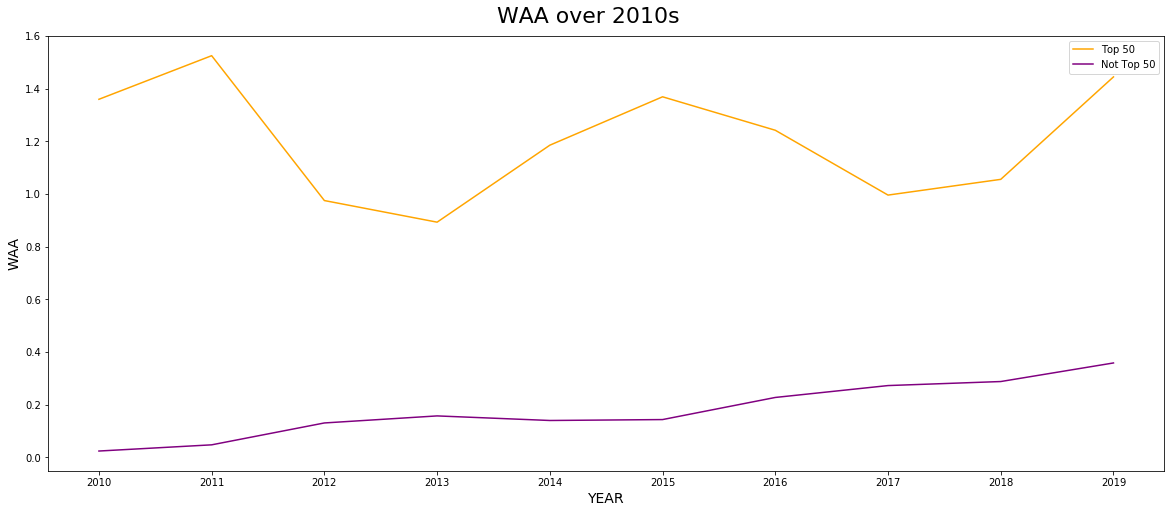

In [263]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.plot("Year", "WAA", color="orange", data=fifty_over_decade_p, label="Top 50")
ax.plot("Year", "WAA", color="purple", data=fifty_over_decade_not_p, label="Not Top 50")
ax.set_ylabel("WAA", fontsize=14)
ax.set_xlabel("YEAR", fontsize=14)
ax.set_xticks(np.arange(2010, 2020, 1))
ax.legend()
plt.suptitle("WAA over 2010s", fontsize=22, y=0.93)

In [264]:
batters_in_50.Name.unique()

array(['Aaron Rowand', 'Adam Dunn', 'Adam Jones', 'Adrian Beltre',
       'Adrian Gonzalez', 'Albert Pujols', 'Alex Gordon',
       'Alfonso Soriano', 'Anthony Rendon', 'Aramis Ramirez',
       'Brian McCann', 'Bryce Harper', 'Buster Posey', 'Carlos Beltran',
       'Carlos Gonzalez', 'Carlos Guillen', 'Carlos Lee',
       'Carlos Santana', 'Carl Crawford', 'Charlie Blackmon',
       'Chase Utley', 'Chipper Jones', 'Chris Davis', 'Curtis Granderson',
       'Dan Uggla', 'David Wright', 'Derek Jeter', 'Derrek Lee',
       'Edwin Encarnacion', 'Elvis Andrus', 'Eric Chavez', 'Eric Hosmer',
       'Freddie Freeman', 'Giancarlo Stanton', 'Hanley Ramirez',
       'Hunter Pence', 'Ian Desmond', 'Ian Kinsler', 'Ichiro Suzuki',
       'J.D. Drew', 'J.D. Martinez', 'Jacoby Ellsbury', 'Jason Bay',
       'Jason Heyward', 'Jayson Werth', 'Jhonny Peralta', 'Joey Votto',
       'Joe Mauer', 'Jorge Posada', 'Jose Bautista', 'Jose Reyes',
       'Josh Donaldson', 'Josh Hamilton', 'Justin Morneau',
   

In [265]:
over_the_years = master_top50.groupby(("In_The_Year", "Pitcher?")).mean()["TOTAL VALUE"].unstack()

C:\Users\Kyle\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


In [266]:
over_the_years = over_the_years.reset_index()

In [267]:
over_the_years = over_the_years.rename({0: "Batter", 1: "Pitcher"}, axis="columns")

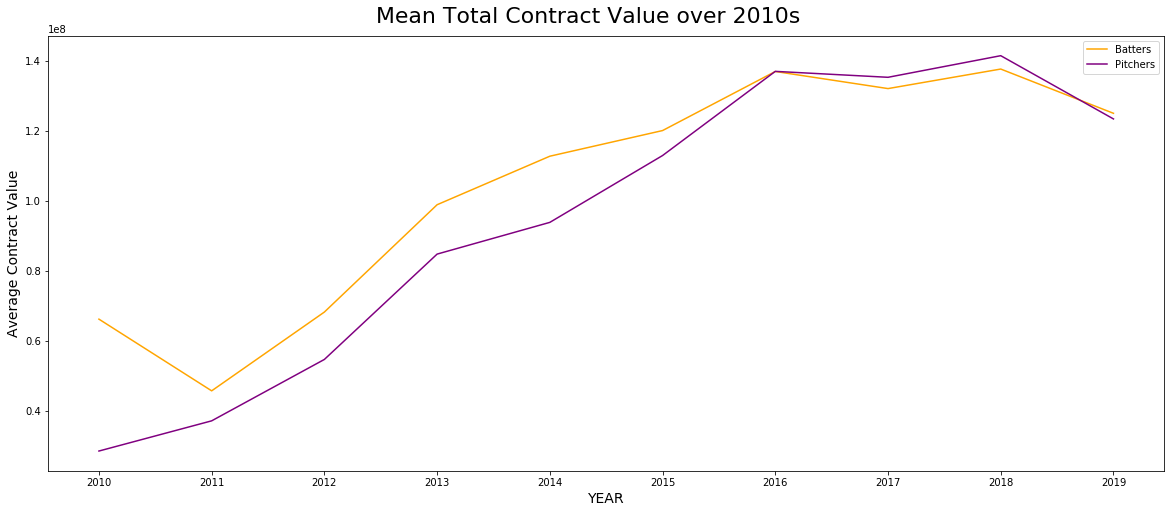

In [386]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.plot("In_The_Year", "Batter", color="orange", data=over_the_years, label="Batters")
ax.plot("In_The_Year", "Pitcher", color="purple", data=over_the_years, label="Pitchers")
ax.set_ylabel("Average Contract Value", fontsize=14)
ax.set_xlabel("YEAR", fontsize=14)
ax.set_xticks(np.arange(2010, 2020, 1))
ax.legend()
plt.suptitle("Mean Total Contract Value over 2010s", fontsize=22, y=0.93)
plt.savefig("MeanTotalContractValueForTop50.png")

Text(0.5, 0.92, 'Payroll over 2010s')

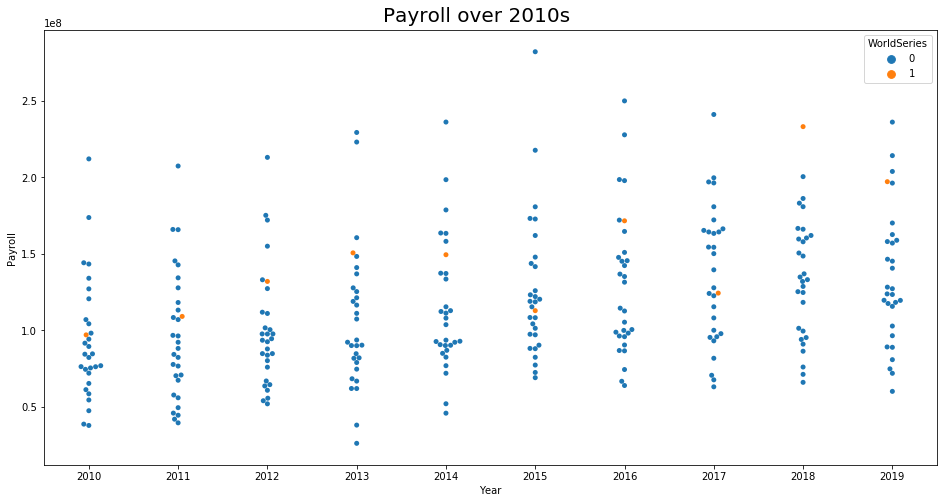

In [269]:
fig, ax  = plt.subplots(1, 1, figsize=(16, 8))
sns.swarmplot(x="Year", y="Payroll", hue="WorldSeries", data=master_team_df_2, ax=ax)
fig.suptitle("Payroll over 2010s", y=.92, fontsize=20)

Text(0.5, 0.92, 'Payroll over 2010s')

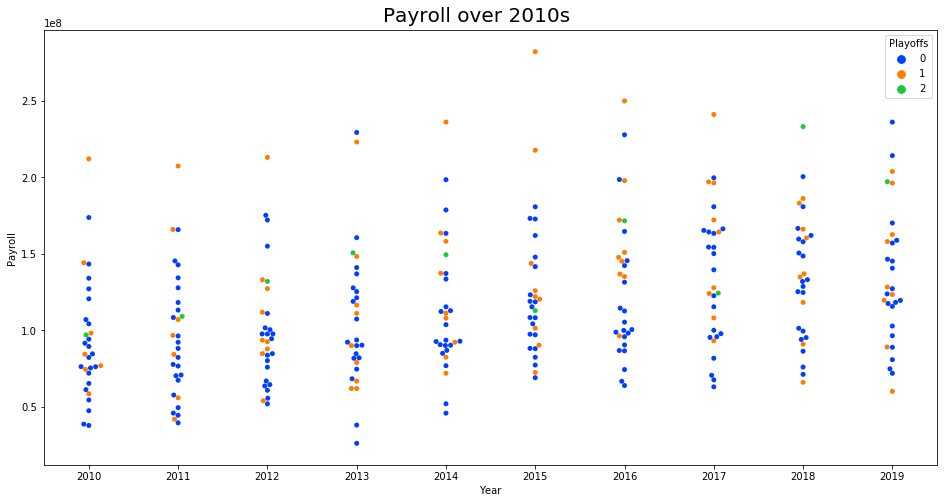

In [270]:
fig, ax  = plt.subplots(1, 1, figsize=(16, 8))
m_team_df2 = master_team_df_2.assign(Playoffs = lambda x: x.DIVISON + x.WILDCARD + x.WorldSeries)
sns.swarmplot(x="Year", y="Payroll", hue="Playoffs", palette="bright", data=m_team_df2, ax=ax)
fig.suptitle("Payroll over 2010s", y=.92, fontsize=20)

In [271]:
revised_fifty_bats_v3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 2 to 511
Data columns (total 34 columns):
Name                  95 non-null object
YearSigned            95 non-null int64
Tm                    95 non-null object
Position              95 non-null object
Salary                95 non-null int64
Salary(total)         95 non-null int64
AVG ANNUAL            95 non-null int64
Pitcher?              95 non-null int64
ContractLength        95 non-null int64
Year                  95 non-null int64
Age                   95 non-null int64
Tm                    95 non-null object
G                     95 non-null int64
PA                    95 non-null int64
AB                    95 non-null int64
R                     95 non-null int64
H                     95 non-null int64
HR                    95 non-null int64
RBI                   95 non-null int64
SO                    95 non-null int64
BA                    95 non-null float64
OBP                   95 non-null float64
SLG     

In [272]:
revised_fifty_pitch_v4 = revised_fifty_pitch_v3.drop(353)

Text(0.5, 0.93, 'Age over 2010s')

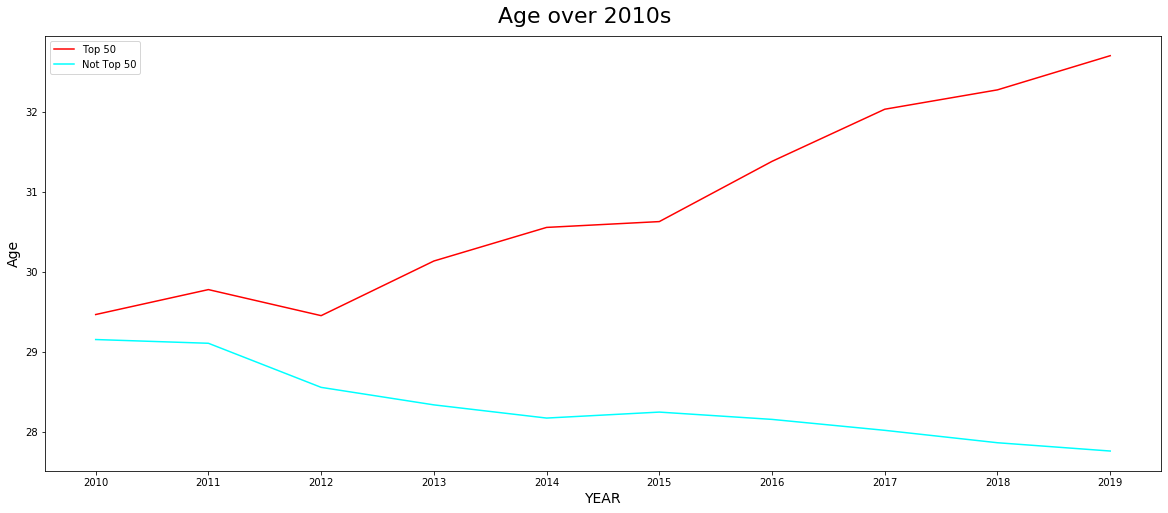

In [273]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.plot("Year", "Age", color="red", data=fifty_over_decade, label="Top 50")
ax.plot("Year", "Age", color="cyan", data=fifty_over_decade_not, label="Not Top 50")
ax.set_ylabel("Age", fontsize=14)
ax.set_xlabel("YEAR", fontsize=14)
ax.set_xticks(np.arange(2010, 2020, 1))
ax.legend()
plt.suptitle("Age over 2010s", fontsize=22, y=0.93)

In [274]:
fifty_over_decade.columns

Index(['Year', 'Age', 'H', 'R', 'AB', 'RBI', 'SO', 'HR', 'BA', 'OPS', 'WAR',
       'Salary'],
      dtype='object')

In [275]:
fifty_over_decade_p.columns.values[0]

'Year'

In [276]:
def liner(df1, df2):
    subplots = len(df1.columns.values) 
    fig, axes = plt.subplots(int(subplots/2), 2, figsize=(55, 50))
    counter=0
    counting = 1
    for axe in axes:
        for ax, n  in zip(axe, np.arange(0, subplots)):
            if counter % 2 == 0 and n!=0:
                muly = 2^counting
                y = df1.columns.values[n+muly]
            else:
                y = df1.columns.values[n]
            ax.plot("Year", y, color="red", data=df1, label="Top 50")
            ax.plot("Year", y, color="cyan", data=df2, label="Not Top 50")
            ax.set_ylabel(f"{y}", fontsize=14)
            ax.set_xlabel("Year", fontsize=14)
            ax.set_xticks(np.arange(2010, 2020, 1))
            ax.set_title(f"{y} over 2010s", fontsize=22, y=1)
            ax.legend()
            counter+=1
            counting+=1
    plt.suptitle(f"Batters over 2010s", fontsize=28, y=0.93)

In [277]:
0 % 2

0

In [278]:
#liner(fifty_over_decade, fifty_over_decade_not)

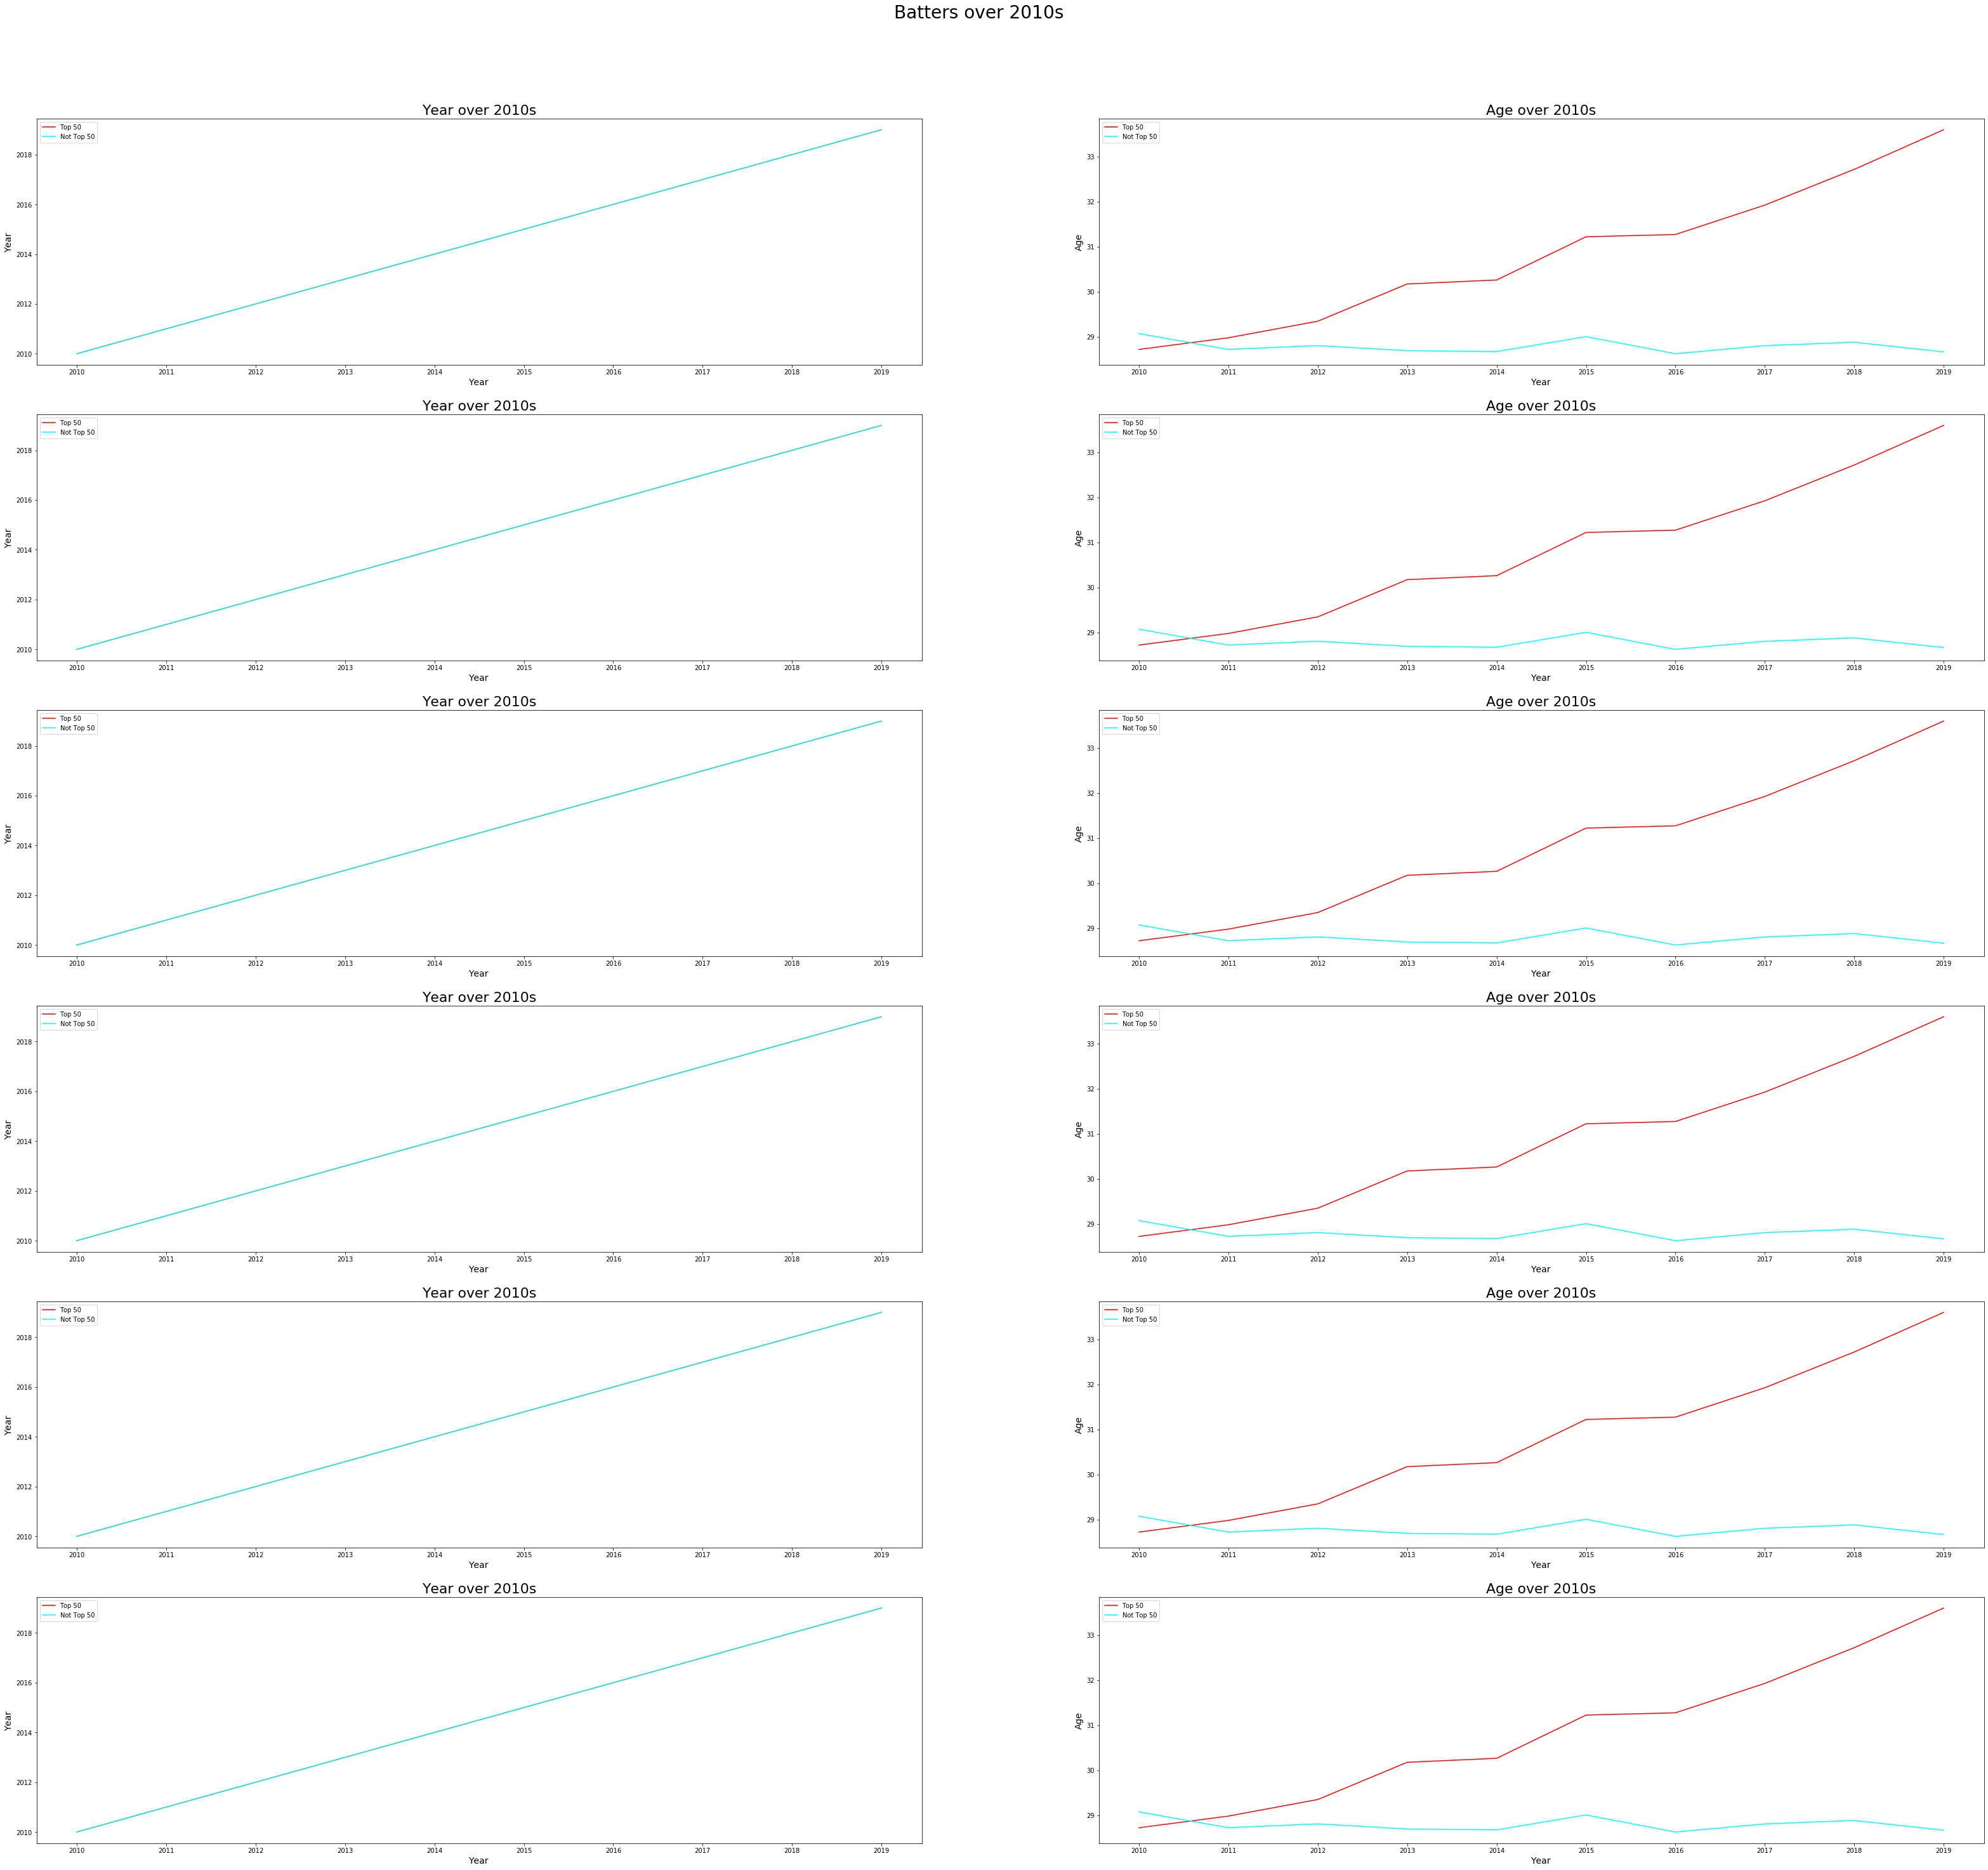

In [279]:
liner(fifty_over_decade_p, fifty_over_decade_not_p)

C:\Users\Kyle\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Second argument 'H' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  
C:\Users\Kyle\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Second argument 'H' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  This is separate from the ipykernel package so we can avoid doing imports until


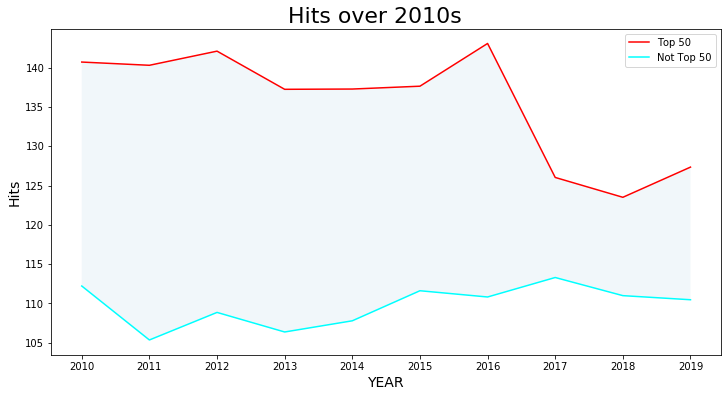

In [280]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot("Year", "H", color="red", data=fifty_over_decade, label="Top 50")
ax.plot("Year", "H", color="cyan", data=fifty_over_decade_not, label="Not Top 50")
ax.set_ylabel("Hits", fontsize=14)
ax.set_xlabel("YEAR", fontsize=14)
ax.set_xticks(np.arange(2010, 2020, 1))
ax.legend()
plt.suptitle("Hits over 2010s", fontsize=22, y=0.93)
plt.fill_between(fifty_over_decade["Year"], fifty_over_decade["H"], fifty_over_decade_not["H"], alpha=0.06)

C:\Users\Kyle\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  
C:\Users\Kyle\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Second argument 'R' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  
C:\Users\Kyle\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Second argument 'R' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  This is separate from the ipykernel package so we can avoid doing imports until


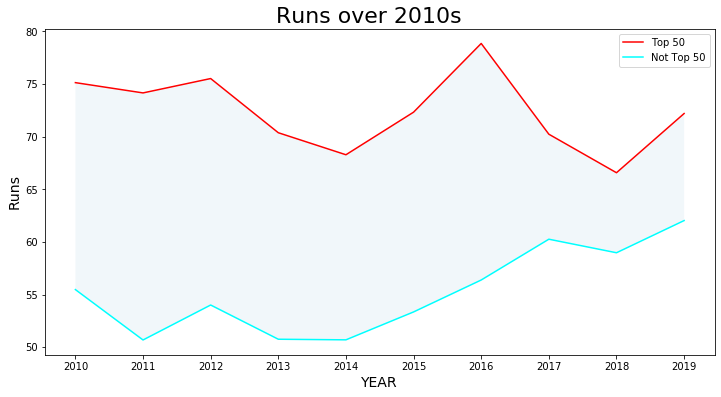

In [281]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot("Year", "R", color="red", data=fifty_over_decade, label="Top 50")
ax.plot("Year", "R", color="cyan", data=fifty_over_decade_not, label="Not Top 50")
ax.set_ylabel("Runs", fontsize=14)
ax.set_xlabel("YEAR", fontsize=14)
ax.set_xticks(np.arange(2010, 2020, 1))
ax.legend()
plt.suptitle("Runs over 2010s", fontsize=22, y=0.93)
plt.fill_between(fifty_over_decade["Year"], fifty_over_decade["R"], fifty_over_decade_not["R"], alpha=0.06)

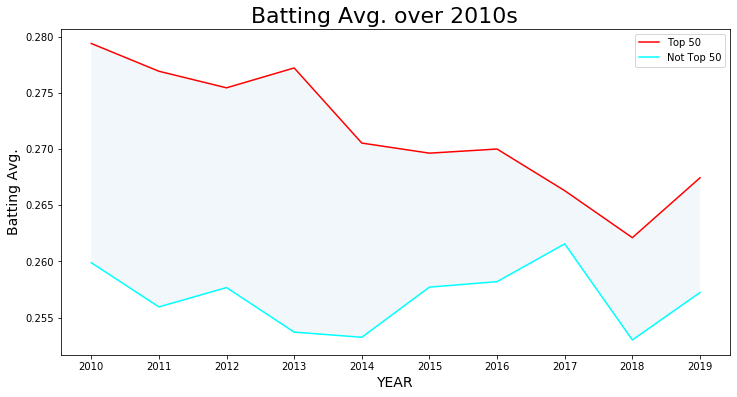

In [282]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot("Year", "BA", color="red", data=fifty_over_decade, label="Top 50")
ax.plot("Year", "BA", color="cyan", data=fifty_over_decade_not, label="Not Top 50")
ax.set_ylabel("Batting Avg.", fontsize=14)
ax.set_xlabel("YEAR", fontsize=14)
ax.set_xticks(np.arange(2010, 2020, 1))
ax.legend()
plt.suptitle("Batting Avg. over 2010s", fontsize=22, y=0.93)
plt.fill_between(fifty_over_decade["Year"], fifty_over_decade["BA"], fifty_over_decade_not["BA"], alpha=0.06)

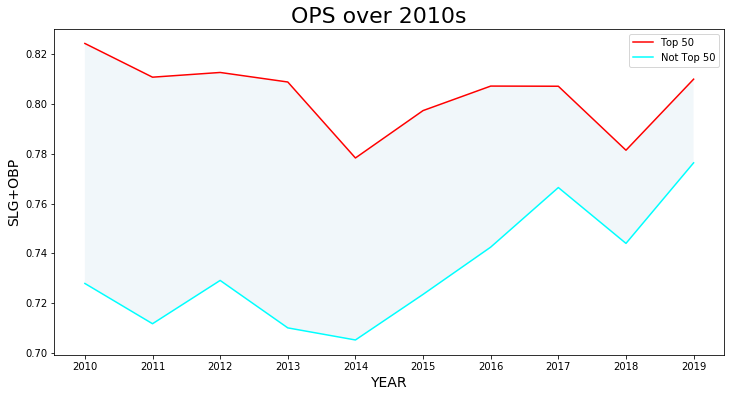

In [283]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot("Year", "OPS", color="red", data=fifty_over_decade, label="Top 50")
ax.plot("Year", "OPS", color="cyan", data=fifty_over_decade_not, label="Not Top 50")
ax.set_ylabel("SLG+OBP", fontsize=14)
ax.set_xlabel("YEAR", fontsize=14)
ax.set_xticks(np.arange(2010, 2020, 1))
ax.legend()
plt.suptitle("OPS over 2010s", fontsize=22, y=0.93)
plt.fill_between(fifty_over_decade["Year"], fifty_over_decade["OPS"], fifty_over_decade_not["OPS"], alpha=0.06)

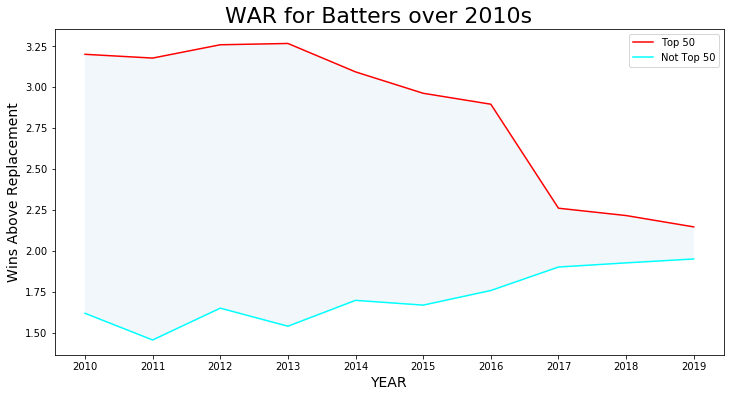

In [412]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot("Year", "WAR", color="red", data=fifty_over_decade, label="Top 50")
ax.plot("Year", "WAR", color="cyan", data=fifty_over_decade_not, label="Not Top 50")
ax.set_ylabel("Wins Above Replacement", fontsize=14)
ax.set_xlabel("YEAR", fontsize=14)
ax.set_xticks(np.arange(2010, 2020, 1))
ax.legend()
plt.suptitle("WAR for Batters over 2010s", fontsize=22, y=0.93)
plt.fill_between(fifty_over_decade["Year"], fifty_over_decade["WAR"], fifty_over_decade_not["WAR"], alpha=0.06)
plt.savefig("WARforBatters2010s_2.png")

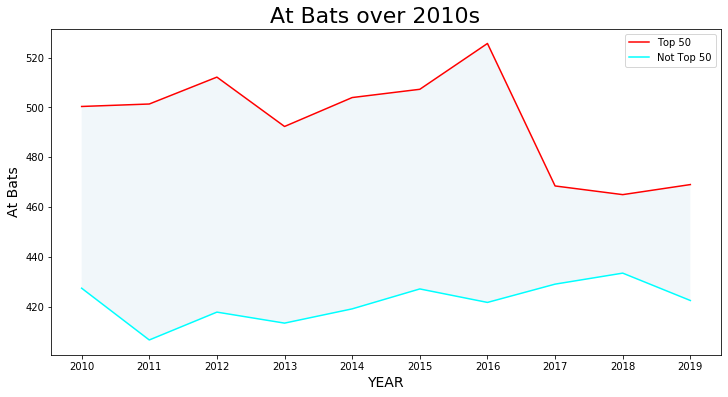

In [285]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot("Year", "AB", color="red", data=fifty_over_decade, label="Top 50")
ax.plot("Year", "AB", color="cyan", data=fifty_over_decade_not, label="Not Top 50")
ax.set_ylabel("At Bats", fontsize=14)
ax.set_xlabel("YEAR", fontsize=14)
ax.set_xticks(np.arange(2010, 2020, 1))
ax.legend()
plt.suptitle("At Bats over 2010s", fontsize=22, y=0.93)
plt.fill_between(fifty_over_decade["Year"], fifty_over_decade["AB"], fifty_over_decade_not["AB"], alpha=0.06)

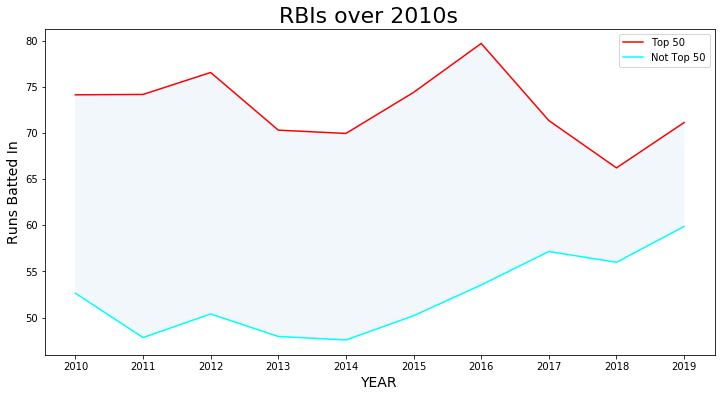

In [286]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot("Year", "RBI", color="red", data=fifty_over_decade, label="Top 50")
ax.plot("Year", "RBI", color="cyan", data=fifty_over_decade_not, label="Not Top 50")
ax.set_ylabel("Runs Batted In", fontsize=14)
ax.set_xlabel("YEAR", fontsize=14)
ax.set_xticks(np.arange(2010, 2020, 1))
ax.legend()
plt.suptitle("RBIs over 2010s", fontsize=22, y=0.93)
plt.fill_between(fifty_over_decade["Year"], fifty_over_decade["RBI"], fifty_over_decade_not["RBI"], alpha=0.06)

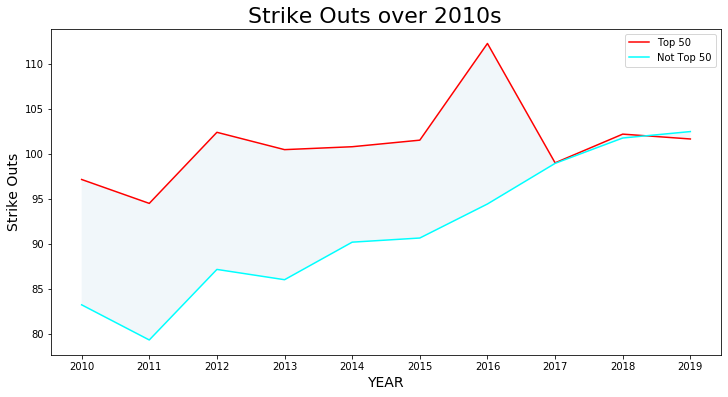

In [287]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot("Year", "SO", color="red", data=fifty_over_decade, label="Top 50")
ax.plot("Year", "SO", color="cyan", data=fifty_over_decade_not, label="Not Top 50")
ax.set_ylabel("Strike Outs", fontsize=14)
ax.set_xlabel("YEAR", fontsize=14)
ax.set_xticks(np.arange(2010, 2020, 1))
ax.legend()
plt.suptitle("Strike Outs over 2010s", fontsize=22, y=0.93)
plt.fill_between(fifty_over_decade["Year"], fifty_over_decade["SO"], fifty_over_decade_not["SO"], alpha=0.06)

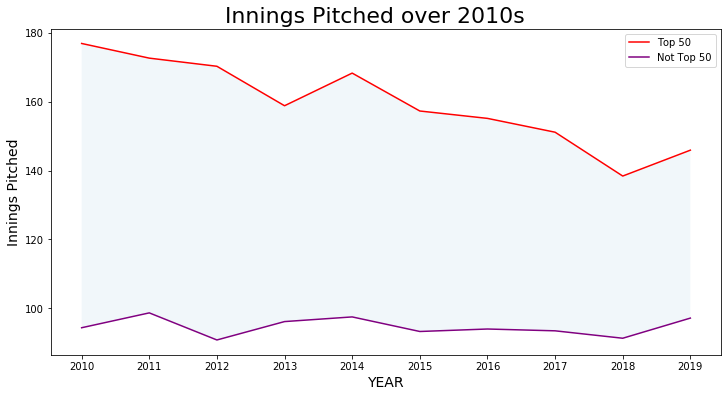

In [288]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot("Year", "IP", color="red", data=fifty_over_decade_p, label="Top 50")
ax.plot("Year", "IP", color="purple", data=fifty_over_decade_not_p, label="Not Top 50")
ax.set_ylabel("Innings Pitched", fontsize=14)
ax.set_xlabel("YEAR", fontsize=14)
ax.set_xticks(np.arange(2010, 2020, 1))
ax.legend()
plt.suptitle("Innings Pitched over 2010s", fontsize=22, y=0.93)
plt.fill_between(fifty_over_decade_p["Year"], fifty_over_decade_p["IP"], fifty_over_decade_not_p["IP"], alpha=0.06)

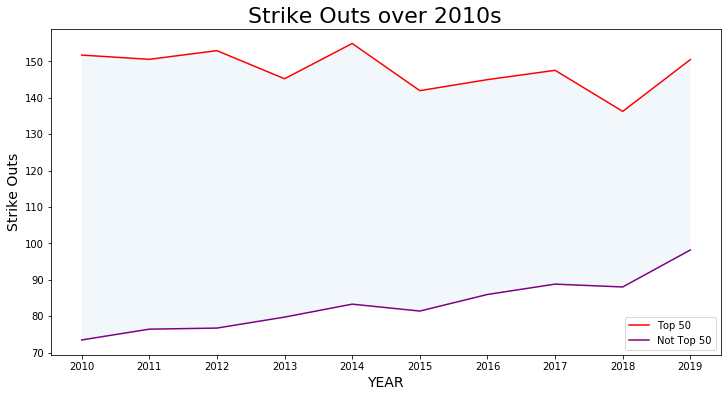

In [289]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot("Year", "SO", color="red", data=fifty_over_decade_p, label="Top 50")
ax.plot("Year", "SO", color="purple", data=fifty_over_decade_not_p, label="Not Top 50")
ax.set_ylabel("Strike Outs", fontsize=14)
ax.set_xlabel("YEAR", fontsize=14)
ax.set_xticks(np.arange(2010, 2020, 1))
ax.legend()
plt.suptitle("Strike Outs over 2010s", fontsize=22, y=0.93)
plt.fill_between(fifty_over_decade_p["Year"], fifty_over_decade_p["SO"], fifty_over_decade_not_p["SO"], alpha=0.06)

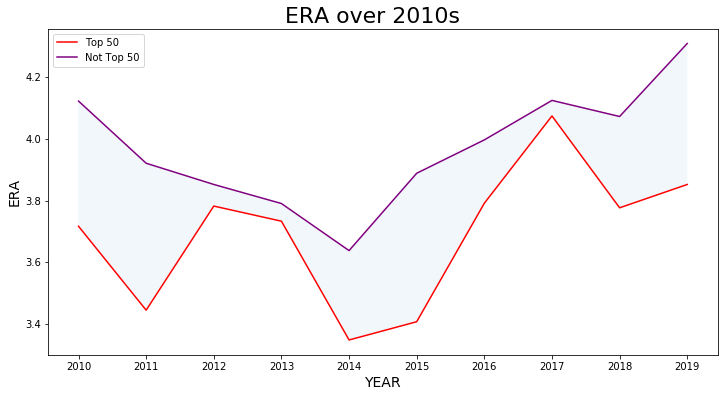

In [290]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot("Year", "ERA", color="red", data=fifty_over_decade_p, label="Top 50")
ax.plot("Year", "ERA", color="purple", data=fifty_over_decade_not_p, label="Not Top 50")
ax.set_ylabel("ERA", fontsize=14)
ax.set_xlabel("YEAR", fontsize=14)
ax.set_xticks(np.arange(2010, 2020, 1))
ax.legend()
plt.suptitle("ERA over 2010s", fontsize=22, y=0.93)
plt.fill_between(fifty_over_decade_p["Year"], fifty_over_decade_p["ERA"], fifty_over_decade_not_p["ERA"], alpha=0.06)

C:\Users\Kyle\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  
C:\Users\Kyle\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Second argument 'W' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  
C:\Users\Kyle\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Second argument 'W' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  This is separate from the ipykernel package so we can avoid doing imports until


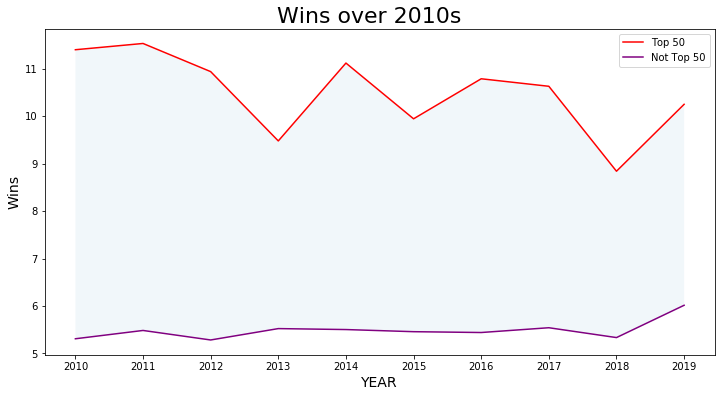

In [291]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot("Year", "W", color="red", data=fifty_over_decade_p, label="Top 50")
ax.plot("Year", "W", color="purple", data=fifty_over_decade_not_p, label="Not Top 50")
ax.set_ylabel("Wins", fontsize=14)
ax.set_xlabel("YEAR", fontsize=14)
ax.set_xticks(np.arange(2010, 2020, 1))
ax.legend()
plt.suptitle("Wins over 2010s", fontsize=22, y=0.93)
plt.fill_between(fifty_over_decade_p["Year"], fifty_over_decade_p["W"], fifty_over_decade_not_p["W"], alpha=0.06)

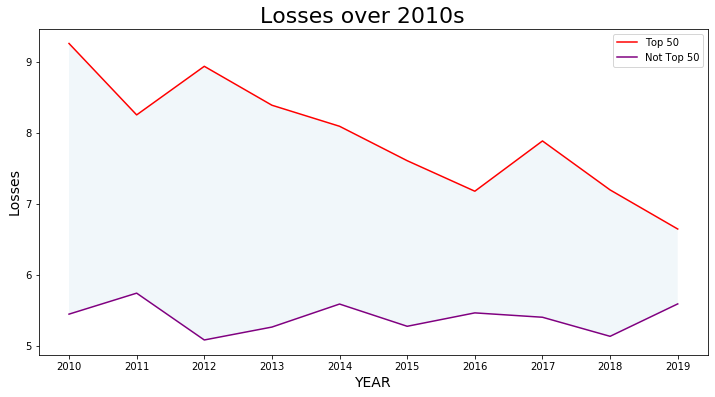

In [292]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot("Year", "L", color="red", data=fifty_over_decade_p, label="Top 50")
ax.plot("Year", "L", color="purple", data=fifty_over_decade_not_p, label="Not Top 50")
ax.set_ylabel("Losses", fontsize=14)
ax.set_xlabel("YEAR", fontsize=14)
ax.set_xticks(np.arange(2010, 2020, 1))
ax.legend()
plt.suptitle("Losses over 2010s", fontsize=22, y=0.93)
plt.fill_between(fifty_over_decade_p["Year"], fifty_over_decade_p["L"], fifty_over_decade_not_p["L"], alpha=0.06)

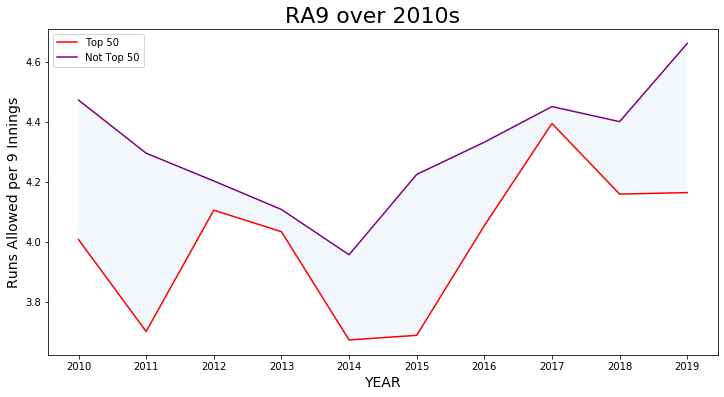

In [293]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot("Year", "RA9", color="red", data=fifty_over_decade_p, label="Top 50")
ax.plot("Year", "RA9", color="purple", data=fifty_over_decade_not_p, label="Not Top 50")
ax.set_ylabel("Runs Allowed per 9 Innings", fontsize=14)
ax.set_xlabel("YEAR", fontsize=14)
ax.set_xticks(np.arange(2010, 2020, 1))
ax.legend()
plt.suptitle("RA9 over 2010s", fontsize=22, y=0.93)
plt.fill_between(fifty_over_decade_p["Year"], fifty_over_decade_p["RA9"], fifty_over_decade_not_p["RA9"], alpha=0.06)

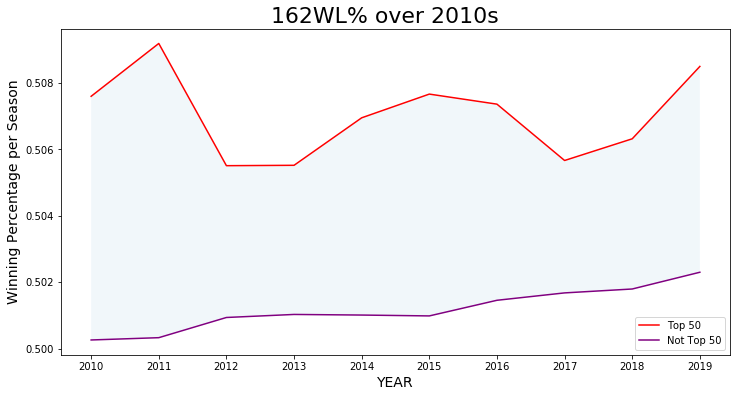

In [294]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot("Year", "162WL%", color="red", data=fifty_over_decade_p, label="Top 50")
ax.plot("Year", "162WL%", color="purple", data=fifty_over_decade_not_p, label="Not Top 50")
ax.set_ylabel("Winning Percentage per Season", fontsize=14)
ax.set_xlabel("YEAR", fontsize=14)
ax.set_xticks(np.arange(2010, 2020, 1))
ax.legend()
plt.suptitle("162WL% over 2010s", fontsize=22, y=0.93)
plt.fill_between(fifty_over_decade_p["Year"], fifty_over_decade_p["162WL%"], fifty_over_decade_not_p["162WL%"], alpha=0.06)

Text(0.5, 0.93, 'WAA over 2010s')

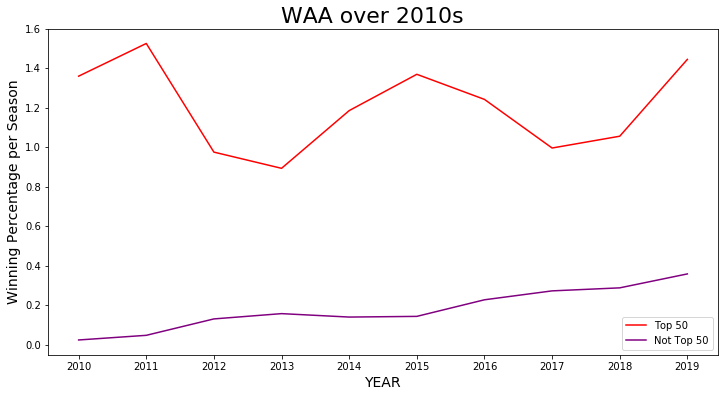

In [295]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot("Year", "WAA", color="red", data=fifty_over_decade_p, label="Top 50")
ax.plot("Year", "WAA", color="purple", data=fifty_over_decade_not_p, label="Not Top 50")
ax.set_ylabel("Winning Percentage per Season", fontsize=14)
ax.set_xlabel("YEAR", fontsize=14)
ax.set_xticks(np.arange(2010, 2020, 1))
ax.legend()
plt.suptitle("WAA over 2010s", fontsize=22, y=0.93)

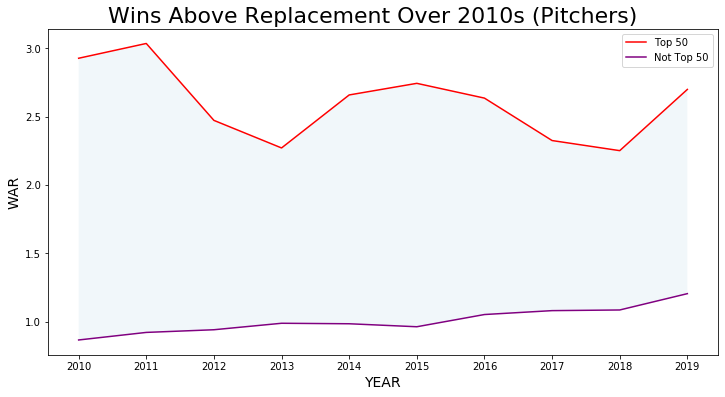

In [296]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot("Year", "WAR", color="red", data=fifty_over_decade_p, label="Top 50")
ax.plot("Year", "WAR", color="purple", data=fifty_over_decade_not_p, label="Not Top 50")
ax.set_ylabel("WAR", fontsize=14)
ax.set_xlabel("YEAR", fontsize=14)
ax.set_xticks(np.arange(2010, 2020, 1))
ax.legend()
plt.suptitle("Wins Above Replacement Over 2010s (Pitchers)", fontsize=22, y=0.93)
plt.fill_between(fifty_over_decade_p["Year"], fifty_over_decade_p["WAR"], fifty_over_decade_not_p["WAR"], alpha=0.06)

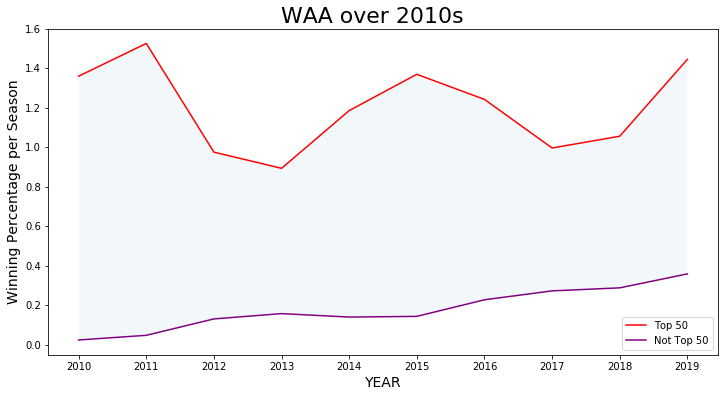

In [297]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot("Year", "WAA", color="red", data=fifty_over_decade_p, label="Top 50")
ax.plot("Year", "WAA", color="purple", data=fifty_over_decade_not_p, label="Not Top 50")
ax.set_ylabel("Winning Percentage per Season", fontsize=14)
ax.set_xlabel("YEAR", fontsize=14)
ax.set_xticks(np.arange(2010, 2020, 1))
ax.legend()
plt.suptitle("WAA over 2010s", fontsize=22, y=0.93)
plt.fill_between(fifty_over_decade_p["Year"], fifty_over_decade_p.WAA, fifty_over_decade_not_p.WAA, alpha=0.06)

In [298]:
fifty_over_decade_p.WAA

0    1.360000
1    1.525532
2    0.975510
3    0.893478
4    1.185714
5    1.369444
6    1.242424
7    0.996296
8    1.056000
9    1.445000
Name: WAA, dtype: float64

In [299]:
fifty_over_decade_not_p.WAA

0    0.024528
1    0.048062
2    0.131128
3    0.157875
4    0.140511
5    0.143985
6    0.227941
7    0.273077
8    0.288380
9    0.358935
Name: WAA, dtype: float64

In [300]:
fifty_over_decade.WAR

0    3.201389
1    3.178378
2    3.259722
3    3.267606
4    3.093939
5    2.963333
6    2.896491
7    2.261111
8    2.216279
9    2.147059
Name: WAR, dtype: float64

In [301]:
fifty_over_decade_not.WAR

0    1.619000
1    1.456132
2    1.650481
3    1.540179
4    1.698165
5    1.669014
6    1.758333
7    1.901709
8    1.927155
9    1.951004
Name: WAR, dtype: float64

In [302]:
fifty_over_decade.WAR - fifty_over_decade_not.WAR

0    1.582389
1    1.722246
2    1.609241
3    1.727427
4    1.395774
5    1.294319
6    1.138158
7    0.359402
8    0.289124
9    0.196055
Name: WAR, dtype: float64

In [303]:
fifty_over_decade_p.WAA - fifty_over_decade_not_p.WAA

0    1.335472
1    1.477470
2    0.844382
3    0.735603
4    1.045203
5    1.225459
6    1.014483
7    0.723219
8    0.767620
9    1.086065
Name: WAA, dtype: float64

In [304]:
## Batters
fifty_over_decade.pct_change()

Year       Age         H         R        AB       RBI        SO  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1  0.000498  0.010571 -0.002924 -0.012999  0.001977  0.000501 -0.027305   
2  0.000497 -0.010927  0.012831  0.018414  0.021517  0.032085  0.083480   
3  0.000497  0.023169 -0.034182 -0.068154 -0.038660 -0.081601 -0.018792   
4  0.000497  0.013927  0.000250 -0.029730  0.023567 -0.005070  0.003216   
5  0.000497  0.002380  0.002638  0.059241  0.006575  0.063540  0.007231   
6  0.000496  0.024569  0.039504  0.090226  0.036239  0.071264  0.105687   
7  0.000496  0.020744 -0.119162 -0.109294 -0.108751 -0.104800 -0.118006   
8  0.000496  0.007555 -0.020037 -0.052097 -0.007421 -0.071832  0.032182   
9  0.000496  0.013223  0.031101  0.084475  0.008678  0.074134 -0.005275   

         HR        BA       OPS       WAR    Salary  
0       NaN       NaN       NaN       NaN       NaN  
1 -0.000965 -0.008841 -0.016437 -0.007188  0.061116  
2  0.049777 -0.005325  0.002339  0.025593 -0.064900  
3 -0.087523  0.006414 -0.004720  0.002418  0.121032  
4 -0.087877 -0.024101 -0.037743 -0.053148  0.161482  
5  0.189700 -0.003316  0.024472 -0.042214  0.071556  
6  0.134503  0.001360  0.012345 -0.022556  0.129479  
7 -0.103011 -0.013717 -0.000078 -0.219362  0.125783  
8 -0.130507 -0.015697 -0.031855 -0.019827  0.022109  
9  0.163403  0.020315  0.036539 -0.031233  0.014041

In [305]:
fifty_over_decade_not.pct_change()

Year       Age         H         R        AB       RBI        SO  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1  0.000498 -0.001605 -0.061185 -0.086276 -0.048582 -0.091199 -0.046858   
2  0.000497 -0.018916  0.033286  0.065512  0.027482  0.053406  0.098668   
3  0.000497 -0.007659 -0.022874 -0.060188 -0.010568 -0.048391 -0.013098   
4  0.000497 -0.005816  0.013378 -0.001122  0.013833 -0.007876  0.048424   
5  0.000497  0.002648  0.035495  0.052269  0.019073  0.055155  0.005100   
6  0.000496 -0.003229 -0.007124  0.056854 -0.012668  0.066421  0.041662   
7  0.000496 -0.004852  0.022367  0.068710  0.017390  0.067691  0.047715   
8  0.000496 -0.005529 -0.020368 -0.021348  0.010298 -0.020341  0.028443   
9  0.000496 -0.003718 -0.004701  0.051844 -0.025336  0.069165  0.007032   

         HR        BA       OPS       WAR        Salary  
0       NaN       NaN       NaN       NaN           NaN  
1 -0.097639 -0.015131 -0.022231 -0.100598 -3.311895e-02  
2  0.184896  0.006721  0.024446  0.133469  8.459333e-07  
3 -0.091928 -0.015382 -0.026154 -0.066830  4.226554e-02  
4 -0.064039 -0.001803 -0.006841  0.102577  8.688820e-02  
5  0.157861  0.017616  0.025984 -0.017166  1.709228e-01  
6  0.186972  0.001876  0.026248  0.053516 -2.946456e-02  
7  0.139994  0.013022  0.032250  0.081541  2.509056e-02  
8 -0.056048 -0.032676 -0.029285  0.013380  1.093006e-01  
9  0.198633  0.016678  0.043517  0.012375 -6.032642e-02

In [306]:
fifty_over_decade_p.pct_change()

Year       Age        IP        SO       ERA         W         L  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1  0.000498  0.009008 -0.024050 -0.007681 -0.073163  0.011571 -0.108497   
2  0.000497  0.012706 -0.013678  0.015837  0.097936 -0.051435  0.082790   
3  0.000497  0.028179 -0.067229 -0.050471 -0.012955 -0.133517 -0.061247   
4  0.000497  0.002916  0.059609  0.066714 -0.103119  0.173111 -0.035283   
5  0.000497  0.031734 -0.065319 -0.083628  0.017660 -0.105639 -0.059804   
6  0.000496  0.001618 -0.013611  0.021327  0.112699  0.084815 -0.056403   
7  0.000496  0.020887 -0.025837  0.017625  0.074610 -0.014669  0.098453   
8  0.000496  0.024872 -0.084122 -0.076416 -0.073065 -0.168362 -0.087324   
9  0.000496  0.026895  0.054221  0.104344  0.020019  0.159502 -0.076389   

        RA9    162WL%       WAA       WAR    Salary  
0       NaN       NaN       NaN       NaN       NaN  
1 -0.076404  0.003135  0.121715  0.036943 -0.044364  
2  0.109177 -0.007230 -0.360544 -0.185332  0.115913  
3 -0.017452  0.000023 -0.084091 -0.081558  0.106147  
4 -0.089417  0.002830  0.327077  0.170699  0.145067  
5  0.004203  0.001409  0.154953  0.031931  0.099048  
6  0.099043 -0.000597 -0.092753 -0.039382  0.215126  
7  0.083973 -0.003345 -0.198103 -0.117752  0.233457  
8 -0.053555  0.001292  0.059926 -0.031783 -0.028881  
9  0.001226  0.004306  0.368371  0.198934 -0.018950

In [307]:
fifty_over_decade_not_p.pct_change()

Year       Age        IP        SO       ERA         W         L  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1  0.000498 -0.012066  0.045643  0.040367 -0.048868  0.032972  0.054143   
2  0.000497  0.002943 -0.079583  0.003891 -0.017545 -0.036548 -0.114572   
3  0.000497 -0.003928  0.058697  0.039253 -0.016035  0.045375  0.035675   
4  0.000497 -0.000724  0.014057  0.044565 -0.040249 -0.003650  0.061435   
5  0.000497  0.011587 -0.043319 -0.022748  0.068902 -0.008177 -0.055932   
6  0.000496 -0.013059  0.007697  0.055945  0.027807 -0.003200  0.035713   
7  0.000496  0.006260 -0.005576  0.032973  0.032011  0.018522 -0.011241   
8  0.000496  0.002641 -0.022997 -0.008733 -0.012645 -0.037433 -0.049592   
9  0.000496 -0.007440  0.063921  0.115384  0.058121  0.127604  0.088723   

        RA9    162WL%       WAA       WAR    Salary  
0       NaN       NaN       NaN       NaN       NaN  
1 -0.039575  0.000138  0.959451  0.063799 -0.086474  
2 -0.021541  0.001216  1.728317  0.021192  0.040142  
3 -0.022599  0.000183  0.203976  0.050313  0.043581  
4 -0.036714 -0.000037 -0.109989 -0.003650  0.151025  
5  0.067617 -0.000052  0.024724 -0.022192  0.146818  
6  0.025412  0.000940  0.583090  0.092791 -0.039821  
7  0.027400  0.000444  0.198015  0.027093  0.046415  
8 -0.011276  0.000234  0.056040  0.004438  0.046980  
9  0.059176  0.001006  0.244660  0.109951 -0.003610

Text(0.5, 0.93, 'Salary Growth vs. Year')

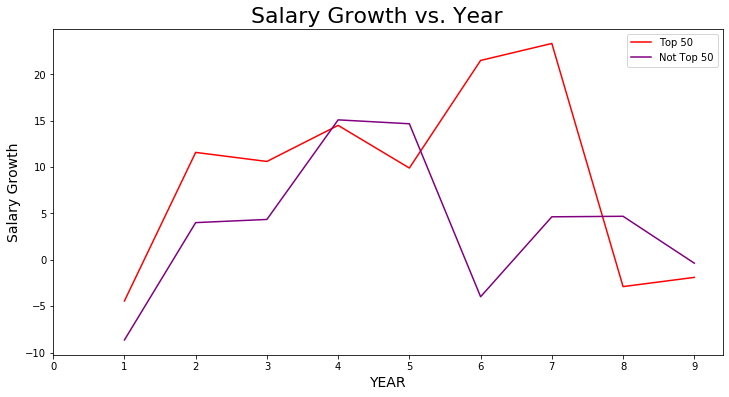

In [308]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot("Salary", color="red", data=(fifty_over_decade_p.pct_change()*100), label="Top 50")
ax.plot("Salary", color="purple", data=(fifty_over_decade_not_p.pct_change()*100), label="Not Top 50")
ax.set_ylabel("Salary Growth", fontsize=14)
ax.set_xlabel("YEAR", fontsize=14)
ax.set_xticks(np.arange(0, 10, 1))
ax.legend()
plt.suptitle("Salary Growth vs. Year", fontsize=22, y=0.93)

Text(0.5, 0.93, 'Salary Growth vs. Year')

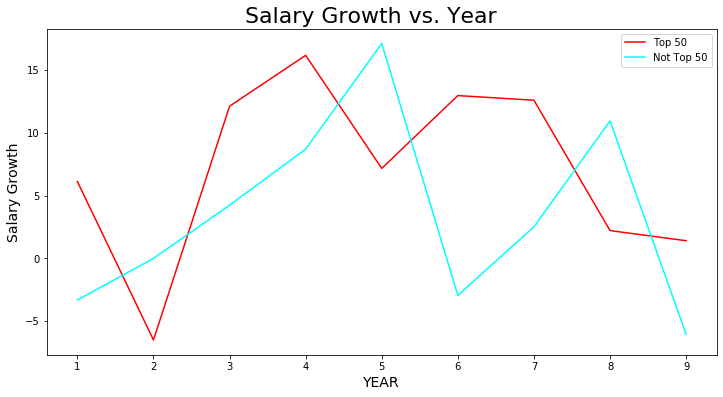

In [309]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot("Salary", color="red", data=(fifty_over_decade.pct_change()*100), label="Top 50")
ax.plot("Salary", color="cyan", data=(fifty_over_decade_not.pct_change()*100), label="Not Top 50")
ax.set_ylabel("Salary Growth", fontsize=14)
ax.set_xlabel("YEAR", fontsize=14)
ax.set_xticks(np.arange(1, 10, 1))
ax.legend()
plt.suptitle("Salary Growth vs. Year", fontsize=22, y=0.93)

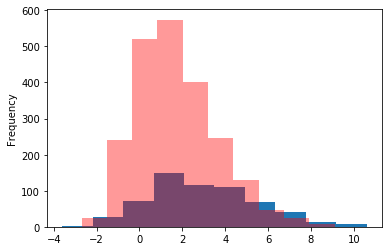

In [310]:
#batters_in_50.groupby("Year").WAR.plot(kind="hist")
batters_in_50.WAR.plot(kind="hist")
batters_not_in_50.WAR.plot(kind="hist", color="red", alpha=0.4)

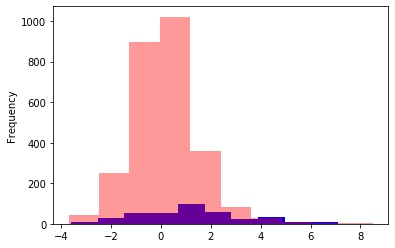

In [311]:
pitchers_in_50.WAA.plot(kind="hist", color="blue")
pitchers_not_in_50.WAA.plot(kind="hist", color="red", alpha=0.4)

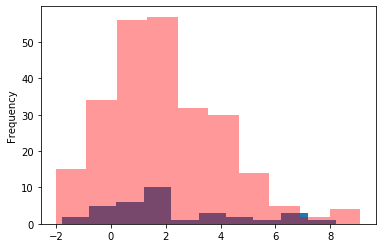

In [312]:
batters_in_50[batters_in_50["Year"] == 2019].WAR.plot(kind="hist")
batters_not_in_50[batters_not_in_50["Year"] == 2019].WAR.plot(kind="hist", color="red", alpha=0.4)

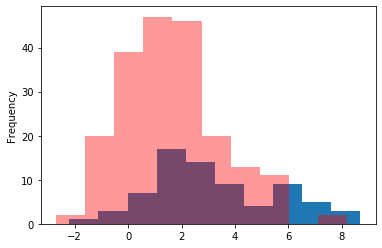

In [313]:
batters_in_50[batters_in_50["Year"] == 2010].WAR.plot(kind="hist")
batters_not_in_50[batters_not_in_50["Year"] == 2010].WAR.plot(kind="hist", color="red", alpha=0.4)

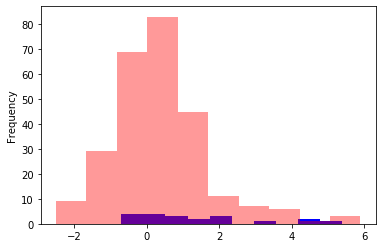

In [314]:
pitchers_in_50[pitchers_in_50["Year"] == 2019].WAA.plot(kind="hist", color="blue")
pitchers_not_in_50[pitchers_not_in_50["Year"] == 2019].WAA.plot(kind="hist", color="red", alpha=0.4)

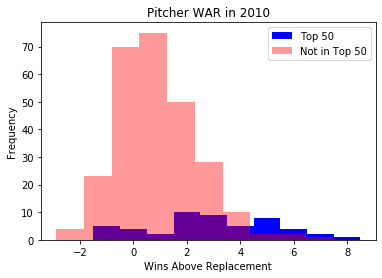

In [400]:
pitchers_in_50[pitchers_in_50["Year"] == 2010].WAR.plot(kind="hist", color="blue", label="Top 50")
pitchers_not_in_50[pitchers_not_in_50["Year"] == 2010].WAR.plot(kind="hist", color="red", alpha=0.4, title='Pitcher WAR in 2010', label="Not in Top 50")
plt.legend()
plt.xlabel("Wins Above Replacement")
plt.savefig("PitcherWAR2010.png")

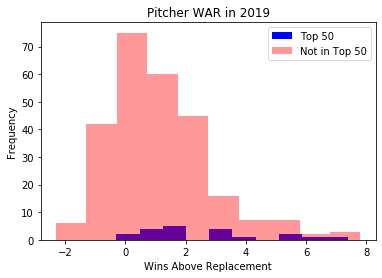

In [401]:
pitchers_in_50[pitchers_in_50["Year"] == 2019].WAR.plot(kind="hist", color="blue", label="Top 50")
pitchers_not_in_50[pitchers_not_in_50["Year"] == 2019].WAR.plot(kind="hist", color="red", alpha=0.4, title='Pitcher WAR in 2019', label="Not in Top 50")
plt.legend()
plt.xlabel("Wins Above Replacement")
plt.savefig("PitcherWAR2019.png")

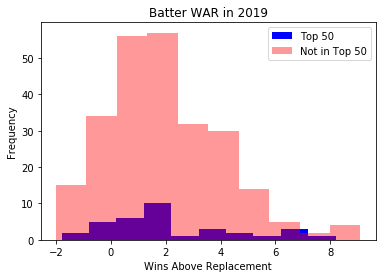

In [413]:
batters_in_50[batters_in_50["Year"] == 2019].WAR.plot(kind="hist", color="blue", label="Top 50")
batters_not_in_50[batters_not_in_50["Year"] == 2019].WAR.plot(kind="hist", color="red", alpha=0.4, title='Batter WAR in 2019', label="Not in Top 50")
plt.legend()
plt.xlabel("Wins Above Replacement")
plt.savefig("BatterWAR2019.png")

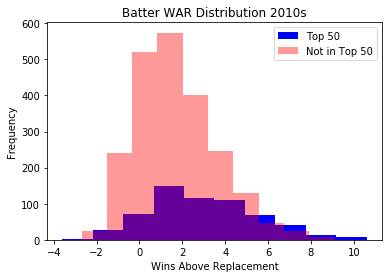

In [407]:
batters_in_50.WAR.plot(kind="hist", color="blue", label="Top 50")
batters_not_in_50.WAR.plot(kind="hist", color="red", alpha=0.4, title='Batter WAR Distribution 2010s', label="Not in Top 50")
plt.legend()
plt.xlabel("Wins Above Replacement")
plt.savefig("BatterWAR201019_v1.png")

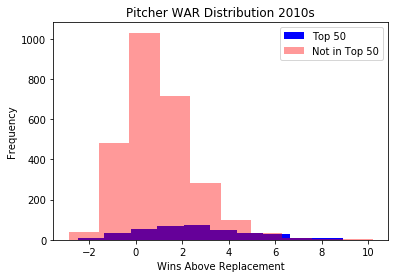

In [406]:
pitchers_in_50.WAR.plot(kind="hist", color="blue", label="Top 50")
pitchers_not_in_50.WAR.plot(kind="hist", color="red", alpha=0.4, title='Pitcher WAR Distribution 2010s', label="Not in Top 50")
plt.legend()
plt.xlabel("Wins Above Replacement")
plt.savefig("PitcherWAR201019_v1.png")

In [318]:
stats.ttest_ind(pitchers_in_50[pitchers_in_50["Year"] == 2010].WAA, pitchers_not_in_50[pitchers_not_in_50["Year"] == 2010].WAA, equal_var=False)

Ttest_indResult(statistic=4.2610375954033275, pvalue=7.91679724217546e-05)

In [319]:
stats.ttest_ind(pitchers_in_50[pitchers_in_50["Year"] == 2019].WAA, pitchers_not_in_50[pitchers_not_in_50["Year"] == 2019].WAA, equal_var=False)

Ttest_indResult(statistic=2.682898537810683, pvalue=0.01403452966196322)

In [320]:
stats.ttest_ind(batters_in_50[batters_in_50["Year"] == 2010].WAR, batters_not_in_50[batters_not_in_50["Year"] == 2010].WAR, equal_var=False)

Ttest_indResult(statistic=5.061782659588478, pvalue=1.8372545431181288e-06)

In [321]:
stats.ttest_ind(batters_in_50[batters_in_50["Year"] == 2019].WAR, batters_not_in_50[batters_not_in_50["Year"] == 2019].WAR, equal_var=False)

Ttest_indResult(statistic=0.4343766050831002, pvalue=0.6663945776853442)

In [322]:
def t_test_per_year (df1, df2, start=2010, stop=2020, statistic="WAR"):
    values = {"t-statistic": [], "P-Value": [], "Year": []}
    for year in np.arange(start, stop, 1):
        t, pvalue = stats.ttest_ind(df1[df1["Year"] == year][statistic], df2[df2["Year"] == year][statistic], equal_var=False)
        values["t-statistic"].append(t)
        values["P-Value"].append(pvalue)
        values["Year"].append(year)
    return values

In [323]:
t_test_per_year(batters_in_50, batters_not_in_50)

{'t-statistic': [5.061782659588478,
  5.34408080801217,
  5.367767822643217,
  5.882947524914263,
  4.514224182225972,
  3.6151727401500477,
  3.231445247115841,
  0.9306305599005256,
  0.6716070929643985,
  0.4343766050831002],
 'P-Value': [1.8372545431181288e-06,
  5.94597545629075e-07,
  5.121471987660828e-07,
  5.216240592455252e-08,
  1.8770161014269803e-05,
  0.0005321922126182065,
  0.0018402736239737114,
  0.35552357124016165,
  0.5049472751615404,
  0.6663945776853442],
 'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]}

In [324]:
t_test_per_year(pitchers_in_50, pitchers_not_in_50, statistic="WAR")

{'t-statistic': [5.909412431086934,
  5.589759073675414,
  4.616876095531213,
  3.3604850193402793,
  4.540925246326695,
  4.3749127117362185,
  3.7074252672922343,
  2.722375102799155,
  2.5978362556771493,
  3.1367469075729377],
 'P-Value': [2.0797741583144157e-07,
  9.019162480471237e-07,
  2.399576972150838e-05,
  0.001483875753470794,
  4.056473540767916e-05,
  8.929025516806254e-05,
  0.0007226194178244943,
  0.010998155065267736,
  0.015102635027228816,
  0.005006549664086275],
 'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]}

In [325]:
pitchers_in_50.columns

Index(['Name', 'Age', 'Tm', 'W', 'L', 'W-L%', 'ERA', 'G', 'GS', 'GF', 'SV',
       'IP', 'H', 'R', 'ER', 'HR', 'BB', 'SO', 'WHIP', 'H9', 'HR9', 'SO9',
       'Year', 'RA9', 'RA9opp', 'RAA', 'WAA', 'WAR', 'RAR', 'waaWL%', '162WL%',
       'Salary', 'Acquired', 'dollar_per_WAA', 'dollar_per_WAr'],
      dtype='object')

In [326]:
top_players = master_top50.drop_duplicates(subset="NAME")

In [397]:
mean_salary_by_position = master_top50.groupby(("In_The_Year", "Pitcher?")).mean()["SALARY"].unstack().reset_index()

C:\Users\Kyle\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


In [398]:
mean_salary_by_position.rename({0: "Batters", 1: "Pitchers"}, axis=1, inplace=True)

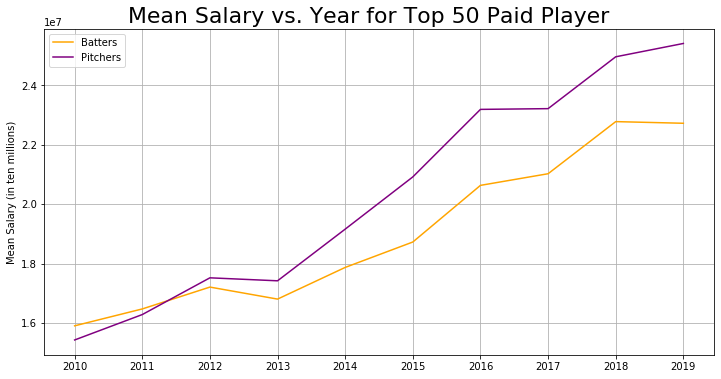

In [504]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot("In_The_Year", "Batters", data=mean_salary_by_position, color="orange")
ax.plot("In_The_Year", "Pitchers", data=mean_salary_by_position, color="purple")
ax.grid()
ax.legend()
ax.set_xticks(np.arange(2010, 2020, 1))
plt.ylabel("Mean Salary (in ten millions)")
plt.suptitle("Mean Salary vs. Year for Top 50 Paid Player", fontsize=22, y=0.93)
plt.savefig("MeanSalaryforTop50OverTime_v2.png")

In [330]:
count_salary_by_position = master_top50.groupby(("In_The_Year", "Pitcher?")).count()["SALARY"].unstack().reset_index()
count_salary_by_position.rename({0: "Batters", 1: "Pitchers"}, axis=1, inplace=True)

C:\Users\Kyle\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


In [331]:
count_salary_by_position

Pitcher?  In_The_Year  Batters  Pitchers
0                2010       30        22
1                2011       31        19
2                2012       30        20
3                2013       31        25
4                2014       30        21
5                2015       31        19
6                2016       31        20
7                2017       33        19
8                2018       32        18
9                2019       30        20

Text(0.5, 0.93, 'Salary Growth vs. Year')

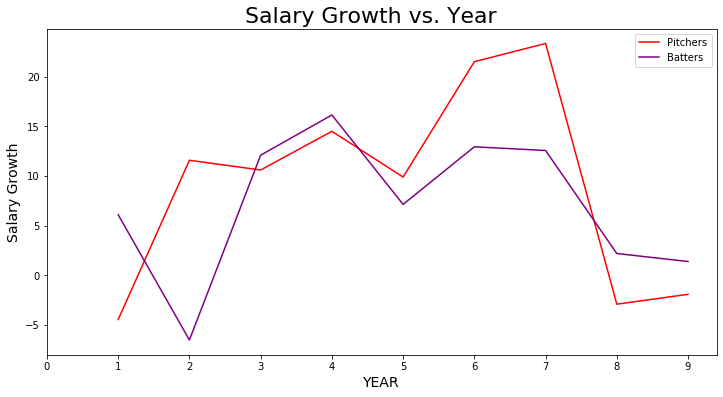

In [332]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot("Salary", color="red", data=(fifty_over_decade_p.pct_change()*100), label="Pitchers")
ax.plot("Salary", color="purple", data=(fifty_over_decade.pct_change()*100), label="Batters")
ax.set_ylabel("Salary Growth", fontsize=14)
ax.set_xlabel("YEAR", fontsize=14)
ax.set_xticks(np.arange(0, 10, 1))
ax.legend()
plt.suptitle("Salary Growth vs. Year", fontsize=22, y=0.93)

In [333]:
fifty_over_decade_p

Year        Age          IP          SO       ERA          W         L  \
0  2010.0  28.720000  176.838000  151.740000  3.716600  11.400000  9.260000   
1  2011.0  28.978723  172.585106  150.574468  3.444681  11.531915  8.255319   
2  2012.0  29.346939  170.224490  152.959184  3.782041  10.938776  8.938776   
3  2013.0  30.173913  158.780435  145.239130  3.733043   9.478261  8.391304   
4  2014.0  30.261905  168.245238  154.928571  3.348095  11.119048  8.095238   
5  2015.0  31.222222  157.255556  141.972222  3.407222   9.944444  7.611111   
6  2016.0  31.272727  155.115152  145.000000  3.791212  10.787879  7.181818   
7  2017.0  31.925926  151.107407  147.555556  4.074074  10.629630  7.888889   
8  2018.0  32.720000  138.396000  136.280000  3.776400   8.840000  7.200000   
9  2019.0  33.600000  145.900000  150.500000  3.852000  10.250000  6.650000   

        RA9    162WL%       WAA       WAR        Salary  
0  4.007000  0.507600  1.360000  2.928000  9.329485e+06  
1  3.700851  0.509191  1.525532  3.036170  8.915590e+06  
2  4.104898  0.505510  0.975510  2.473469  9.949024e+06  
3  4.033261  0.505522  0.893478  2.271739  1.100509e+07  
4  3.672619  0.506952  1.185714  2.659524  1.260156e+07  
5  3.688056  0.507667  1.369444  2.744444  1.384972e+07  
6  4.053333  0.507364  1.242424  2.636364  1.682916e+07  
7  4.393704  0.505667  0.996296  2.325926  2.075805e+07  
8  4.158400  0.506320  1.056000  2.252000  2.015852e+07  
9  4.163500  0.508500  1.445000  2.700000  1.977653e+07

In [334]:
master_pitch_clean_v4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3168 entries, 3 to 5671
Data columns (total 34 columns):
Name              3168 non-null object
Age               3168 non-null float64
Tm                3168 non-null object
W                 3168 non-null int64
L                 3168 non-null int64
W-L%              3168 non-null float64
ERA               3168 non-null float64
G                 3168 non-null int64
GS                3168 non-null int64
GF                3168 non-null int64
SV                3168 non-null int64
IP                3168 non-null float64
H                 3168 non-null int64
R                 3168 non-null int64
ER                3168 non-null int64
HR                3168 non-null int64
BB                3168 non-null int64
SO                3168 non-null int64
WHIP              3168 non-null float64
H9                3168 non-null float64
HR9               3168 non-null float64
SO9               3168 non-null float64
Year              3168 non-null float64

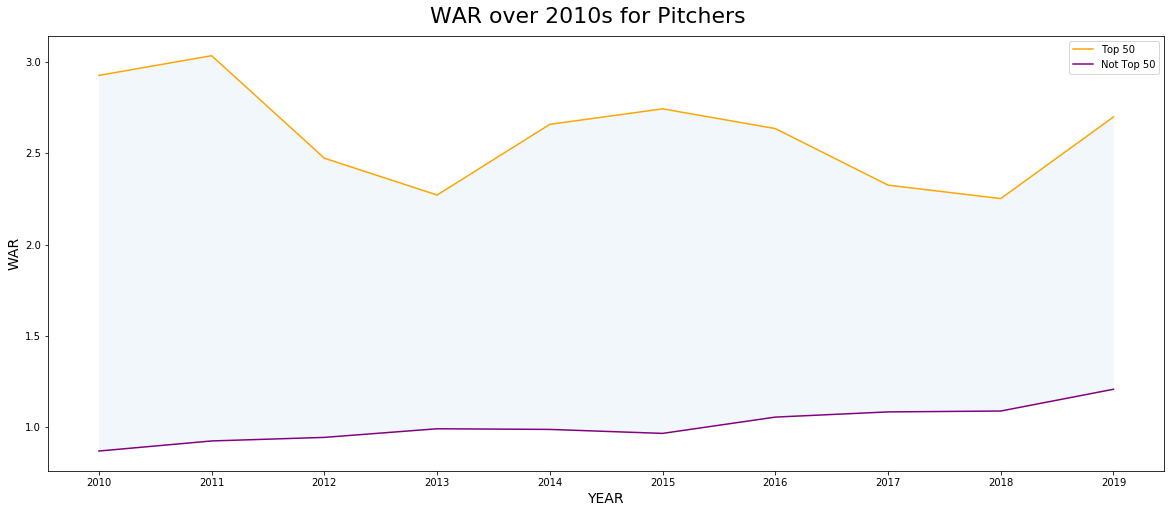

In [392]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.plot("Year", "WAR", color="orange", data=fifty_over_decade_p, label="Top 50")
ax.plot("Year", "WAR", color="purple", data=fifty_over_decade_not_p, label="Not Top 50")
ax.set_ylabel("WAR", fontsize=14)
ax.set_xlabel("YEAR", fontsize=14)
ax.set_xticks(np.arange(2010, 2020, 1))
ax.legend()
plt.suptitle("WAR over 2010s for Pitchers", fontsize=22, y=0.93)
plt.fill_between(fifty_over_decade_p["Year"], fifty_over_decade_p.WAR, fifty_over_decade_not_p.WAR, alpha=0.06)
plt.savefig("WARforPitchers2010s.png")

In [336]:
stats.ttest_ind(pitchers_in_50[pitchers_in_50["Year"] == 2010].WAR, pitchers_not_in_50[pitchers_not_in_50["Year"] == 2010].WAR, equal_var=False)

Ttest_indResult(statistic=5.909412431086934, pvalue=2.0797741583144157e-07)

In [337]:
t, p = stats.ttest_ind(pitchers_in_50[pitchers_in_50["Year"] == 2010].WAR, pitchers_not_in_50[pitchers_not_in_50["Year"] == 2010].WAR, equal_var=False)

In [338]:
test_statistics_batters = t_test_per_year(batters_in_50, batters_not_in_50)
test_statistics_batters = pd.DataFrame().from_dict(test_statistics_batters)

In [339]:
test_statistics_batters

t-statistic       P-Value  Year
0     5.061783  1.837255e-06  2010
1     5.344081  5.945975e-07  2011
2     5.367768  5.121472e-07  2012
3     5.882948  5.216241e-08  2013
4     4.514224  1.877016e-05  2014
5     3.615173  5.321922e-04  2015
6     3.231445  1.840274e-03  2016
7     0.930631  3.555236e-01  2017
8     0.671607  5.049473e-01  2018
9     0.434377  6.663946e-01  2019

Text(0.5, 0.93, 'Evolution of Mean Difference In WAR for Batters in 2010s')

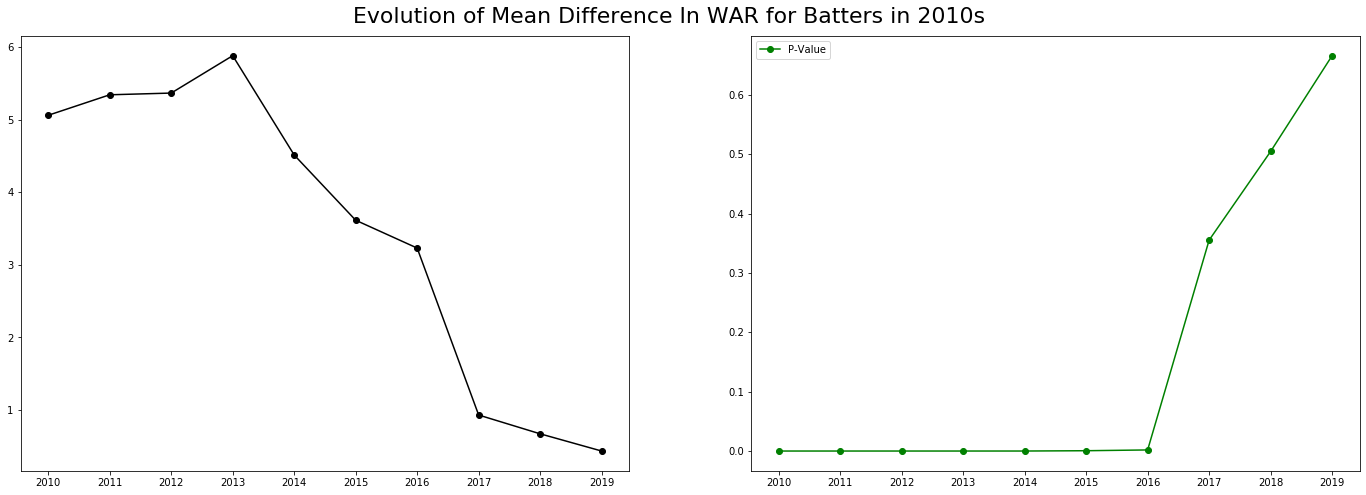

In [349]:
fig, axes = plt.subplots(1, 2, figsize=(24, 8), sharex=True)
ax = axes[0]
ax1 = axes[1]
ax.plot(test_statistics_batters["Year"], test_statistics_batters["t-statistic"], "ko-", label="T-Statistic")
ax.set_xticks(np.arange(2010, 2019, 1))
ax1.plot(test_statistics_batters["Year"], test_statistics_batters["P-Value"], "go-", label="P-Value")
ax1.set_xticks(np.arange(2010, 2020, 1))
plt.legend()
plt.suptitle("Evolution of Mean Difference In WAR for Batters in 2010s", fontsize=22, y=0.93)

In [350]:
test_statistics_pitchers = t_test_per_year(pitchers_in_50, pitchers_not_in_50)
test_statistics_pitchers = pd.DataFrame().from_dict(test_statistics_pitchers)

Text(0.5, 0.93, 'Evolution of Mean Difference In WAR for Pitchers in 2010s')

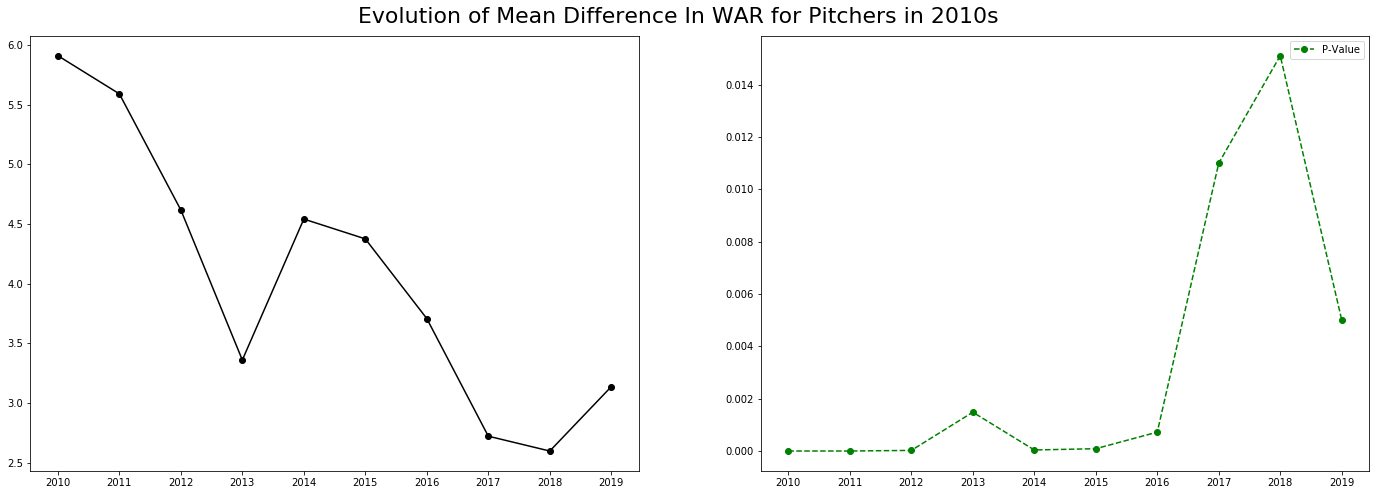

In [353]:
fig, axes = plt.subplots(1, 2, figsize=(24, 8), sharex=True)
ax = axes[0]
ax1 = axes[1]
ax.plot(test_statistics_pitchers["Year"], test_statistics_pitchers["t-statistic"], "ko-", label="T-Statistic")
ax.set_xticks(np.arange(2010, 2019, 1))
ax1.plot(test_statistics_pitchers["Year"], test_statistics_pitchers["P-Value"], "go--", label="P-Value")
ax1.set_xticks(np.arange(2010, 2020, 1))
plt.legend()
plt.suptitle("Evolution of Mean Difference In WAR for Pitchers in 2010s", fontsize=22, y=0.93)

Text(0.5, 0.92, 'Evolution of Mean Difference In WAR for Pitchers in 2010s')

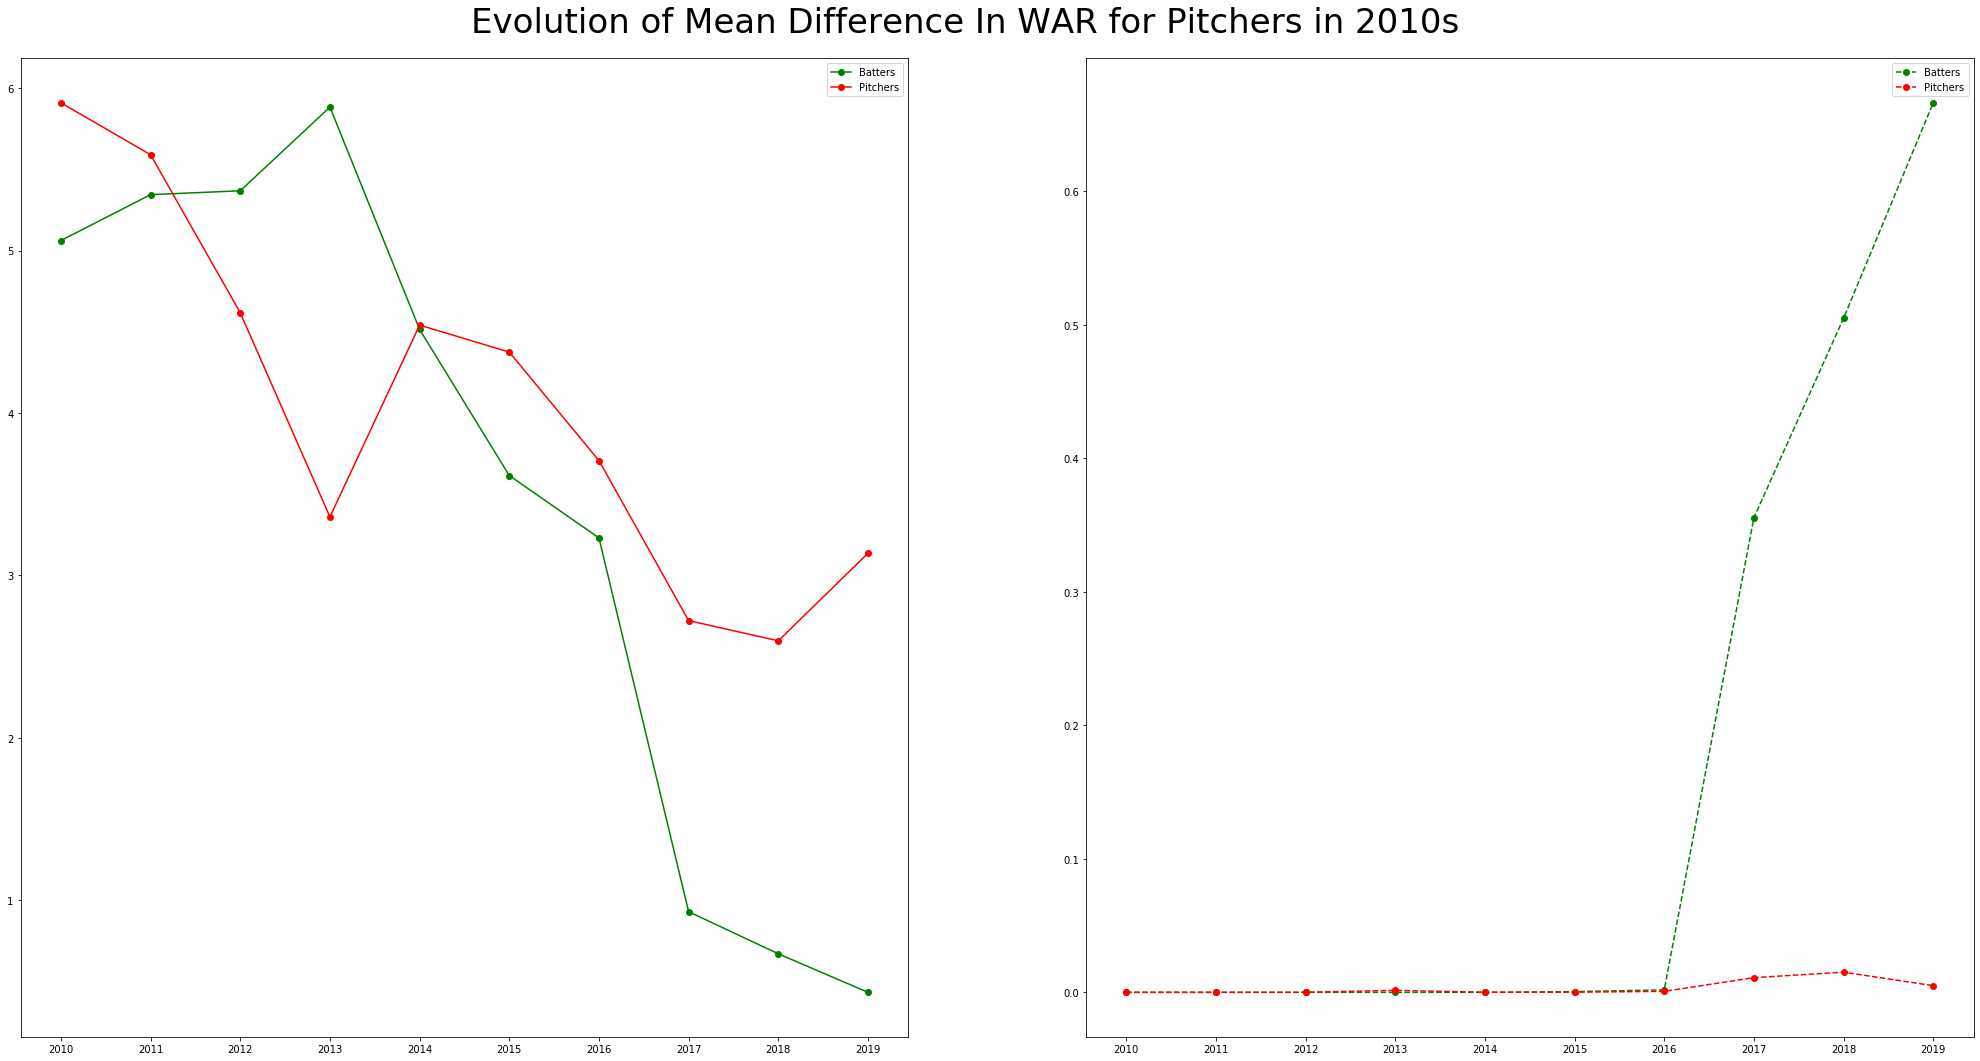

In [366]:
fig, axes = plt.subplots(1, 2, figsize=(35, 18), sharex=True)
ax = axes[0]
ax1 = axes[1]
ax.plot(test_statistics_batters["Year"], test_statistics_batters["t-statistic"], "go-", label="Batters")
ax.plot(test_statistics_pitchers["Year"], test_statistics_pitchers["t-statistic"], "ro-", label="Pitchers")
ax.set_xticks(np.arange(2010, 2019, 1))
ax.legend()
ax1.plot(test_statistics_batters["Year"], test_statistics_batters["P-Value"], "go--", label="Batters")
ax1.plot(test_statistics_pitchers["Year"], test_statistics_pitchers["P-Value"], "ro--", label="Pitchers")
ax1.set_xticks(np.arange(2010, 2020, 1))
ax1.legend()
plt.legend()
plt.suptitle("Evolution of Mean Difference In WAR for Pitchers in 2010s", fontsize=34, y=0.92)

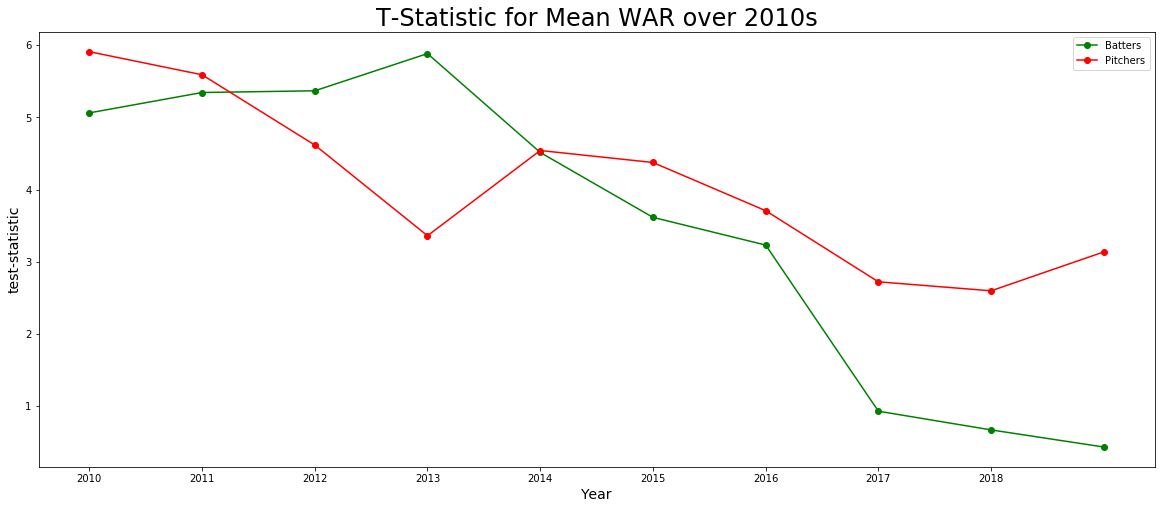

In [390]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.plot(test_statistics_batters["Year"], test_statistics_batters["t-statistic"], "go-", label="Batters")
ax.plot(test_statistics_pitchers["Year"], test_statistics_pitchers["t-statistic"], "ro-", label="Pitchers")
ax.set_xticks(np.arange(2010, 2019, 1))
ax.legend()
plt.title("T-Statistic for Mean WAR over 2010s", fontsize=24)
plt.ylabel("test-statistic", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.savefig("TstatforWAR.png")

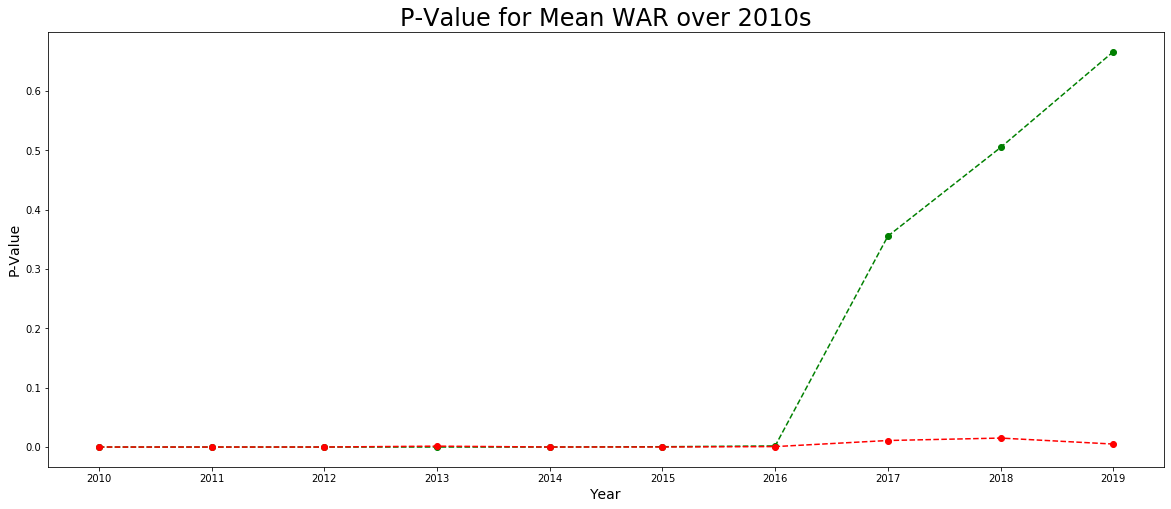

In [391]:
fig, ax1 = plt.subplots(1, 1, figsize=(20, 8))
ax1.plot(test_statistics_batters["Year"], test_statistics_batters["P-Value"], "go--", label="Batters")
ax1.plot(test_statistics_pitchers["Year"], test_statistics_pitchers["P-Value"], "ro--", label="Pitchers")
ax1.set_xticks(np.arange(2010, 2020, 1))
plt.title("P-Value for Mean WAR over 2010s", fontsize=24)
plt.ylabel("P-Value", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.savefig("PValueforWAR.png")

In [418]:
master_top50.columns

Index(['NAME', 'YearSigned', 'TEAM', 'POS', 'SALARY', 'YEARS', 'TOTAL VALUE',
       'AVG ANNUAL', 'Pitcher?', 'YearSigned.1',
       ...
       'gmLI', 'WAAadj', 'WAR.1', 'RAR.1', 'waaWL%.1', '162WL%.1', 'Salary.1',
       'Awards.3', 'bin_groups', 'In_The_Year'],
      dtype='object', length=126)

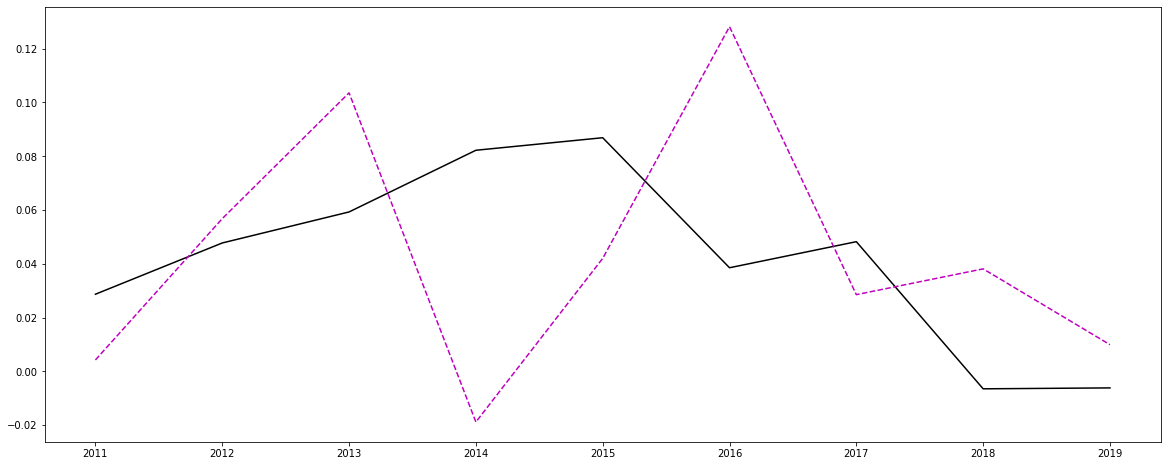

In [501]:
fig, ax1 = plt.subplots(1, 1, figsize=(20, 8), sharex=True)
ax1.plot(master_top_50_and_overall["Year"], master_top_50_and_overall.pct_change()["Payroll_x"], "k", label="Total Team Salaries")
ax1.plot(master_top_50_and_overall["Year"], master_top_50_and_overall.pct_change()["SALARY"], "m--", label="Top 50 Paid Players")
ax1.set_xticks(np.arange(2011, 2020, 1))

In [502]:
master_top_50_and_overall.pct_change()["Payroll_x"].mean()

0.042092188585591224

In [503]:
master_top_50_and_overall.pct_change()["SALARY"].mean()

0.04360161148184229

Text(0.5, 0, 'Wins Above Replacement')

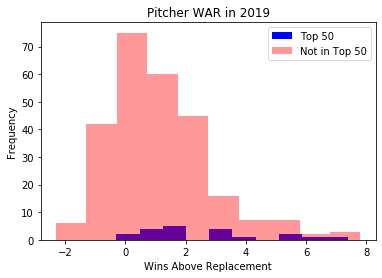

In [509]:
pitchers_in_50[pitchers_in_50["Year"] == 2019].reset_index().WAR.plot(kind="hist", color="blue", label="Top 50")
pitchers_not_in_50[pitchers_not_in_50["Year"] == 2019].WAR.plot(kind="hist", color="red", alpha=0.4, title='Pitcher WAR in 2019', label="Not in Top 50")
plt.legend()
plt.xlabel("Wins Above Replacement")
#plt.savefig("PitcherWAR2010.png")

In [507]:
pitchers_not_in_50[pitchers_not_in_50["Year"] == 2019].WAR.reset_index().shape

(263, 2)

Text(0.5, 0, 'Wins Above Replacement')

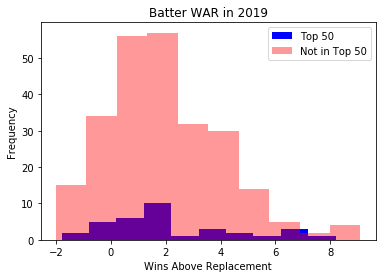

In [512]:
batters_in_50[batters_in_50["Year"] == 2019].WAR.plot(kind="hist", color="blue", label="Top 50")
batters_not_in_50[batters_not_in_50["Year"] == 2019].WAR.plot(kind="hist", color="red", alpha=0.4, title='Batter WAR in 2019', label="Not in Top 50")
plt.legend()
plt.xlabel("Wins Above Replacement")
#plt.savefig("BatterWAR2019.png")

In [516]:
fifty_over_decade_p.WAR

0    2.928000
1    3.036170
2    2.473469
3    2.271739
4    2.659524
5    2.744444
6    2.636364
7    2.325926
8    2.252000
9    2.700000
Name: WAR, dtype: float64